In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage

## 前処理

In [37]:
#データ取得
df_origin = pd.read_csv("/workspace/data/train.csv").drop("Unnamed: 0", axis=1).dropna()


In [38]:
#欠損値の削除
df_origin = df_origin.dropna()
df_origin

id  Gender      Customer Type  Age   Type of Travel     Class  \
0        70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         5047    Male  disloyal Customer   25  Business travel  Business   
2       110028  Female     Loyal Customer   26  Business travel  Business   
3        24026  Female     Loyal Customer   25  Business travel  Business   
4       119299    Male     Loyal Customer   61  Business travel  Business   
...        ...     ...                ...  ...              ...       ...   
103899   94171  Female  disloyal Customer   23  Business travel       Eco   
103900   73097    Male     Loyal Customer   49  Business travel  Business   
103901   68825    Male  disloyal Customer   30  Business travel  Business   
103902   54173  Female  disloyal Customer   22  Business travel       Eco   
103903   62567    Male     Loyal Customer   27  Business travel  Business   

        Flight Distance  Inflight wifi service  \
0                   460                      3   
1                   235                      3   
2                  1142                      2   
3                   562                      2   
4                   214                      3   
...                 ...                    ...   
103899              192                      2   
103900             2347                      4   
103901             1995                      1   
103902             1000                      1   
103903             1723                      1   

        Departure/Arrival time convenient  Ease of Online booking  ...  \
0                                       4                       3  ...   
1                                       2                       3  ...   
2                                       2                       2  ...   
3                                       5                       5  ...   
4                                       3                       3  ...   
...                                   ...                     ...  ...   
103899                                  1                       2  ...   
103900                                  4                       4  ...   
103901                                  1                       1  ...   
103902                                  1                       1  ...   
103903                                  3                       3  ...   

        Inflight entertainment  On-board service  Leg room service  \
0                            5                 4                 3   
1                            1                 1                 5   
2                            5                 4                 3   
3                            2                 2                 5   
4                            3                 3                 4   
...                        ...               ...               ...   
103899                       2                 3                 1   
103900                       5                 5                 5   
103901                       4                 3                 2   
103902                       1                 4                 5   
103903                       1                 1                 1   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                      4                4                 5            5   
1                      3                1                 4            1   
2                      4                4                 4            5   
3                      3                1                 4            2   
4                      4                3                 3            3   
...                  ...              ...               ...          ...   
103899                 4                2                 3            2   
103900                 5                5                 5            4   
103901                 4                5                 5            4

In [39]:
#欠損値有無の確認
is_null = df_origin.isnull()
null_counts = is_null.sum()
null_counts

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [40]:
##Class毎に抽出する
business= df_origin.query('Class == "Business"')
eco = df_origin.query('Class == "Eco"')
eco_plus = df_origin.query('Class == "Eco Plus"')
#データ数削減
business_new = business.sample(n=11500, random_state=42)
eco_new = eco.sample(n=11500, random_state=42)
#データを結合
df = pd.concat([eco_new, business_new, eco_plus], axis=0)
#クラスの割合を確認
df["Class"].value_counts()

Class
Eco         11500
Business    11500
Eco Plus     7468
Name: count, dtype: int64

In [41]:
#Class毎に抽出する

df_Busi = df.query('Class == "Business"')
df_Eco = df.query('Class == "Eco"')
df_Plus = df.query('Class == "Eco Plus"')

In [42]:
#id,unnamed,class,satisfaction 不要な列を消す
#ecoクラスのsatisfaction　は残す

df_Busi_del = df_Busi.drop(['id','satisfaction','Class'], axis=1)
df_Eco_del = df_Eco.drop(['id','satisfaction','Class'], axis=1)
df_Plus_del = df_Plus.drop(['id','satisfaction','Class'], axis=1)

In [43]:
# One-hot encodingを実行する

df_Busi_enc = pd.get_dummies(df_Busi_del, dtype=int,drop_first=True)
df_Eco_enc = pd.get_dummies(df_Eco_del, dtype=int,drop_first=True)
df_Plus_enc = pd.get_dummies(df_Plus_del, dtype=int,drop_first=True)

In [44]:
'''
Gender_Male　　0=男性,1=女性
'''

df_Eco_enc

Age  Flight Distance  Inflight wifi service  \
85208   69              546                      2   
31633   31              842                      3   
10425   62             1372                      3   
64557   41             1771                      3   
41909   18              937                      2   
...    ...              ...                    ...   
25747   26             1055                      2   
85937   60             1400                      2   
64395   36             1546                      2   
98313   25              240                      3   
23128   58              425                      1   

       Departure/Arrival time convenient  Ease of Online booking  \
85208                                  5                       2   
31633                                  5                       3   
10425                                  4                       2   
64557                                  3                       3   
41909                                  5                       2   
...                                  ...                     ...   
25747                                  4                       3   
85937                                  5                       2   
64395                                  5                       1   
98313                                  4                       3   
23128                                  5                       1   

       Gate location  Food and drink  Online boarding  Seat comfort  \
85208              4               3                4             5   
31633              1               1                3             1   
10425              2               3                4             4   
64557              3               2                3             2   
41909              2               1                2             1   
...              ...             ...              ...           ...   
25747              1               3                3             3   
85937              3               2                4             4   
64395              5               2                2             2   
98313              3               3                3             3   
23128              3               3                4             5   

       Inflight entertainment  ...  Leg room service  Baggage handling  \
85208                       4  ...                 2                 4   
31633                       1  ...                 3                 5   
10425                       1  ...                 2                 1   
64557                       2  ...                 4                 2   
41909                       1  ...                 2                 2   
...                       ...  ...               ...               ...   
25747                       3  ...                 3                 5   
85937                       4  ...                 3                 4   
64395                       2  ...                 5                 2   
98313                       3  ...                 4                 5   
23128                       2  ...                 1                 2   

       Checkin service  Inflight service  Cleanliness  \
85208                4                 4            2   
31633                5                 4            1   
10425                3                 1            4   
64557                3                 4            2   
41909                1                 1            1   
...                ...               ...          ...   
25747                3                 5            3   
85937                4                 3            4   
64395                4                 3            2   
98313                3                 4            3   
23128                5                 2            4   

       Departure Delay in Minutes  Arrival Delay in Minutes  Gender_Male  \
85208                           0     

In [45]:
df_Eco_enc = df_Eco_enc.reset_index(drop=True)
Eco_enc_df = df_Eco_enc

In [46]:
df_Busi_enc.shape

(11500, 21)

In [47]:
df_Eco_enc.shape

(11500, 21)

In [48]:
df_Plus_enc.shape

(7468, 21)

In [49]:
df_Busi_enc.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel'],
      dtype='object')

In [50]:
df_Eco_enc.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel'],
      dtype='object')

In [51]:
df_Plus_enc.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel'],
      dtype='object')

In [52]:
Eco_enc_df.info()

'''
0   Age                                年齢
1   Flight Distance                    飛行距離
2   Inflight wifi service              機内wifiサービス
3   Departure/Arrival time convenient  出発・到着時間の利便性
4   Ease of Online booking             オンライン予約のしやすさ
5   Gate location                      ゲートの位置
6   Food and drink                     飲食
7   Online boarding                    オンライン搭乗
8   Seat comfort                       シートの快適性
9   Inflight entertainment             機内エンターテインメント
10  On-board service                    機内サービス
11  Leg room service                    レッグルームサービス
12  Baggage handling                    手荷物取扱い
13  Checkin service                     チェックイン・サービス
14  Inflight service                    機内サービス
15  Cleanliness                         清潔さ
16  Departure Delay in Minutes          出発の遅れ（分）
17  Arrival Delay in Minutes            到着遅延（分）
18  Gender_Male                         性別_男性
19  Customer Type_disloyal Customer     顧客タイプ_不誠実な顧客
20  Type of Travel_Personal Travel      旅行タイプ_個人旅行
21  satisfaction_satisfied              満足度_満足

'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11500 non-null  int64  
 1   Flight Distance                    11500 non-null  int64  
 2   Inflight wifi service              11500 non-null  int64  
 3   Departure/Arrival time convenient  11500 non-null  int64  
 4   Ease of Online booking             11500 non-null  int64  
 5   Gate location                      11500 non-null  int64  
 6   Food and drink                     11500 non-null  int64  
 7   Online boarding                    11500 non-null  int64  
 8   Seat comfort                       11500 non-null  int64  
 9   Inflight entertainment             11500 non-null  int64  
 10  On-board service                   11500 non-null  int64  
 11  Leg room service                   11500 non-null  int

'\n0   Age                                年齢\n1   Flight Distance                    飛行距離\n2   Inflight wifi service              機内wifiサービス\n3   Departure/Arrival time convenient  出発・到着時間の利便性\n4   Ease of Online booking             オンライン予約のしやすさ\n5   Gate location                      ゲートの位置\n6   Food and drink                     飲食\n7   Online boarding                    オンライン搭乗\n8   Seat comfort                       シートの快適性\n9   Inflight entertainment             機内エンターテインメント\n10  On-board service                    機内サービス\n11  Leg room service                    レッグルームサービス\n12  Baggage handling                    手荷物取扱い\n13  Checkin service                     チェックイン・サービス\n14  Inflight service                    機内サービス\n15  Cleanliness                         清潔さ\n16  Departure Delay in Minutes          出発の遅れ（分）\n17  Arrival Delay in Minutes            到着遅延（分）\n18  Gender_Male                         性別_男性\n19  Customer Type_disloyal Customer     顧客タイプ_不誠実な顧客\n20  Type of Travel_P

## Ecoクラス分析

#### 年齢別

In [53]:
#年齢別
Eco_enc_df['decade'] =Eco_enc_df['Age'].astype('str').apply(lambda x:x[0][0]).apply(lambda x: x+ '0s')

### 次元削減とクラスタリング

#### クラスタリングのための前処理

In [54]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler

In [55]:
df_Eco_enc.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel', 'decade'],
      dtype='object')

In [56]:
# 数値列のみを選択
numeric_columns = ['Gender_Male','Customer Type_disloyal Customer','Age',
                   'Type of Travel_Personal Travel','Flight Distance','Departure/Arrival time convenient','Arrival Delay in Minutes']
df_Eco_enc[numeric_columns]

Gender_Male  Customer Type_disloyal Customer  Age  \
0                0                                0   69   
1                1                                0   31   
2                0                                0   62   
3                0                                1   41   
4                0                                0   18   
...            ...                              ...  ...   
11495            1                                0   26   
11496            1                                0   60   
11497            1                                0   36   
11498            0                                0   25   
11499            0                                0   58   

       Type of Travel_Personal Travel  Flight Distance  \
0                                   1              546   
1                                   1              842   
2                                   1             1372   
3                                   0             1771   
4                                   1              937   
...                               ...              ...   
11495                               1             1055   
11496                               1             1400   
11497                               0             1546   
11498                               1              240   
11499                               1              425   

       Departure/Arrival time convenient  Arrival Delay in Minutes  
0                                      5                       0.0  
1                                      5                      16.0  
2                                      4                       0.0  
3                                      3                      23.0  
4                                      5                       0.0  
...                                  ...                       ...  
11495                                  4                       0.0  
11496                                  5                     160.0  
11497                                  5                       0.0  
11498                                  4                       8.0  
11499                                  5                       0.0  

[11500 rows x 7 columns]

In [57]:
df_Eco_enc[numeric_columns].head(2)

Gender_Male  Customer Type_disloyal Customer  Age  \
0            0                                0   69   
1            1                                0   31   

   Type of Travel_Personal Travel  Flight Distance  \
0                               1              546   
1                               1              842   

   Departure/Arrival time convenient  Arrival Delay in Minutes  
0                                  5                       0.0  
1                                  5                      16.0

In [58]:
# StandardScalerを適用
scaler = StandardScaler()
df_Eco_enc_std = scaler.fit_transform(df_Eco_enc[numeric_columns])

In [59]:
#T-sneで次元削減
tsne = TSNE(n_components=2)
eco_tsne = tsne.fit_transform(df_Eco_enc_std)

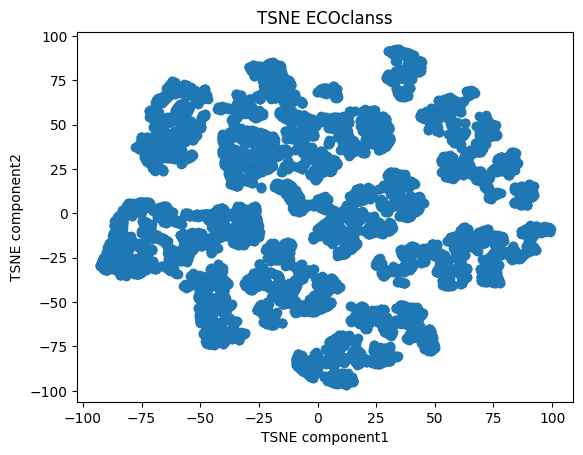

In [60]:
plt.scatter(eco_tsne[:,0],eco_tsne[:,1])
plt.xlabel('TSNE component1')
plt.ylabel('TSNE component2')
plt.title('TSNE ECOclanss')
plt.show()

/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

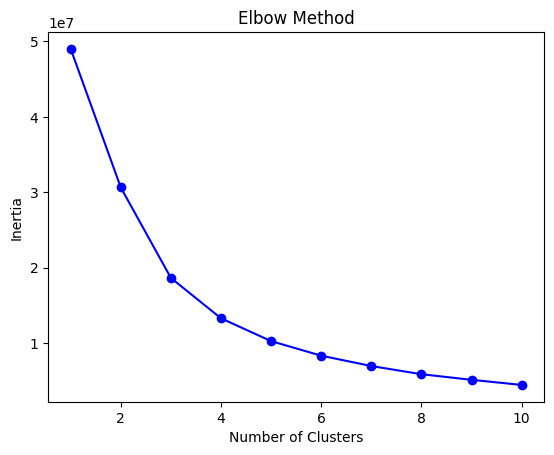

In [61]:
inertia = []
k_values = range(1, 11)  # クラスタ数の範囲を設定

for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=300)
    kmeans.fit(eco_tsne)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

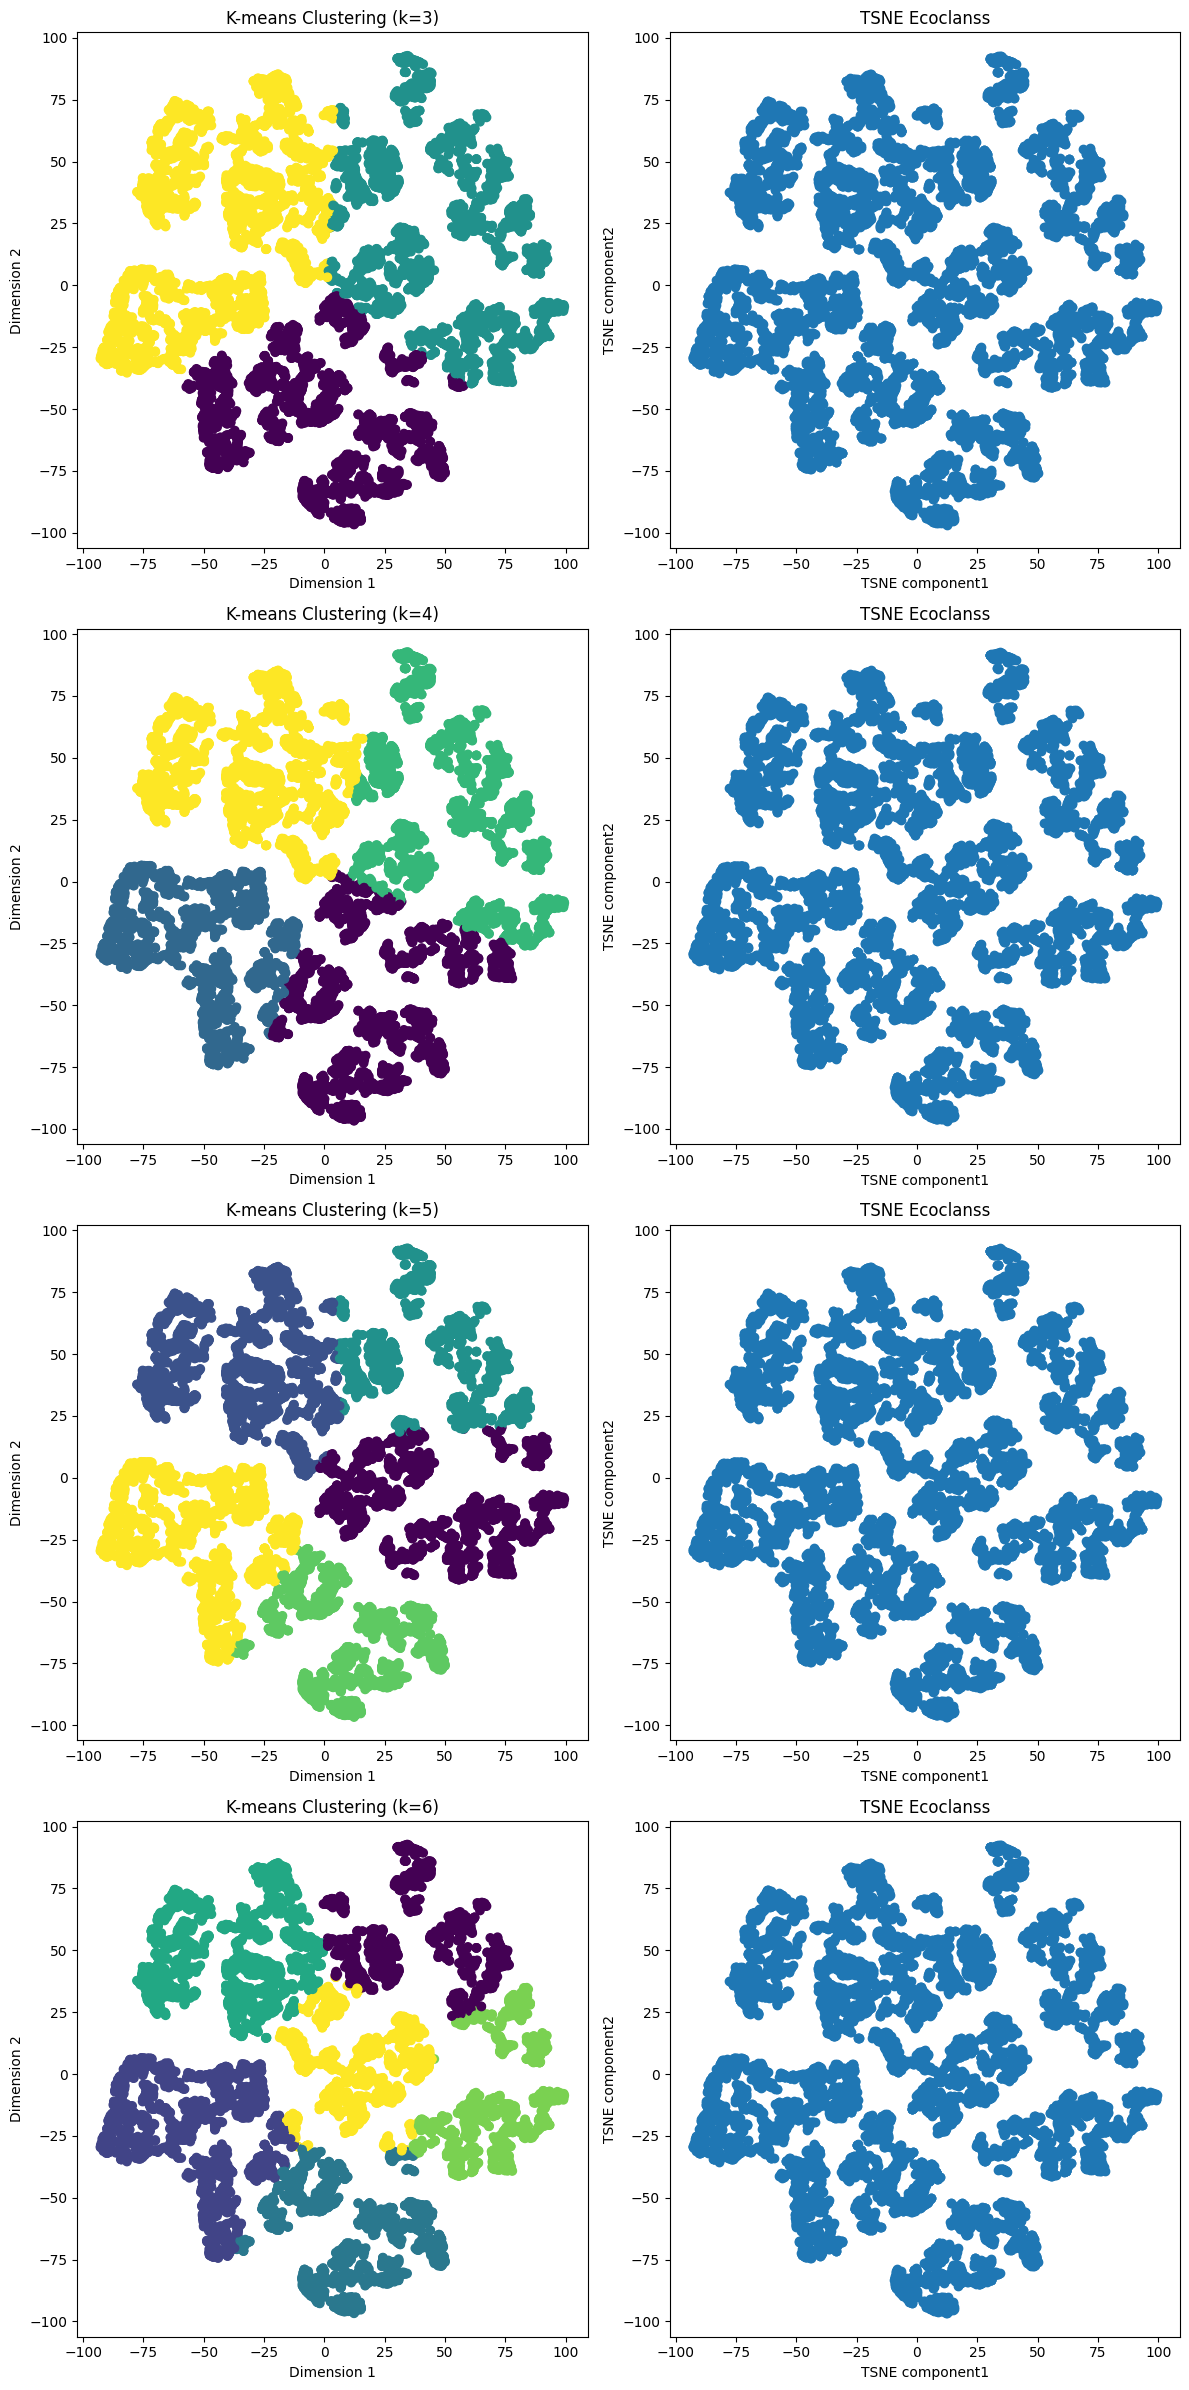

In [63]:
# ハイパーパラメータの候補リスト
k_values = [3, 4, 5, 6]  # k-meansのクラスタ数の候補

# サブプロットの設定
fig, axes = plt.subplots(len(k_values), 2, figsize=(12, 6 * (len(k_values) )))

# k-meansのクラスタリング
for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, max_iter=100)
    eco_kmeans = kmeans.fit_predict(eco_tsne)
    
    # 左側のグラフ
    axes[i, 0].scatter(eco_tsne[:, 0], eco_tsne[:, 1], c=eco_kmeans)
    axes[i, 0].set_title(f'K-means Clustering (k={k})')
    axes[i, 0].set_xlabel('Dimension 1')
    axes[i, 0].set_ylabel('Dimension 2')

# 右側のグラフ
    axes[i,1].scatter(eco_tsne[:,0],eco_tsne[:,1])
    axes[i,1].set_xlabel('TSNE component1')
    axes[i,1].set_ylabel('TSNE component2')
    axes[i,1].set_title('TSNE Ecoclanss')
    
#図を表示
plt.tight_layout()
plt.show()

/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


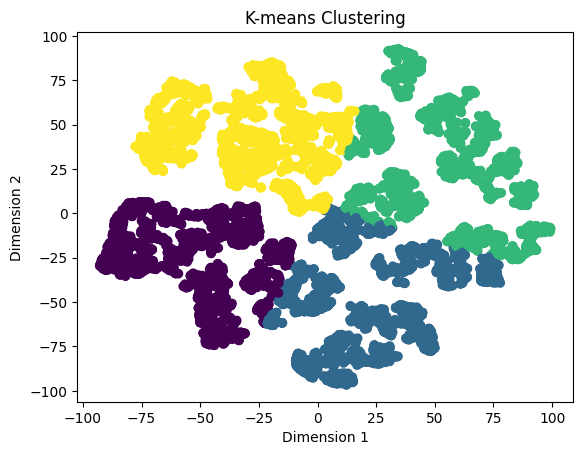

In [64]:
kmeans = KMeans(n_clusters=4, max_iter=300)
eco_kmeans = kmeans.fit_predict(eco_tsne)

plt.scatter(eco_tsne[:, 0], eco_tsne[:, 1], c=eco_kmeans)
plt.title('K-means Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


In [65]:
# クラスタリング結果を元のデータフレームに追加
df_Eco_enc['Cluster_kmeans'] = eco_kmeans

#df_Eco_enc = df_Eco_enc.drop('Cluster', axis=1)

In [66]:
df_Eco_enc.head(2)

Age  Flight Distance  Inflight wifi service  \
0   69              546                      2   
1   31              842                      3   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  5                       2              4   
1                                  5                       3              1   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  ...  \
0               3                4             5                       4  ...   
1               1                3             1                       1  ...   

   Checkin service  Inflight service  Cleanliness  Departure Delay in Minutes  \
0                4                 4            2                           0   
1                5                 4            1                          35   

   Arrival Delay in Minutes  Gender_Male  Customer Type_disloyal Customer  \
0                       0.0            0                                0   
1                      16.0            1                                0   

   Type of Travel_Personal Travel  decade  Cluster_kmeans  
0                               1     60s               3  
1                               1     30s               0  

[2 rows x 23 columns]

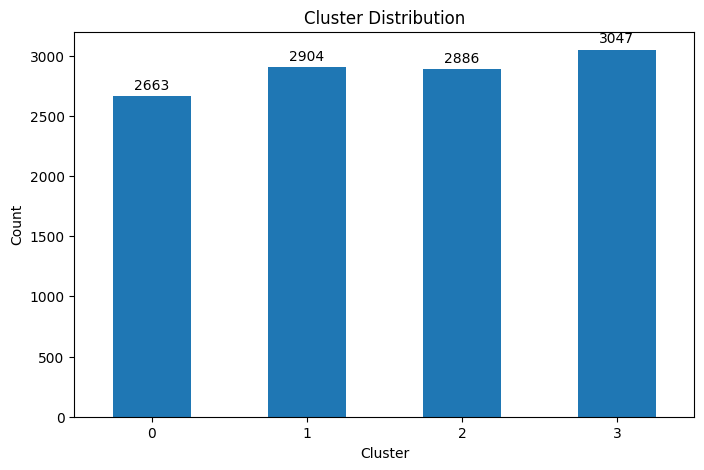

In [67]:
# クラスターごとのカウントを計算
cluster_counts = df_Eco_enc['Cluster_kmeans'].value_counts().sort_index()

# グラフの作成
fig, ax = plt.subplots(figsize=(8, 5))
cluster_counts.plot(kind='bar', ax=ax)

# グラフのラベルとタイトルを設定
ax.set_xlabel('Cluster')
ax.set_ylabel('Count')
ax.set_title('Cluster Distribution')

# 各バーの上に数値を表示
for bar in ax.containers[0]:
    height = bar.get_height()
    ax.annotate(f'{int(height)}', (bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# x軸の数値を90度回転させる
ax.tick_params(axis='x', rotation=0)

plt.show()

In [68]:
df_Eco_enc['satisfaction'] = df_Eco.reset_index(drop=True)['satisfaction']
df_Eco_enc.head(2)

Age  Flight Distance  Inflight wifi service  \
0   69              546                      2   
1   31              842                      3   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  5                       2              4   
1                                  5                       3              1   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  ...  \
0               3                4             5                       4  ...   
1               1                3             1                       1  ...   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 4            2                           0   
1                 4            1                          35   

   Arrival Delay in Minutes  Gender_Male  Customer Type_disloyal Customer  \
0                       0.0            0                                0   
1                      16.0            1                                0   

   Type of Travel_Personal Travel  decade  Cluster_kmeans  \
0                               1     60s               3   
1                               1     30s               0   

              satisfaction  
0  neutral or dissatisfied  
1  neutral or dissatisfied  

[2 rows x 24 columns]

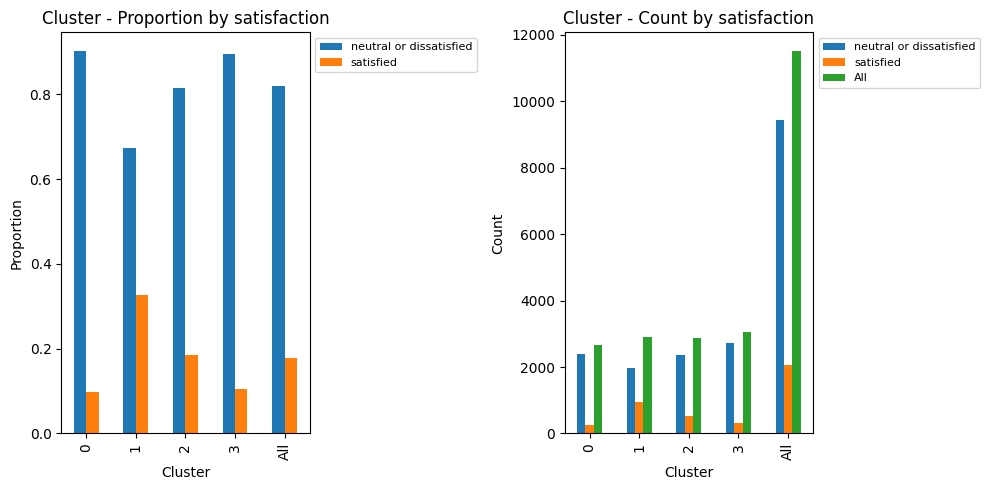

In [69]:
# クラスターごとの分布
cross = pd.crosstab(df_Eco_enc['Cluster_kmeans'], df_Eco_enc['satisfaction'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by satisfaction')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab( df_Eco_enc['Cluster_kmeans'],  df_Eco_enc['satisfaction'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by satisfaction')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


## デンドログラム

In [70]:
df_Eco_enc_std

array([[-0.9752624 , -0.54948696,  1.89264191, ..., -0.36449805,
         1.16475409, -0.40453672],
       [ 1.02536507, -0.54948696, -0.37833922, ...,  0.16837324,
         1.16475409,  0.00662779],
       [-0.9752624 , -0.54948696,  1.47430328, ...,  1.12250088,
         0.50869923, -0.40453672],
       ...,
       [ 1.02536507, -0.54948696, -0.07952591, ...,  1.43574279,
         1.16475409, -0.40453672],
       [-0.9752624 , -0.54948696, -0.73691519, ..., -0.91537174,
         0.50869923, -0.19895447],
       [-0.9752624 , -0.54948696,  1.23525264, ..., -0.58232719,
         1.16475409, -0.40453672]])

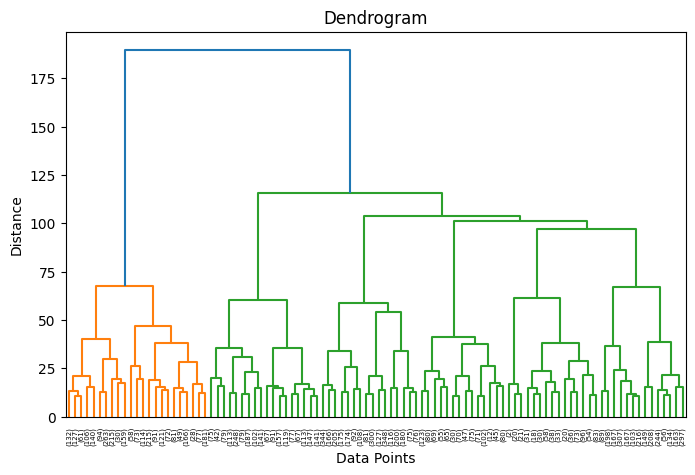

In [76]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# 階層クラスタリング
linkage_matrix = linkage(df_Eco_enc_std, method='ward')

# デンドログラム作成
plt.figure(figsize=(8, 5))
dendrogram(linkage_matrix, truncate_mode='lastp', p=100)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram')

# 保存するファイルパスを指定して保存
plt.savefig('dendrogram.png')
plt.show()

In [79]:
from scipy.cluster.hierarchy import fcluster
df_Eco_enc_std_clus_den = fcluster(linkage_matrix ,t=3, criterion='maxclust')


# クラスタリング結果を元のデータフレームに追加
df_Eco_enc['Cluster_den'] = df_Eco_enc_std_clus_den

In [80]:
df_Eco_enc.head(2)

Age  Flight Distance  Inflight wifi service  \
0   69              546                      2   
1   31              842                      3   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  5                       2              4   
1                                  5                       3              1   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  ...  \
0               3                4             5                       4  ...   
1               1                3             1                       1  ...   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0            2                           0                       0.0   
1            1                          35                      16.0   

   Gender_Male  Customer Type_disloyal Customer  \
0            0                                0   
1            1                                0   

   Type of Travel_Personal Travel  decade  Cluster_kmeans  \
0                               1     60s               3   
1                               1     30s               0   

              satisfaction  Cluster_den  
0  neutral or dissatisfied            3  
1  neutral or dissatisfied            3  

[2 rows x 25 columns]

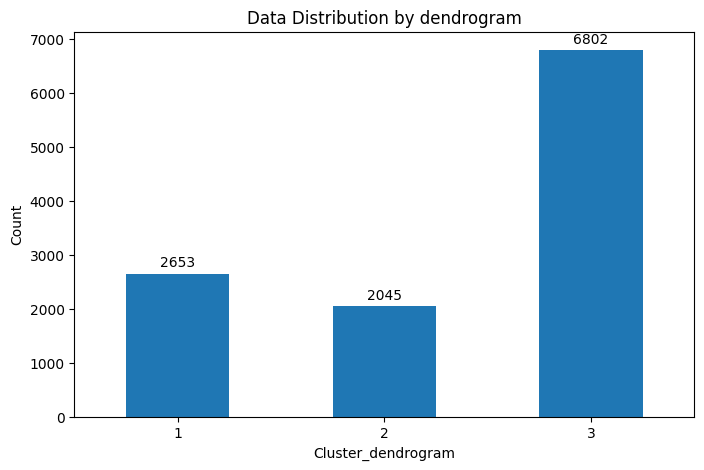

In [81]:
# クラスターごとのカウントを計算
cluster_counts = df_Eco_enc['Cluster_den'].value_counts().sort_index()

# グラフの作成
fig, ax = plt.subplots(figsize=(8, 5))
cluster_counts.plot(kind='bar', ax=ax)

# グラフのラベルとタイトルを設定
ax.set_xlabel('Cluster_dendrogram')
ax.set_ylabel('Count')
ax.set_title('Data Distribution by dendrogram')

# 各バーの上に数値を表示
for bar in ax.containers[0]:
    height = bar.get_height()
    ax.annotate(f'{int(height)}', (bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# x軸の数値を90度回転させる
ax.tick_params(axis='x', rotation=0)

plt.show()

In [82]:
# 数値列のみを選択
numeric_columns = ['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking',
                   'Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment',
                   'On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']
df_Eco_enc[numeric_columns]

Inflight wifi service  Departure/Arrival time convenient  \
0                          2                                  5   
1                          3                                  5   
2                          3                                  4   
3                          3                                  3   
4                          2                                  5   
...                      ...                                ...   
11495                      2                                  4   
11496                      2                                  5   
11497                      2                                  5   
11498                      3                                  4   
11499                      1                                  5   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                           2              4               3                4   
1                           3              1               1                3   
2                           2              2               3                4   
3                           3              3               2                3   
4                           2              2               1                2   
...                       ...            ...             ...              ...   
11495                       3              1               3                3   
11496                       2              3               2                4   
11497                       1              5               2                2   
11498                       3              3               3                3   
11499                       1              3               3                4   

       Seat comfort  Inflight entertainment  On-board service  \
0                 5                       4                 4   
1                 1                       1                 4   
2                 4                       1                 1   
3                 2                       2                 4   
4                 1                       1                 5   
...             ...                     ...               ...   
11495             3                       3                 3   
11496             4                       4                 5   
11497             2                       2                 2   
11498             3                       3                 4   
11499             5                       2                 2   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
0                     2                 4                4                 4   
1                     3                 5                5                 4   
2                     2                 1                3                 1   
3                     4                 2                3                 4   
4                     2                 2                1                 1   
...                 ...               ...              ...               ...   
11495                 3                 5                3                 5   
11496                 3                 4                4                 3   
11497                 5                 2                4                 3   
11498                 4                 5                3                 4   
11499                 1                 2                5                 2   

       Cleanliness  
0                2  
1                1  
2                4  
3                2  
4                1  
...            ...  
11495            3  
11496            4  
11497            2  
11498            3  
11499            4  

[11500 rows x 14 columns]

In [88]:
df_Eco_den1=df_Eco_enc.query('Cluster_den == 1')
df_Eco_den2=df_Eco_enc.query('Cluster_den == 2')
df_Eco_den3=df_Eco_enc.query('Cluster_den == 3')

In [89]:
df_Eco_den1[numeric_columns].describe()

Inflight wifi service  Departure/Arrival time convenient  \
count            2653.000000                        2653.000000   
mean                2.581983                           2.346400   
std                 1.183633                           1.554037   
min                 0.000000                           0.000000   
25%                 2.000000                           1.000000   
50%                 3.000000                           2.000000   
75%                 3.000000                           4.000000   
max                 5.000000                           5.000000   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
count             2653.000000    2653.000000     2653.000000      2653.000000   
mean                 2.583867       3.018093        3.000754         2.599698   
std                  1.227910       1.078225        1.399472         1.234387   
min                  0.000000       1.000000        0.000000         0.000000   
25%                  2.000000       2.000000        2.000000         2.000000   
50%                  3.000000       3.000000        3.000000         3.000000   
75%                  3.000000       4.000000        4.000000         3.000000   
max                  5.000000       5.000000        5.000000         5.000000   

       Seat comfort  Inflight entertainment  On-board service  \
count   2653.000000             2653.000000       2653.000000   
mean       2.941953                3.009800          2.914436   
std        1.419943                1.404279          1.301406   
min        1.000000                1.000000          1.000000   
25%        2.000000                2.000000          2.000000   
50%        3.000000                3.000000          3.000000   
75%        4.000000                4.000000          4.000000   
max        5.000000                5.000000          5.000000   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
count       2653.000000       2653.000000      2653.000000       2653.000000   
mean           3.079533          3.329061         2.919714          3.357331   
std            1.365959          1.133563         1.310403          1.117739   
min            1.000000          1.000000         1.000000          1.000000   
25%            2.000000          3.000000         2.000000          3.000000   
50%            3.000000          3.000000         3.000000          3.000000   
75%            4.000000          4.000000         4.000000          4.000000   
max            5.000000          5.000000         5.000000          5.000000   

       Cleanliness  
count  2653.000000  
mean      3.024501  
std       1.404234  
min       1.000000  
25%       2.000000  
50%       3.000000  
75%       4.000000  
max       5.000000

In [90]:
df_Eco_den2[numeric_columns].describe()

Inflight wifi service  Departure/Arrival time convenient  \
count            2045.000000                        2045.000000   
mean                3.197555                           2.974572   
std                 1.309716                           1.435617   
min                 0.000000                           0.000000   
25%                 2.000000                           2.000000   
50%                 3.000000                           3.000000   
75%                 4.000000                           4.000000   
max                 5.000000                           5.000000   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
count             2045.000000    2045.000000     2045.000000      2045.000000   
mean                 3.010758       3.031296        3.193643         3.172616   
std                  1.438866       1.398559        1.308058         1.288225   
min                  0.000000       1.000000        1.000000         0.000000   
25%                  2.000000       2.000000        2.000000         2.000000   
50%                  3.000000       3.000000        3.000000         3.000000   
75%                  4.000000       4.000000        4.000000         4.000000   
max                  5.000000       5.000000        5.000000         5.000000   

       Seat comfort  Inflight entertainment  On-board service  \
count   2045.000000             2045.000000       2045.000000   
mean       3.218093                3.249878          2.885575   
std        1.223692                1.257718          1.279299   
min        1.000000                1.000000          1.000000   
25%        2.000000                2.000000          2.000000   
50%        3.000000                3.000000          3.000000   
75%        4.000000                4.000000          4.000000   
max        5.000000                5.000000          5.000000   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
count       2045.000000       2045.000000      2045.000000       2045.000000   
mean           3.050367          3.141320         2.767726          3.141320   
std            1.370612          1.151906         1.315769          1.156992   
min            1.000000          1.000000         1.000000          1.000000   
25%            2.000000          2.000000         2.000000          2.000000   
50%            3.000000          3.000000         3.000000          3.000000   
75%            4.000000          4.000000         4.000000          4.000000   
max            5.000000          5.000000         5.000000          5.000000   

       Cleanliness  
count  2045.000000  
mean      3.111491  
std       1.302297  
min       1.000000  
25%       2.000000  
50%       3.000000  
75%       4.000000  
max       5.000000

In [91]:
df_Eco_den3[numeric_columns].describe()

Inflight wifi service  Departure/Arrival time convenient  \
count            6802.000000                        6802.000000   
mean                2.537783                           3.642311   
std                 1.142333                           1.368709   
min                 0.000000                           0.000000   
25%                 2.000000                           3.000000   
50%                 3.000000                           4.000000   
75%                 3.000000                           5.000000   
max                 5.000000                           5.000000   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
count             6802.000000    6802.000000     6802.000000      6802.000000   
mean                 2.497354       2.947956        3.059247         2.793443   
std                  1.263914       1.161530        1.361296         1.328036   
min                  0.000000       1.000000        0.000000         0.000000   
25%                  2.000000       2.000000        2.000000         2.000000   
50%                  3.000000       3.000000        3.000000         3.000000   
75%                  3.000000       4.000000        4.000000         4.000000   
max                  5.000000       5.000000        5.000000         5.000000   

       Seat comfort  Inflight entertainment  On-board service  \
count   6802.000000             6802.000000       6802.000000   
mean       3.162746                3.063364          3.245075   
std        1.373647                1.374120          1.310071   
min        1.000000                1.000000          1.000000   
25%        2.000000                2.000000          2.000000   
50%        3.000000                3.000000          3.000000   
75%        4.000000                4.000000          4.000000   
max        5.000000                5.000000          5.000000   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
count       6802.000000       6802.000000      6802.000000       6802.000000   
mean           3.073508          3.592620         3.317407          3.595119   
std            1.323737          1.214416         1.264337          1.208761   
min            0.000000          1.000000         1.000000          1.000000   
25%            2.000000          3.000000         3.000000          3.000000   
50%            3.000000          4.000000         3.000000          4.000000   
75%            4.000000          5.000000         4.000000          5.000000   
max            5.000000          5.000000         5.000000          5.000000   

       Cleanliness  
count  6802.000000  
mean      3.127463  
std       1.352267  
min       1.000000  
25%       2.000000  
50%       3.000000  
75%       4.000000  
max       5.000000

### 色々なグラフ作成

#### クラスター別

#### gender

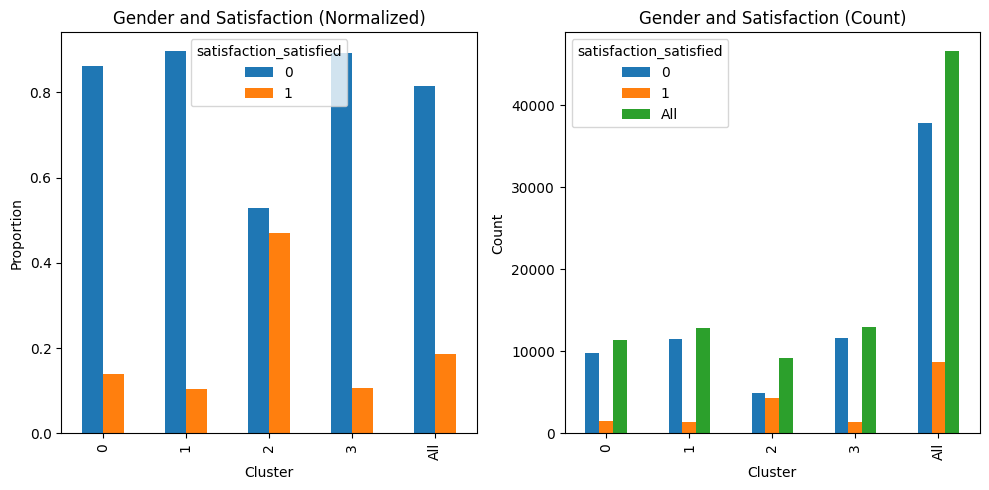

In [71]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['satisfaction_satisfied'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Gender and Satisfaction (Normalized)')

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['satisfaction_satisfied'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender and Satisfaction (Count)')

plt.tight_layout()
plt.show()


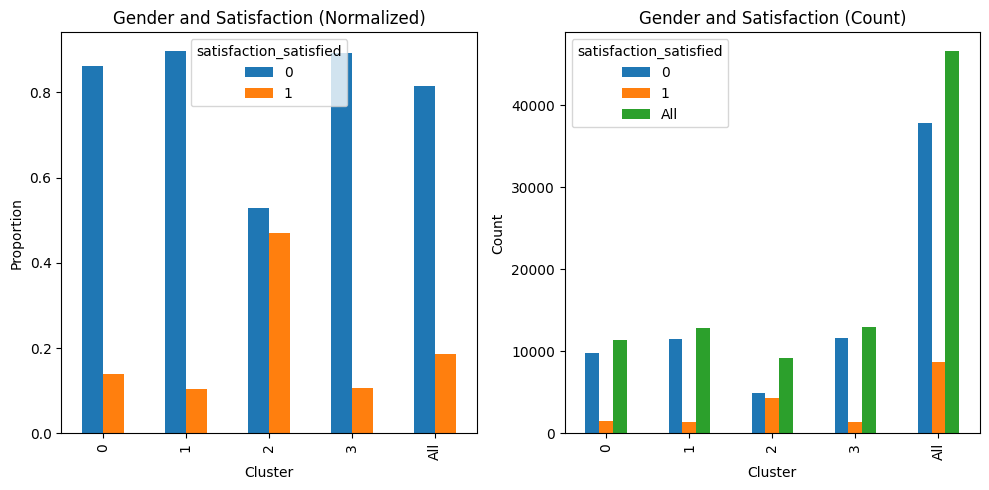

In [72]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['satisfaction_satisfied'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Gender and Satisfaction (Normalized)')

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['satisfaction_satisfied'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender and Satisfaction (Count)')

plt.tight_layout()
plt.show()


In [73]:
Eco_enc_df.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel', 'satisfaction_satisfied', 'Cluster'],
      dtype='object')

クラスターごとの年齢の分布

 クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['decade'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Gender and Satisfaction (Normalized)')

右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['decade'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender and Satisfaction (Count)')

plt.tight_layout()
plt.show()


####  decade

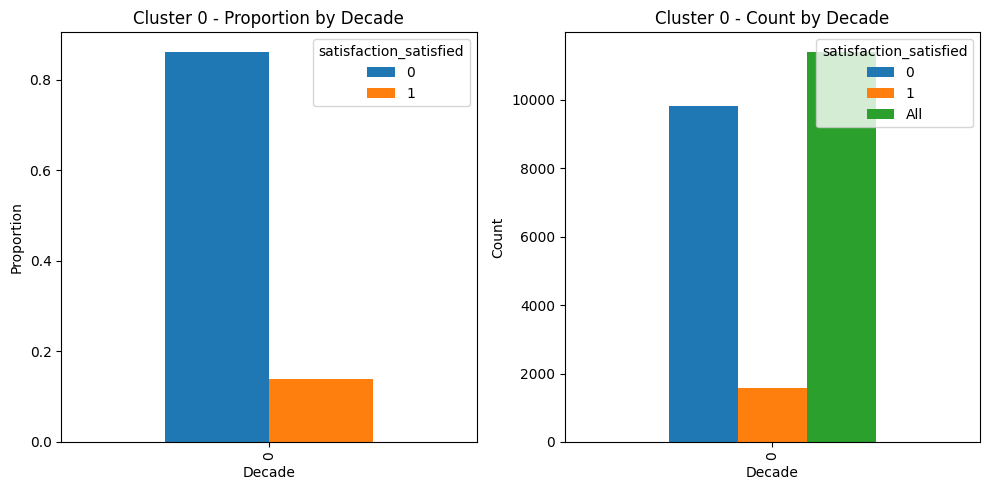

In [74]:
# クラスター0の情報のみ抽出
cluster_0_data = cross.loc[[0], :]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cluster_0_data.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Decade')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Cluster 0 - Proportion by Decade')

# 右側のグラフ
cluster_0_counts = cross_counts.loc[[0], :]
cluster_0_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Decade')
axes[1].set_ylabel('Count')
axes[1].set_title('Cluster 0 - Count by Decade')

plt.tight_layout()
plt.show()


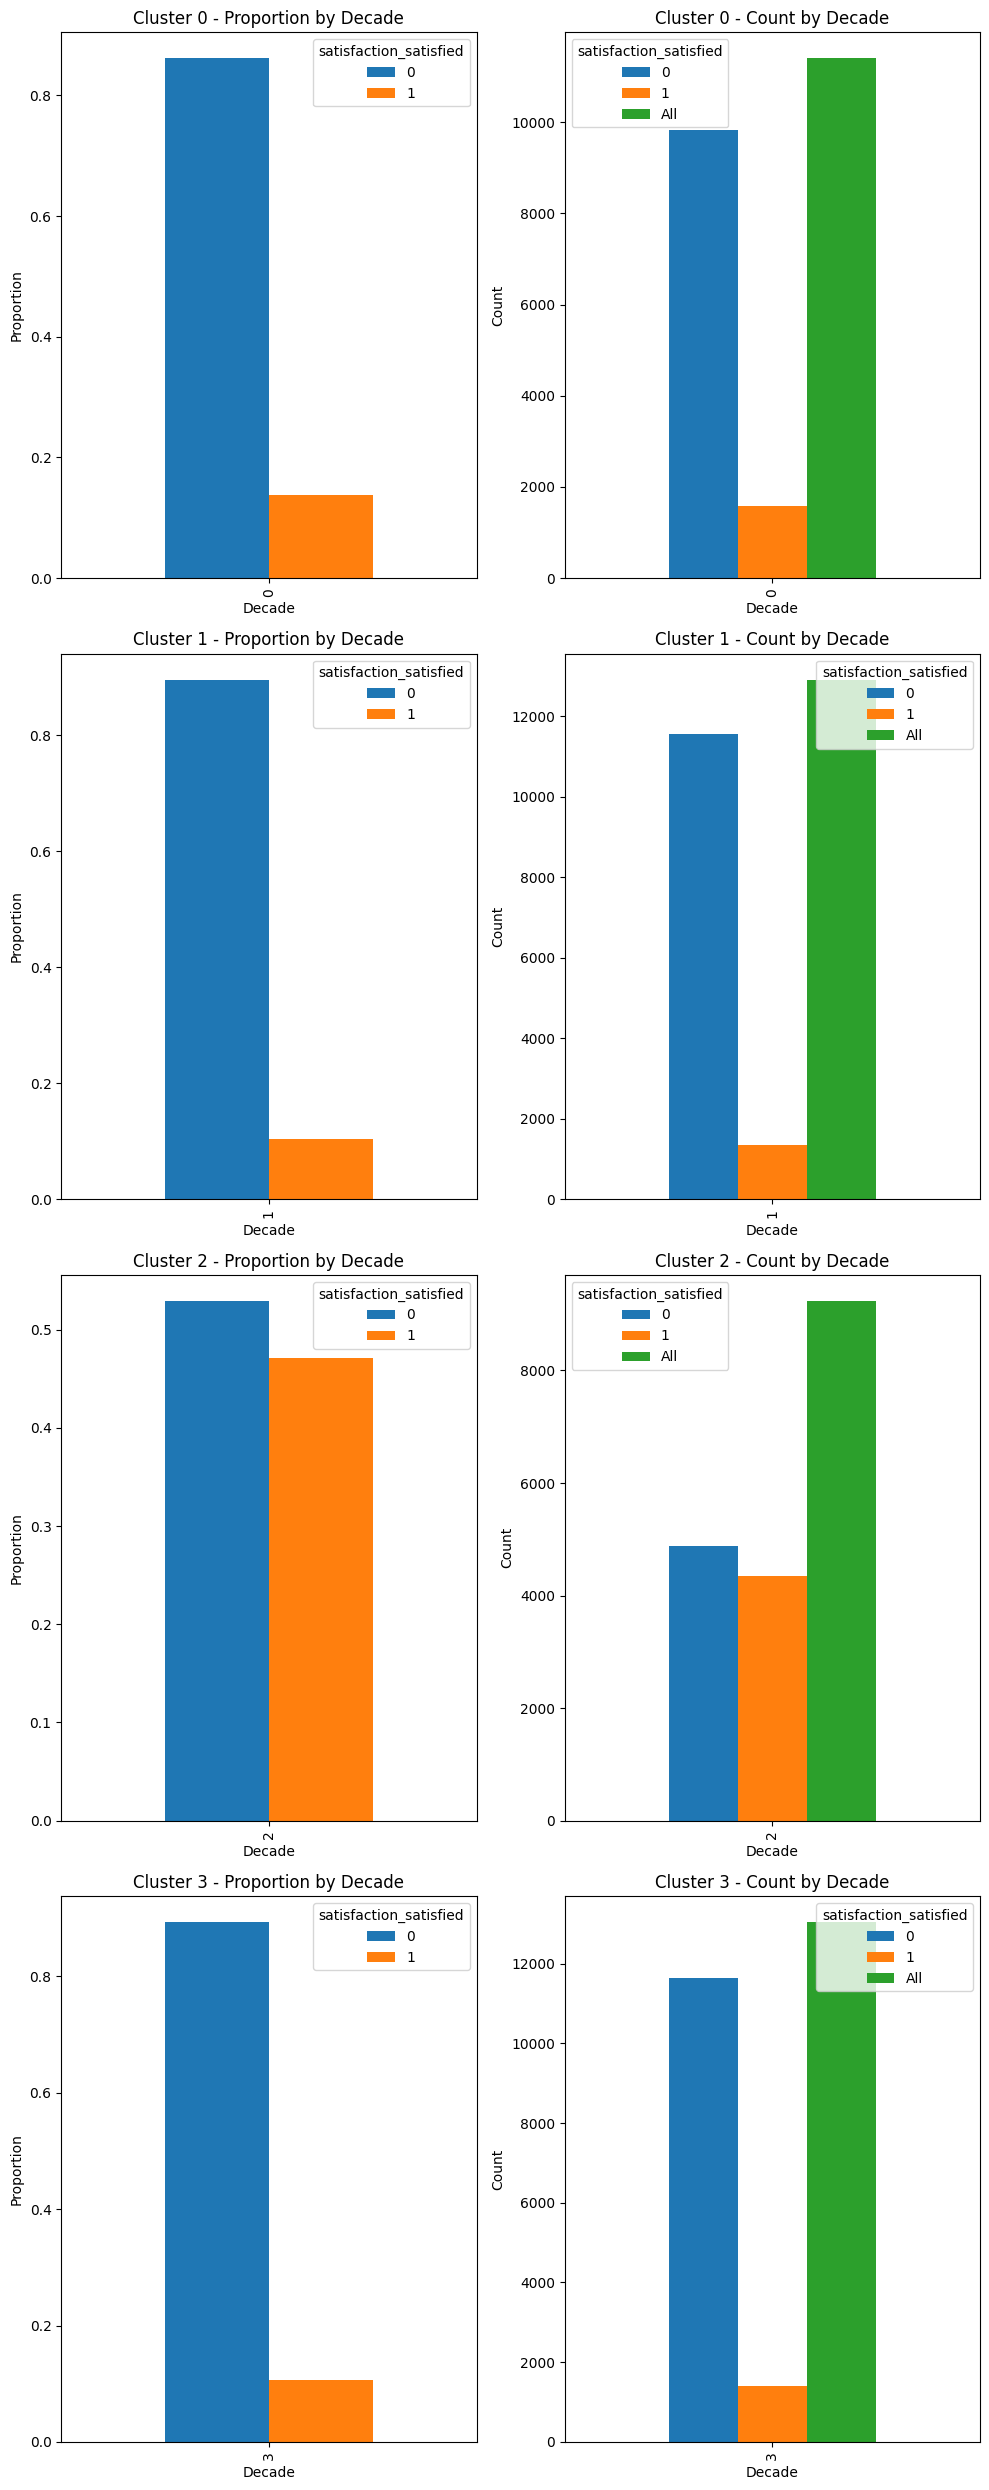

In [75]:
#各クラスターごとの年齢分布
fig, axes = plt.subplots(4, 2, figsize=(10, 25))

for cluster in range(4):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], :]
    cluster_counts = cross_counts.loc[[cluster], :]

    # 左側のグラフ　　割合
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Decade')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Decade')

    # 右側のグラフ　数値
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Decade')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Decade')

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(4, 2, figsize=(10, 25))

for cluster in range(4):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], :]
    cluster_counts = cross_counts.loc[[cluster], :]

    # 左側のグラフ
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Decade')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Decade')

    # 右側のグラフ
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Decade')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Decade')

plt.tight_layout()
plt.show()

In [45]:
features = [
    'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 
    'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 
    'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 
    'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 
    'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Gender_Male', 
    'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel'
]

/tmp/ipykernel_22/2516930569.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


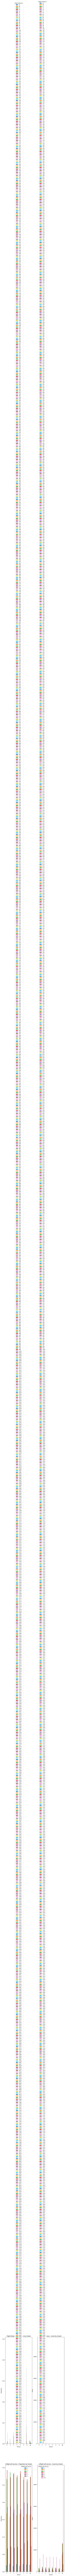

In [165]:
features = [ 'Flight Distance', 'Inflight wifi service',]

fig, axes = plt.subplots(len(features), 2, figsize=(10, 40))

for i, feature in enumerate(features):
    # クラスターごとの分布
    cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df[feature], margins=True, normalize="index")
    cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df[feature], margins=True)

    # 左側のグラフ
    cross.plot(kind="bar", ax=axes[i, 0])
    axes[i, 0].set_xlabel('Cluster')
    axes[i, 0].set_ylabel('Proportion')
    axes[i, 0].set_title(f'{feature} - Proportion by Cluster')

    # 右側のグラフ
    cross_counts.plot(kind="bar", ax=axes[i, 1])
    axes[i, 1].set_xlabel('Cluster')
    axes[i, 1].set_ylabel('Count')
    axes[i, 1].set_title(f'{feature} - Count by Cluster')

plt.tight_layout()
plt.show()


In [ ]:
, 'Departure/Arrival time convenient',
           'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
           'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service',
           'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
           'Gender_Male', 'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel',
           'satisfaction_satisfied', 'decade', 'Cluster'

KeyError: "None of [Index(['Flight Distance', 'Inflight wifi service'], dtype='object', name='Inflight wifi service')] are in the [columns]"

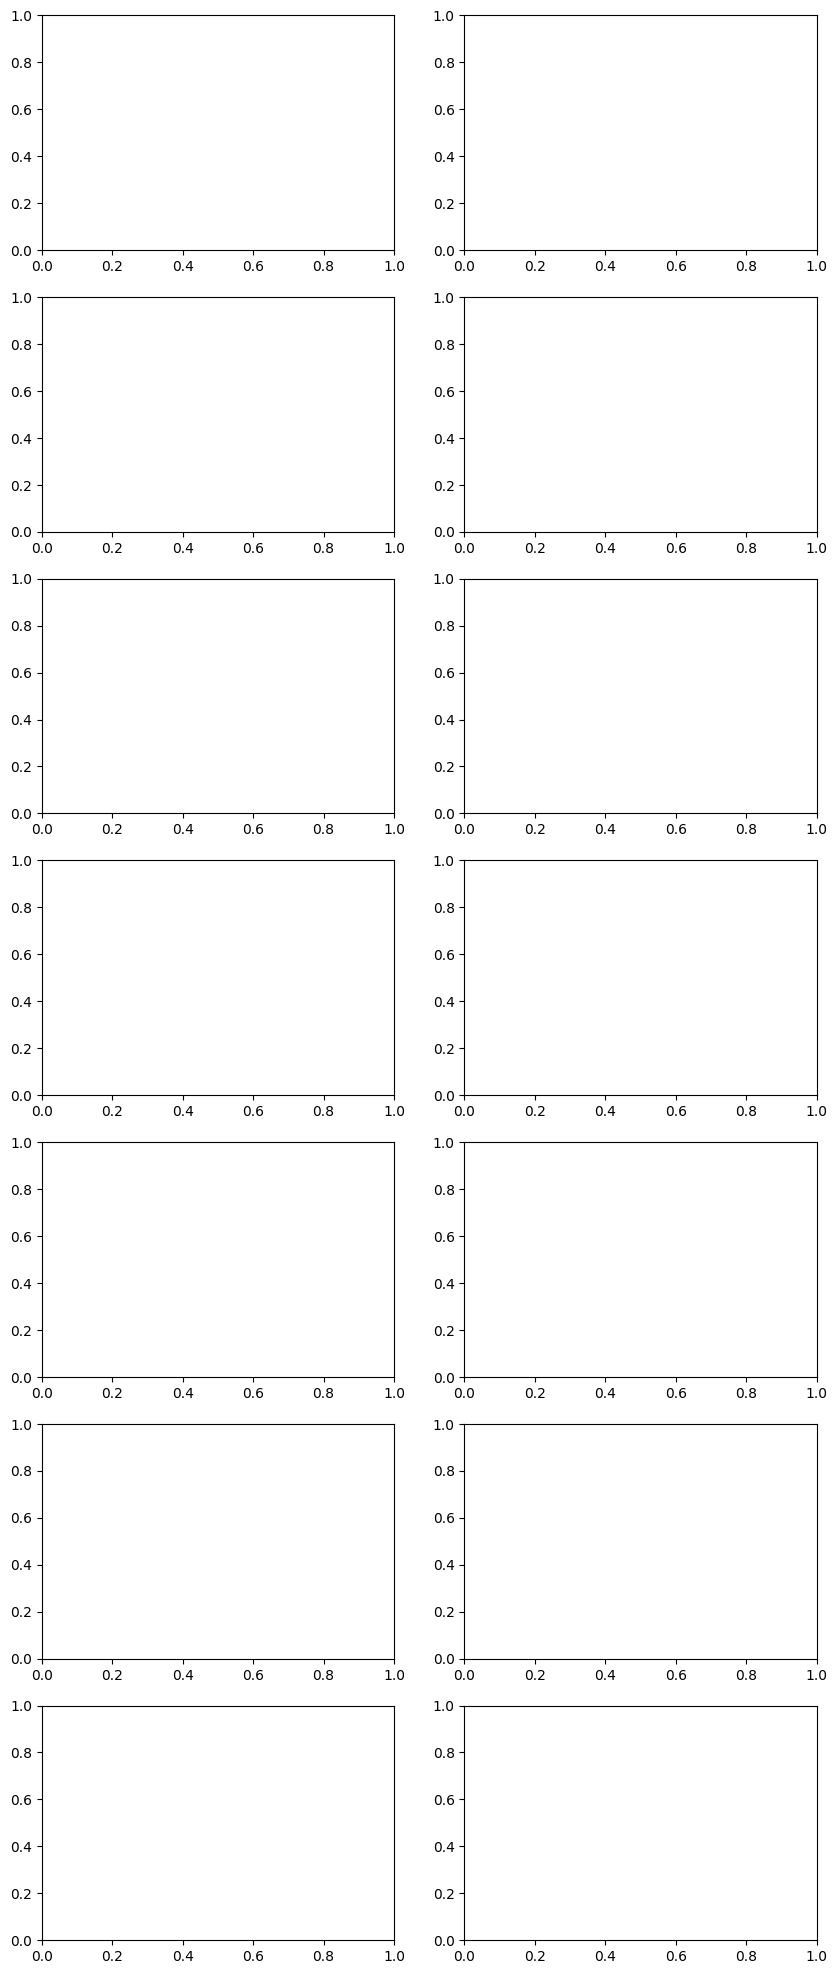

In [166]:
columns = ['Flight Distance', 'Inflight wifi service']

fig, axes = plt.subplots(7, 2, figsize=(10, 25))

for cluster in range(7):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], columns]
    cluster_counts = cross_counts.loc[[cluster], columns]

    # 左側のグラフ
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Columns')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Columns')

    # 右側のグラフ
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Columns')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Columns')

plt.tight_layout()
plt.show()


In [46]:
Eco_enc_df['Flight Distance']

0        1180
1        1276
2        1061
3        1182
4         834
         ... 
46588    1055
46589     867
46590    1620
46591     192
46592    1000
Name: Flight Distance, Length: 46593, dtype: int64

In [ ]:
# クラスター0の情報のみ抽出
cluster_0_data = cross.loc[[0], :]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cluster_0_data.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Cluster 0 - Proportion by ')

# 右側のグラフ
cluster_0_counts = cross_counts.loc[[0], :]
cluster_0_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('')
axes[1].set_ylabel('Count')
axes[1].set_title('Cluster 0 - Count by ')
a
plt.tight_layout()
plt.show()


In [ ]:
#各クラスターごとの年齢分布
fig, axes = plt.subplots(4, 2, figsize=(10, 25))

for cluster in range(4):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], :]
    cluster_counts = cross_counts.loc[[cluster], :]

    # 左側のグラフ　　割合
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by ')

    # 右側のグラフ　数値
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by ')

plt.tight_layout()
plt.show()


In [ ]:
# クラスター0の情報のみ抽出
cluster_0_data = cross.loc[[0], :]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cluster_0_data.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Cluster 0 - Proportion by ')

# 右側のグラフ
cluster_0_counts = cross_counts.loc[[0], :]
cluster_0_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('')
axes[1].set_ylabel('Count')
axes[1].set_title('Cluster 0 - Count by ')
a
plt.tight_layout()
plt.show()


#### Flight Distanceを２つに分けてみる

In [55]:
long_Eco_enc_df = Eco_enc_df[Eco_enc_df['Flight Distance'] > 1300]
short_Eco_enc_df = Eco_enc_df[Eco_enc_df['Flight Distance'] <= 1300]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


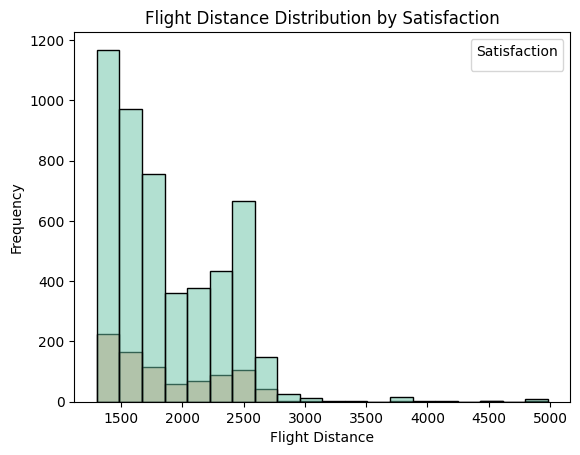

In [70]:
sns.histplot(data=long_Eco_enc_df, x='Flight Distance', bins=20, edgecolor='black', hue='satisfaction_satisfied', palette='Set2')
plt.title('Flight Distance Distribution by Satisfaction')
plt.xlabel('Flight Distance')
plt.ylabel('Frequency')
plt.legend(title='Satisfaction')
plt.show()

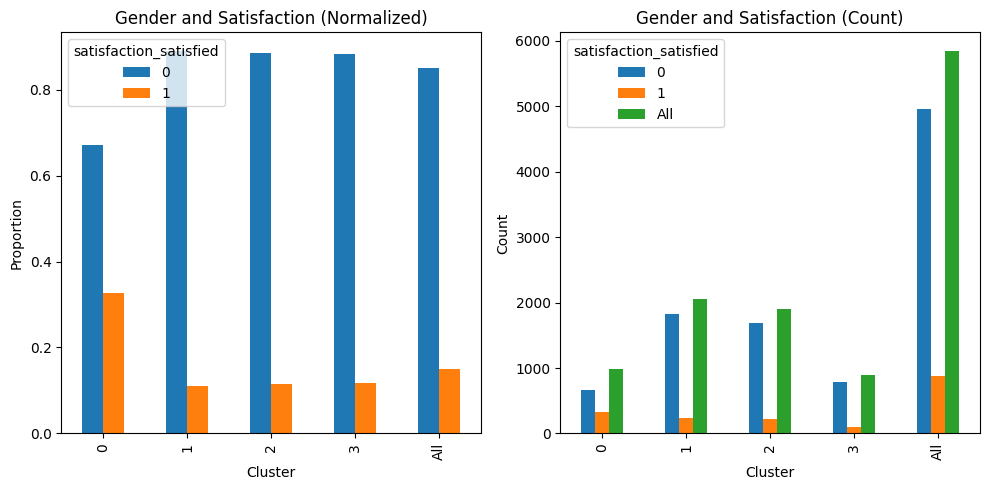

In [71]:
# クラスターごとの分布
cross = pd.crosstab(long_Eco_enc_df['Cluster'], long_Eco_enc_df['satisfaction_satisfied'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Gender and Satisfaction (Normalized)')

# 右側のグラフ
cross_counts = pd.crosstab(long_Eco_enc_df['Cluster'], long_Eco_enc_df['satisfaction_satisfied'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender and Satisfaction (Count)')

plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


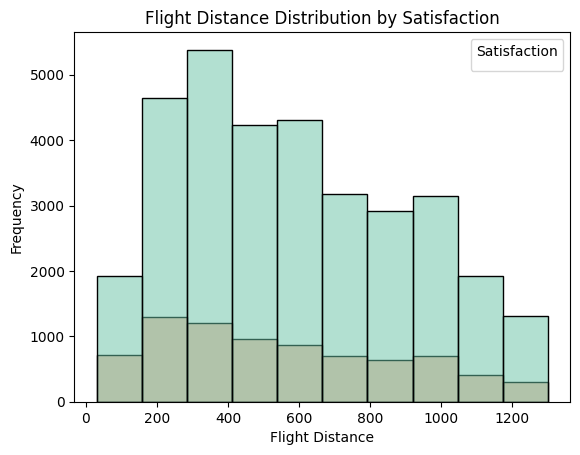

In [72]:
sns.histplot(data=short_Eco_enc_df, x='Flight Distance', bins=10, edgecolor='black', hue='satisfaction_satisfied', palette='Set2')
plt.title('Flight Distance Distribution by Satisfaction')
plt.xlabel('Flight Distance')
plt.ylabel('Frequency')
plt.legend(title='Satisfaction')
plt.show()

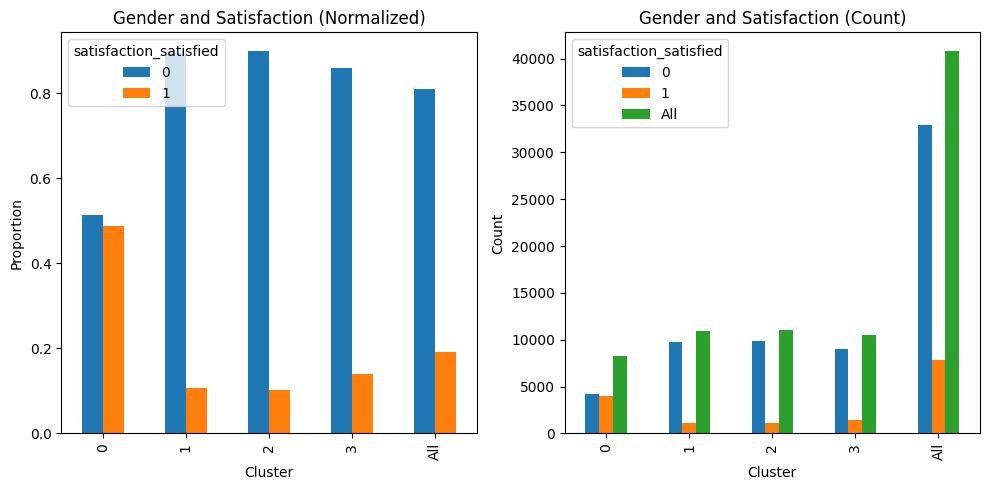

In [73]:
# クラスターごとの分布
cross = pd.crosstab(short_Eco_enc_df['Cluster'], short_Eco_enc_df['satisfaction_satisfied'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Gender and Satisfaction (Normalized)')

# 右側のグラフ
cross_counts = pd.crosstab(short_Eco_enc_df['Cluster'], short_Eco_enc_df['satisfaction_satisfied'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender and Satisfaction (Count)')

plt.tight_layout()
plt.show()


### クラスターの数値要約

In [22]:
Eco_enc_df.head(2)

Age  Flight Distance  Inflight wifi service  \
0   26             1180                      3   
1   47             1276                      2   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       2              1   
1                                  4                       2              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  ...  \
0               1                2             1                       1  ...   
1               2                2             2                       2  ...   

   Checkin service  Inflight service  Cleanliness  Departure Delay in Minutes  \
0                4                 4            1                           0   
1                3                 5            2                           9   

   Arrival Delay in Minutes  Gender_Male  Customer Type_disloyal Customer  \
0                       0.0            0                                0   
1                      23.0            1                                0   

   Type of Travel_Personal Travel  satisfaction_satisfied  Cluster  
0                               1                       0        2  
1                               1                       0        0  

[2 rows x 23 columns]

In [23]:
#クラスターごとにまとめた　　
'''どうやったらforでまとめられるんや？'''
cluster0_Eco_enc_df = Eco_enc_df[Eco_enc_df['Cluster'] == 0]
cluster1_Eco_enc_df = Eco_enc_df[Eco_enc_df['Cluster'] == 1]
cluster2_Eco_enc_df = Eco_enc_df[Eco_enc_df['Cluster'] == 2]
cluster3_Eco_enc_df = Eco_enc_df[Eco_enc_df['Cluster'] == 3]

for i in range(3):
    cluster(i)_Eco_enc_df = Eco_enc_df[Eco_enc_df['Cluster'] == i]

In [30]:
cluster0_Eco_enc_df.describe()


Age  Flight Distance  Inflight wifi service  \
count  9257.000000      9257.000000            9257.000000   
mean     44.093983       690.695582               3.281409   
std      12.527758       527.052744               1.265864   
min       7.000000        31.000000               0.000000   
25%      36.000000       308.000000               2.000000   
50%      44.000000       551.000000               3.000000   
75%      53.000000       929.000000               4.000000   
max      85.000000      3904.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                        9257.000000             9257.000000   
mean                            3.009398                3.065140   
std                             1.417654                1.396289   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding  Seat comfort  \
count    9257.000000     9257.000000      9257.000000   9257.000000   
mean        3.041698        3.163660         3.231176      3.198336   
std         1.397611        1.330573         1.251761      1.245383   
min         1.000000        0.000000         0.000000      1.000000   
25%         2.000000        2.000000         2.000000      2.000000   
50%         3.000000        3.000000         3.000000      3.000000   
75%         4.000000        4.000000         4.000000      4.000000   
max         5.000000        5.000000         5.000000      5.000000   

       Inflight entertainment  ...  Checkin service  Inflight service  \
count             9257.000000  ...      9257.000000       9257.000000   
mean                 3.261748  ...         2.772605          3.165820   
std                  1.275254  ...         1.306371          1.163701   
min                  0.000000  ...         1.000000          1.000000   
25%                  2.000000  ...         2.000000          2.000000   
50%                  3.000000  ...         3.000000          3.000000   
75%                  4.000000  ...         4.000000          4.000000   
max                  5.000000  ...         5.000000          5.000000   

       Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
count  9257.000000                 9257.000000               9257.000000   
mean      3.115480                   14.251593                 15.074646   
std       1.306587                   31.089478                 31.509464   
min       0.000000                    0.000000                  0.000000   
25%       2.000000                    0.000000                  0.000000   
50%       3.000000                    0.000000                  0.000000   
75%       4.000000                   13.000000                 15.000000   
max       5.000000                  236.000000                233.000000   

       Gender_Male  Customer Type_disloyal Customer  \
count  9257.000000                      9257.000000   
mean      0.500378                         0.002809   
std       0.500027                         0.052925   
min       0.000000                         0.000000   
25%       0.000000                         0.000000   
50%       1.000000                         0.000000   
75%       1.000000                         0.000000   
max       1.000000                         1.000000   

       Type of Travel_Personal Travel  satisfaction_satisfied  Cluster  
count                     9257.000000             9257.000000   9257.0  
mean                         0.012855                0.470131      0.0  
std                          0.112655                0.499134      0.0  
min                          0.000000                0.000000      0.0  

In [31]:
cluster1_Eco_enc_df.describe()

Age  Flight Distance  Inflight wifi service  \
count  13027.000000     13027.000000           13027.000000   
mean      38.333922       802.373302               2.515468   
std       18.460197       614.908595               1.151559   
min        7.000000        67.000000               0.000000   
25%       22.000000       362.000000               2.000000   
50%       38.000000       630.000000               3.000000   
75%       54.000000      1023.000000               3.000000   
max       78.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                       13027.000000            13027.000000   
mean                            3.643510                2.467030   
std                             1.393611                1.264213   
min                             0.000000                0.000000   
25%                             3.000000                2.000000   
50%                             4.000000                2.000000   
75%                             5.000000                3.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding  Seat comfort  \
count   13027.000000    13027.000000     13027.000000  13027.000000   
mean        2.938512        3.070546         2.472941      3.020803   
std         1.142461        1.371335         1.264839      1.394462   
min         1.000000        0.000000         0.000000      1.000000   
25%         2.000000        2.000000         2.000000      2.000000   
50%         3.000000        3.000000         2.000000      3.000000   
75%         4.000000        4.000000         3.000000      4.000000   
max         5.000000        5.000000         5.000000      5.000000   

       Inflight entertainment  ...  Checkin service  Inflight service  \
count            13027.000000  ...     13027.000000      13027.000000   
mean                 3.090197  ...         3.337683          3.800568   
std                  1.371695  ...         1.255711          1.085896   
min                  1.000000  ...         1.000000          1.000000   
25%                  2.000000  ...         3.000000          3.000000   
50%                  3.000000  ...         3.000000          4.000000   
75%                  4.000000  ...         4.000000          5.000000   
max                  5.000000  ...         5.000000          5.000000   

        Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
count  13027.000000                13027.000000              13027.000000   
mean       3.078222                   10.925923                 11.305980   
std        1.374442                   23.309932                 24.021359   
min        1.000000                    0.000000                  0.000000   
25%        2.000000                    0.000000                  0.000000   
50%        3.000000                    0.000000                  0.000000   
75%        4.000000                   10.000000                 11.000000   
max        5.000000                  198.000000                283.000000   

        Gender_Male  Customer Type_disloyal Customer  \
count  13027.000000                     13027.000000   
mean       0.987257                         0.004145   
std        0.112167                         0.064252   
min        0.000000                         0.000000   
25%        1.000000                         0.000000   
50%        1.000000                         0.000000   
75%        1.000000                         0.000000   
max        1.000000                         1.000000   

       Type of Travel_Personal Travel  satisfaction_satisfied  Cluster  
count                    13027.000000            13027.000000  13027.0  
mean                         0.991095                0.107239      1.0  
std                          0.093947                0.309429      0.0  
min                          0.000000         

In [32]:
cluster2_Eco_enc_df.describe()

Age  Flight Distance  Inflight wifi service  \
count  12891.000000     12891.000000           12891.000000   
mean      38.374447       776.342565               2.495074   
std       18.386096       563.595890               1.141992   
min        7.000000        31.000000               0.000000   
25%       23.000000       364.000000               2.000000   
50%       38.000000       621.000000               2.000000   
75%       54.000000      1013.000000               3.000000   
max       80.000000      3904.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                       12891.000000            12891.000000   
mean                            3.625398                2.454348   
std                             1.381751                1.249480   
min                             0.000000                0.000000   
25%                             3.000000                2.000000   
50%                             4.000000                2.000000   
75%                             5.000000                3.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding  Seat comfort  \
count   12891.000000    12891.000000     12891.000000  12891.000000   
mean        2.885812        3.143511         3.035451      3.361260   
std         1.141295        1.345985         1.348067      1.329985   
min         1.000000        0.000000         0.000000      1.000000   
25%         2.000000        2.000000         2.000000      2.000000   
50%         3.000000        3.000000         3.000000      4.000000   
75%         4.000000        4.000000         4.000000      4.000000   
max         5.000000        5.000000         5.000000      5.000000   

       Inflight entertainment  ...  Checkin service  Inflight service  \
count            12891.000000  ...     12891.000000      12891.000000   
mean                 3.053681  ...         3.336902          3.437127   
std                  1.392846  ...         1.245437          1.299394   
min                  1.000000  ...         1.000000          1.000000   
25%                  2.000000  ...         3.000000          2.000000   
50%                  3.000000  ...         3.000000          4.000000   
75%                  4.000000  ...         4.000000          4.000000   
max                  5.000000  ...         5.000000          5.000000   

        Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
count  12891.000000                12891.000000              12891.000000   
mean       3.200915                   10.542239                 10.954232   
std        1.328964                   22.105495                 22.675727   
min        1.000000                    0.000000                  0.000000   
25%        2.000000                    0.000000                  0.000000   
50%        3.000000                    0.000000                  0.000000   
75%        4.000000                   10.000000                 11.000000   
max        5.000000                  186.000000                219.000000   

        Gender_Male  Customer Type_disloyal Customer  \
count  12891.000000                     12891.000000   
mean       0.000310                         0.002017   
std        0.017613                         0.044866   
min        0.000000                         0.000000   
25%        0.000000                         0.000000   
50%        0.000000                         0.000000   
75%        0.000000                         0.000000   
max        1.000000                         1.000000   

       Type of Travel_Personal Travel  satisfaction_satisfied  Cluster  
count                    12891.000000            12891.000000  12891.0  
mean                         0.988907                0.104181      2.0  
std                          0.104742                0.305507      0.0  
min                          0.000000         

In [33]:
cluster3_Eco_enc_df.describe()

Age  Flight Distance  Inflight wifi service  \
count  11418.000000     11418.000000           11418.000000   
mean      28.840077       679.381590               2.569802   
std       11.667062       449.394187               1.186360   
min        7.000000        31.000000               0.000000   
25%       22.000000       337.000000               2.000000   
50%       25.000000       591.000000               3.000000   
75%       36.000000       944.000000               3.000000   
max       85.000000      4243.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                       11418.000000            11418.000000   
mean                            2.364337                2.559818   
std                             1.576586                1.228820   
min                             0.000000                0.000000   
25%                             1.000000                2.000000   
50%                             2.000000                3.000000   
75%                             4.000000                3.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding  Seat comfort  \
count   11418.000000    11418.000000     11418.000000  11418.000000   
mean        3.051936        2.977579         2.610527      2.976441   
std         1.066346        1.387271         1.252239      1.409954   
min         1.000000        0.000000         0.000000      1.000000   
25%         2.000000        2.000000         2.000000      2.000000   
50%         3.000000        3.000000         3.000000      3.000000   
75%         4.000000        4.000000         4.000000      4.000000   
max         5.000000        5.000000         5.000000      5.000000   

       Inflight entertainment  ...  Checkin service  Inflight service  \
count            11418.000000  ...     11418.000000      11418.000000   
mean                 3.026099  ...         2.917586          3.355316   
std                  1.383287  ...         1.315363          1.132598   
min                  1.000000  ...         1.000000          1.000000   
25%                  2.000000  ...         2.000000          3.000000   
50%                  3.000000  ...         3.000000          3.000000   
75%                  4.000000  ...         4.000000          4.000000   
max                  5.000000  ...         5.000000          5.000000   

        Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
count  11418.000000                11418.000000              11418.000000   
mean       3.032142                   25.667893                 26.464705   
std        1.393223                   63.289758                 64.143274   
min        1.000000                    0.000000                  0.000000   
25%        2.000000                    0.000000                  0.000000   
50%        3.000000                    0.000000                  0.000000   
75%        4.000000                   19.000000                 20.000000   
max        5.000000                 1592.000000               1584.000000   

        Gender_Male  Customer Type_disloyal Customer  \
count  11418.000000                     11418.000000   
mean       0.465931                         0.943335   
std        0.498860                         0.231211   
min        0.000000                         0.000000   
25%        0.000000                         1.000000   
50%        0.000000                         1.000000   
75%        1.000000                         1.000000   
max        1.000000                         1.000000   

       Type of Travel_Personal Travel  satisfaction_satisfied  Cluster  
count                    11418.000000             11418.00000  11418.0  
mean                         0.053687                 0.13829      3.0  
std                          0.225409                 0.34522      0.0  
min                          0.000000         

In [36]:
Eco_enc_df

Age  Flight Distance  Inflight wifi service  \
0       26             1180                      3   
1       47             1276                      2   
2       20             1061                      3   
3       24             1182                      4   
4       53              834                      1   
...    ...              ...                    ...   
46588   24             1055                      1   
46589   57              867                      4   
46590   50             1620                      3   
46591   23              192                      2   
46592   22             1000                      1   

       Departure/Arrival time convenient  Ease of Online booking  \
0                                      4                       2   
1                                      4                       2   
2                                      3                       3   
3                                      5                       5   
4                                      4                       4   
...                                  ...                     ...   
46588                                  1                       1   
46589                                  5                       5   
46590                                  1                       3   
46591                                  1                       2   
46592                                  1                       1   

       Gate location  Food and drink  Online boarding  Seat comfort  \
0                  1               1                2             1   
1                  3               2                2             2   
2                  4               2                3             3   
3                  4               2                5             2   
4                  4               1                1             1   
...              ...             ...              ...           ...   
46588              2               1                1             1   
46589              5               4                4             4   
46590              4               2                3             2   
46591              3               2                2             2   
46592              5               1                1             1   

       Inflight entertainment  ...  Checkin service  Inflight service  \
0                           1  ...                4                 4   
1                           2  ...                3                 5   
2                           2  ...                4                 3   
3                           2  ...                3                 5   
4                           1  ...                4                 4   
...                       ...  ...              ...               ...   
46588                       1  ...                5                 4   
46589                       4  ...                1                 3   
46590                       2  ...                2                 4   
46591                       2  ...                2                 3   
46592                       1  ...                5                 4   

       Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0                1                           0                       0.0   
1                2                           9                      23.0   
2                2                           0                       0.0   
3                2                           0                       0.0   
4                1                          28                       8.0   
...            ...                         ...                       ...   
46588            1                          13                      10.0   
46589            4                           0                       0.0   
46590            2                           0                       0.0   
46591            2                           3     

## Clusterごとの数値要約

In [56]:
cluster0_Eco_enc_df.shape

(11404, 23)

In [57]:
cluster1_Eco_enc_df.shape

(12915, 23)

In [58]:
cluster2_Eco_enc_df.shape

(9236, 23)

In [59]:
cluster3_Eco_enc_df.shape

(13038, 23)

In [76]:
len(cluster0_Eco_enc_df[cluster0_Eco_enc_df['satisfaction_satisfied'] ==0])

9824

In [62]:
len(cluster0_Eco_enc_df[cluster0_Eco_enc_df['satisfaction_satisfied'] ==1])

1580

In [78]:
len(cluster1_Eco_enc_df[cluster1_Eco_enc_df['satisfaction_satisfied'] ==0])

11570

In [79]:
len(cluster1_Eco_enc_df[cluster1_Eco_enc_df['satisfaction_satisfied'] ==1])

1345

In [80]:
len(cluster2_Eco_enc_df[cluster2_Eco_enc_df['satisfaction_satisfied'] ==0])

4888

In [81]:
len(cluster2_Eco_enc_df[cluster2_Eco_enc_df['satisfaction_satisfied'] ==1])

4348

In [82]:
len(cluster3_Eco_enc_df[cluster3_Eco_enc_df['satisfaction_satisfied'] ==0])

11640

In [83]:
len(cluster3_Eco_enc_df[cluster3_Eco_enc_df['satisfaction_satisfied'] ==1])

1398

In [88]:
pd.set_option('display.max_columns', None)

In [89]:
cluster0_Eco_enc_df.describe()

Age  Flight Distance  Inflight wifi service  \
count  11404.000000     11404.000000           11404.000000   
mean      28.830147       679.762276               2.571203   
std       11.658143       449.681954               1.186509   
min        7.000000        31.000000               0.000000   
25%       22.000000       337.000000               2.000000   
50%       25.000000       591.000000               3.000000   
75%       36.000000       944.000000               3.000000   
max       85.000000      4243.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                       11404.000000            11404.000000   
mean                            2.359874                2.561294   
std                             1.575682                1.228379   
min                             0.000000                0.000000   
25%                             1.000000                2.000000   
50%                             2.000000                3.000000   
75%                             4.000000                3.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding  Seat comfort  \
count   11404.000000    11404.000000     11404.000000  11404.000000   
mean        3.052438        2.979744         2.612154      2.978779   
std         1.065127        1.386860         1.251906      1.409395   
min         1.000000        0.000000         0.000000      1.000000   
25%         2.000000        2.000000         2.000000      2.000000   
50%         3.000000        3.000000         3.000000      3.000000   
75%         4.000000        4.000000         4.000000      4.000000   
max         5.000000        5.000000         5.000000      5.000000   

       Inflight entertainment  On-board service  Leg room service  \
count            11404.000000      11404.000000      11404.000000   
mean                 3.028323          2.938706          3.114083   
std                  1.382793          1.304481          1.369817   
min                  1.000000          1.000000          1.000000   
25%                  2.000000          2.000000          2.000000   
50%                  3.000000          3.000000          3.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service  Inflight service   Cleanliness  \
count      11404.000000     11404.000000      11404.000000  11404.000000   
mean           3.389249         2.918011          3.358295      3.034374   
std            1.115811         1.315333          1.130835      1.392735   
min            1.000000         1.000000          1.000000      1.000000   
25%            3.000000         2.000000          3.000000      2.000000   
50%            4.000000         3.000000          3.000000      3.000000   
75%            4.000000         4.000000          4.000000      4.000000   
max            5.000000         5.000000          5.000000      5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes   Gender_Male  \
count                11404.000000              11404.000000  11404.000000   
mean                    25.700719                 26.505524      0.465275   
std                     63.340322                 64.191201      0.498815   
min                      0.000000                  0.000000      0.000000   
25%                      0.000000                  0.000000      0.000000   
50%                      0.000000                  0.000000      0.000000   
75%                     19.000000                 20.000000      1.000000   
max                   1592.000000               1584.000000      1.000000   

       Customer Type_disloyal Customer  Type of Travel_Personal Travel  \
count                     11404.000000                    11404.000000   
mean                          0.944405        

In [90]:
cluster1_Eco_enc_df.describe()

Age  Flight Distance  Inflight wifi service  \
count  12915.000000     12915.000000           12915.000000   
mean      38.371583       776.895470               2.494309   
std       18.380825       563.995187               1.142216   
min        7.000000        31.000000               0.000000   
25%       23.000000       365.000000               2.000000   
50%       38.000000       621.000000               2.000000   
75%       54.000000      1013.500000               3.000000   
max       80.000000      3904.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                       12915.000000            12915.000000   
mean                            3.625552                2.454820   
std                             1.381451                1.249698   
min                             0.000000                0.000000   
25%                             3.000000                2.000000   
50%                             4.000000                2.000000   
75%                             5.000000                3.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding  Seat comfort  \
count   12915.000000    12915.000000     12915.000000  12915.000000   
mean        2.886334        3.142005         3.035385      3.359659   
std         1.141090        1.346318         1.347677      1.330431   
min         1.000000        0.000000         0.000000      1.000000   
25%         2.000000        2.000000         2.000000      2.000000   
50%         3.000000        3.000000         3.000000      4.000000   
75%         4.000000        4.000000         4.000000      4.000000   
max         5.000000        5.000000         5.000000      5.000000   

       Inflight entertainment  On-board service  Leg room service  \
count            12915.000000      12915.000000      12915.000000   
mean                 3.050097          3.194038          2.889353   
std                  1.393823          1.338131          1.332191   
min                  1.000000          1.000000          0.000000   
25%                  2.000000          2.000000          2.000000   
50%                  3.000000          3.000000          3.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service  Inflight service   Cleanliness  \
count      12915.000000      12915.00000      12915.000000  12915.000000   
mean           3.408362          3.33674          3.434998      3.199381   
std            1.318913          1.24573          1.300760      1.329069   
min            1.000000          1.00000          1.000000      1.000000   
25%            2.000000          3.00000          2.000000      2.000000   
50%            4.000000          3.00000          4.000000      3.000000   
75%            4.000000          4.00000          4.000000      4.000000   
max            5.000000          5.00000          5.000000      5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes   Gender_Male  \
count                12915.000000              12915.000000  12915.000000   
mean                    10.582811                 10.986527      0.000310   
std                     22.210992                 22.756125      0.017597   
min                      0.000000                  0.000000      0.000000   
25%                      0.000000                  0.000000      0.000000   
50%                      0.000000                  0.000000      0.000000   
75%                     10.000000                 11.000000      0.000000   
max                    186.000000                219.000000      1.000000   

       Customer Type_disloyal Customer  Type of Travel_Personal Travel  \
count                     12915.000000                    12915.000000   
mean                          0.002013        

In [91]:
cluster2_Eco_enc_df.describe()

Age  Flight Distance  Inflight wifi service  \
count  9236.000000      9236.000000            9236.000000   
mean     44.105782       690.299264               3.283564   
std      12.519238       527.097510               1.264755   
min       7.000000        31.000000               0.000000   
25%      36.000000       308.000000               2.000000   
50%      44.000000       551.000000               3.000000   
75%      53.000000       929.000000               4.000000   
max      85.000000      3904.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                        9236.000000             9236.000000   
mean                            3.007796                3.065180   
std                             1.418244                1.396599   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding  Seat comfort  \
count    9236.000000     9236.000000      9236.000000   9236.000000   
mean        3.041793        3.165006         3.230728      3.199220   
std         1.398269        1.329867         1.252407      1.244781   
min         1.000000        0.000000         0.000000      1.000000   
25%         2.000000        2.000000         2.000000      2.000000   
50%         3.000000        3.000000         3.000000      3.000000   
75%         4.000000        4.000000         4.000000      4.000000   
max         5.000000        5.000000         5.000000      5.000000   

       Inflight entertainment  On-board service  Leg room service  \
count             9236.000000       9236.000000       9236.000000   
mean                 3.266457          2.915764          3.095171   
std                  1.272475          1.298221          1.352186   
min                  0.000000          1.000000          1.000000   
25%                  2.000000          2.000000          2.000000   
50%                  3.000000          3.000000          3.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
count       9236.000000      9236.000000       9236.000000  9236.000000   
mean           3.155587         2.770788          3.167605     3.116609   
std            1.158730         1.306092          1.162235     1.306326   
min            1.000000         1.000000          1.000000     0.000000   
25%            2.000000         2.000000          2.000000     2.000000   
50%            3.000000         3.000000          3.000000     3.000000   
75%            4.000000         4.000000          4.000000     4.000000   
max            5.000000         5.000000          5.000000     5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  Gender_Male  \
count                 9236.000000               9236.000000  9236.000000   
mean                    14.185037                 15.018081     0.501516   
std                     30.959374                 31.405523     0.500025   
min                      0.000000                  0.000000     0.000000   
25%                      0.000000                  0.000000     0.000000   
50%                      0.000000                  0.000000     1.000000   
75%                     13.000000                 15.000000     1.000000   
max                    236.000000                233.000000     1.000000   

       Customer Type_disloyal Customer  Type of Travel_Personal Travel  \
count                      9236.000000                     9236.000000   
mean                          0.002923                        0.011477  

In [92]:
cluster3_Eco_enc_df.describe()

Age  Flight Distance  Inflight wifi service  \
count  13038.000000     13038.000000           13038.000000   
mean      38.336094       801.509357               2.514803   
std       18.457577       614.205928               1.151640   
min        7.000000        67.000000               0.000000   
25%       22.000000       362.000000               2.000000   
50%       38.000000       630.000000               3.000000   
75%       54.000000      1021.000000               3.000000   
max       78.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                       13038.000000            13038.000000   
mean                            3.646035                2.466329   
std                             1.391397                1.264472   
min                             0.000000                0.000000   
25%                             3.000000                2.000000   
50%                             4.000000                2.000000   
75%                             5.000000                3.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding  Seat comfort  \
count   13038.000000    13038.000000     13038.000000  13038.000000   
mean        2.937874        3.069106         2.472235      3.019328   
std         1.143453        1.372003         1.265101      1.395132   
min         1.000000        0.000000         0.000000      1.000000   
25%         2.000000        2.000000         2.000000      2.000000   
50%         3.000000        3.000000         2.000000      3.000000   
75%         4.000000        4.000000         3.000000      4.000000   
max         5.000000        5.000000         5.000000      5.000000   

       Inflight entertainment  On-board service  Leg room service  \
count            13038.000000      13038.000000      13038.000000   
mean                 3.088741          3.352892          3.250192   
std                  1.372383          1.257130          1.286398   
min                  1.000000          1.000000          1.000000   
25%                  2.000000          3.000000          2.000000   
50%                  3.000000          3.000000          3.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service  Inflight service   Cleanliness  \
count      13038.000000     13038.000000      13038.000000  13038.000000   
mean           3.753490         3.337398          3.797975      3.076776   
std            1.115956         1.255647          1.088120      1.375114   
min            1.000000         1.000000          1.000000      1.000000   
25%            3.000000         3.000000          3.000000      2.000000   
50%            4.000000         3.000000          4.000000      3.000000   
75%            5.000000         4.000000          5.000000      4.000000   
max            5.000000         5.000000          5.000000      5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes   Gender_Male  \
count                13038.000000              13038.000000  13038.000000   
mean                    10.926062                 11.301350      0.987498   
std                     23.304147                 24.015638      0.111115   
min                      0.000000                  0.000000      0.000000   
25%                      0.000000                  0.000000      1.000000   
50%                      0.000000                  0.000000      1.000000   
75%                     10.000000                 11.000000      1.000000   
max                    198.000000                283.000000      1.000000   

       Customer Type_disloyal Customer  Type of Travel_Personal Travel  \
count                     13038.000000                    13038.000000   
mean                          0.004142        

## columnごとのグラフ化

In [2]:
cluster0_Eco_enc_df.columns()

NameError: name 'cluster0_Eco_enc_df' is not defined

#### Inflight wifi service　機内wifiサービス

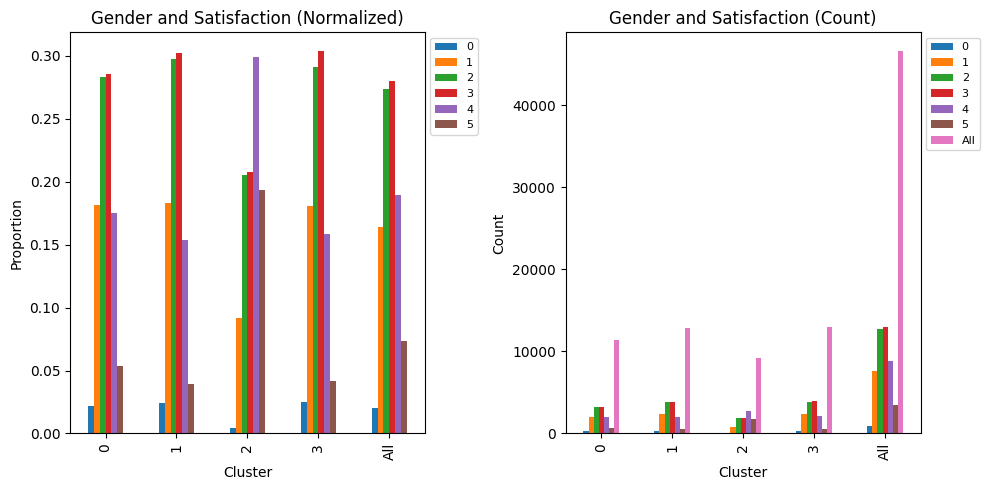

In [99]:
# クラスターごとの機内wifiサービス分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Inflight wifi service'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Gender and Satisfaction (Normalized)')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Inflight wifi service'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender and Satisfaction (Count)')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})


plt.tight_layout()
plt.show()


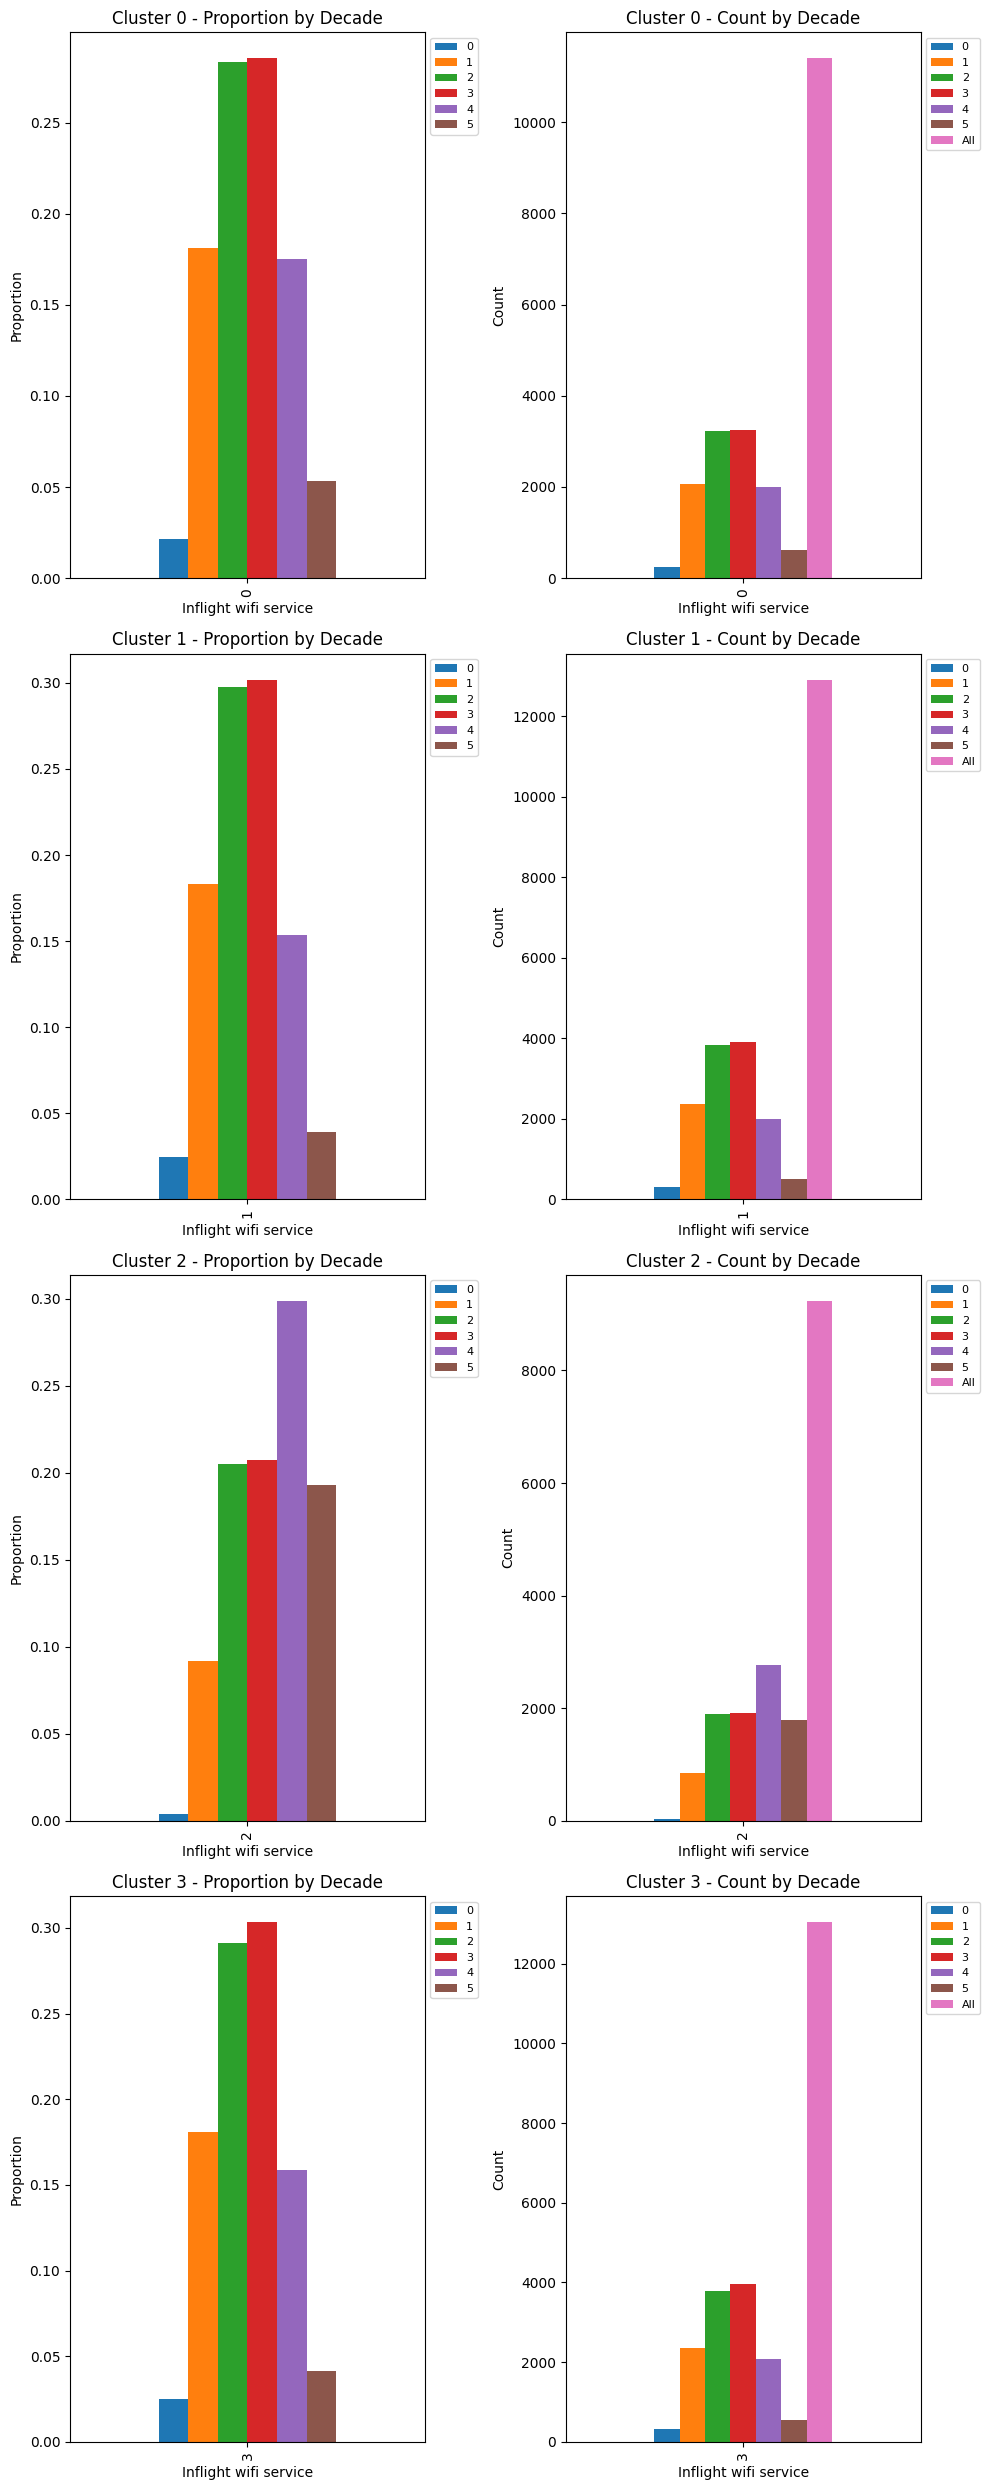

In [100]:
#各クラスターごとの年齢分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Inflight wifi service'], margins=True, normalize="index")
fig, axes = plt.subplots(4, 2, figsize=(10, 25))

for cluster in range(4):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], :]
    cluster_counts = cross_counts.loc[[cluster], :]

    # 左側のグラフ　　割合
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Inflight wifi service')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Decade')
    axes[cluster, 0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})


    # 右側のグラフ　数値    
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Inflight wifi service')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Decade')
    axes[cluster, 1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})


plt.tight_layout()
plt.show()



#### Departure/Arrival time convenient 出発・到着時間の利便性

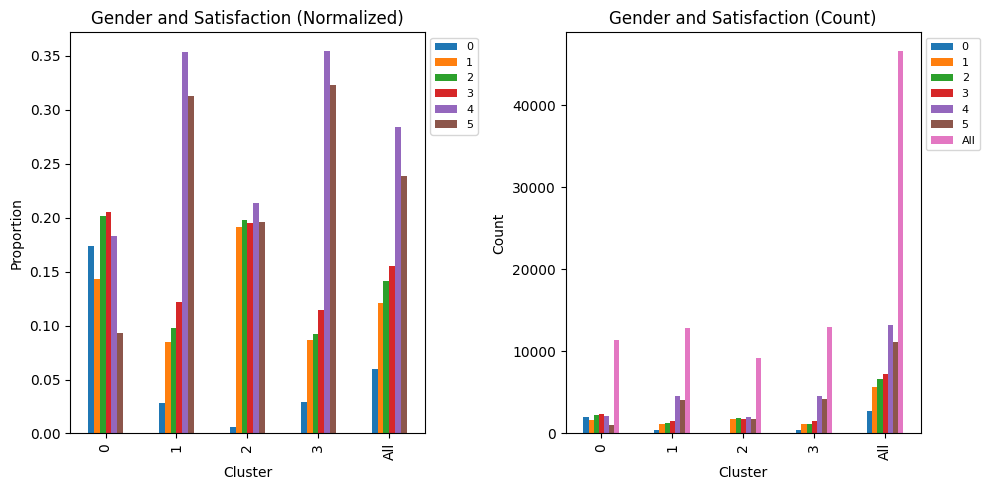

In [95]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Departure/Arrival time convenient'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Gender and Satisfaction (Normalized)')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Departure/Arrival time convenient'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender and Satisfaction (Count)')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


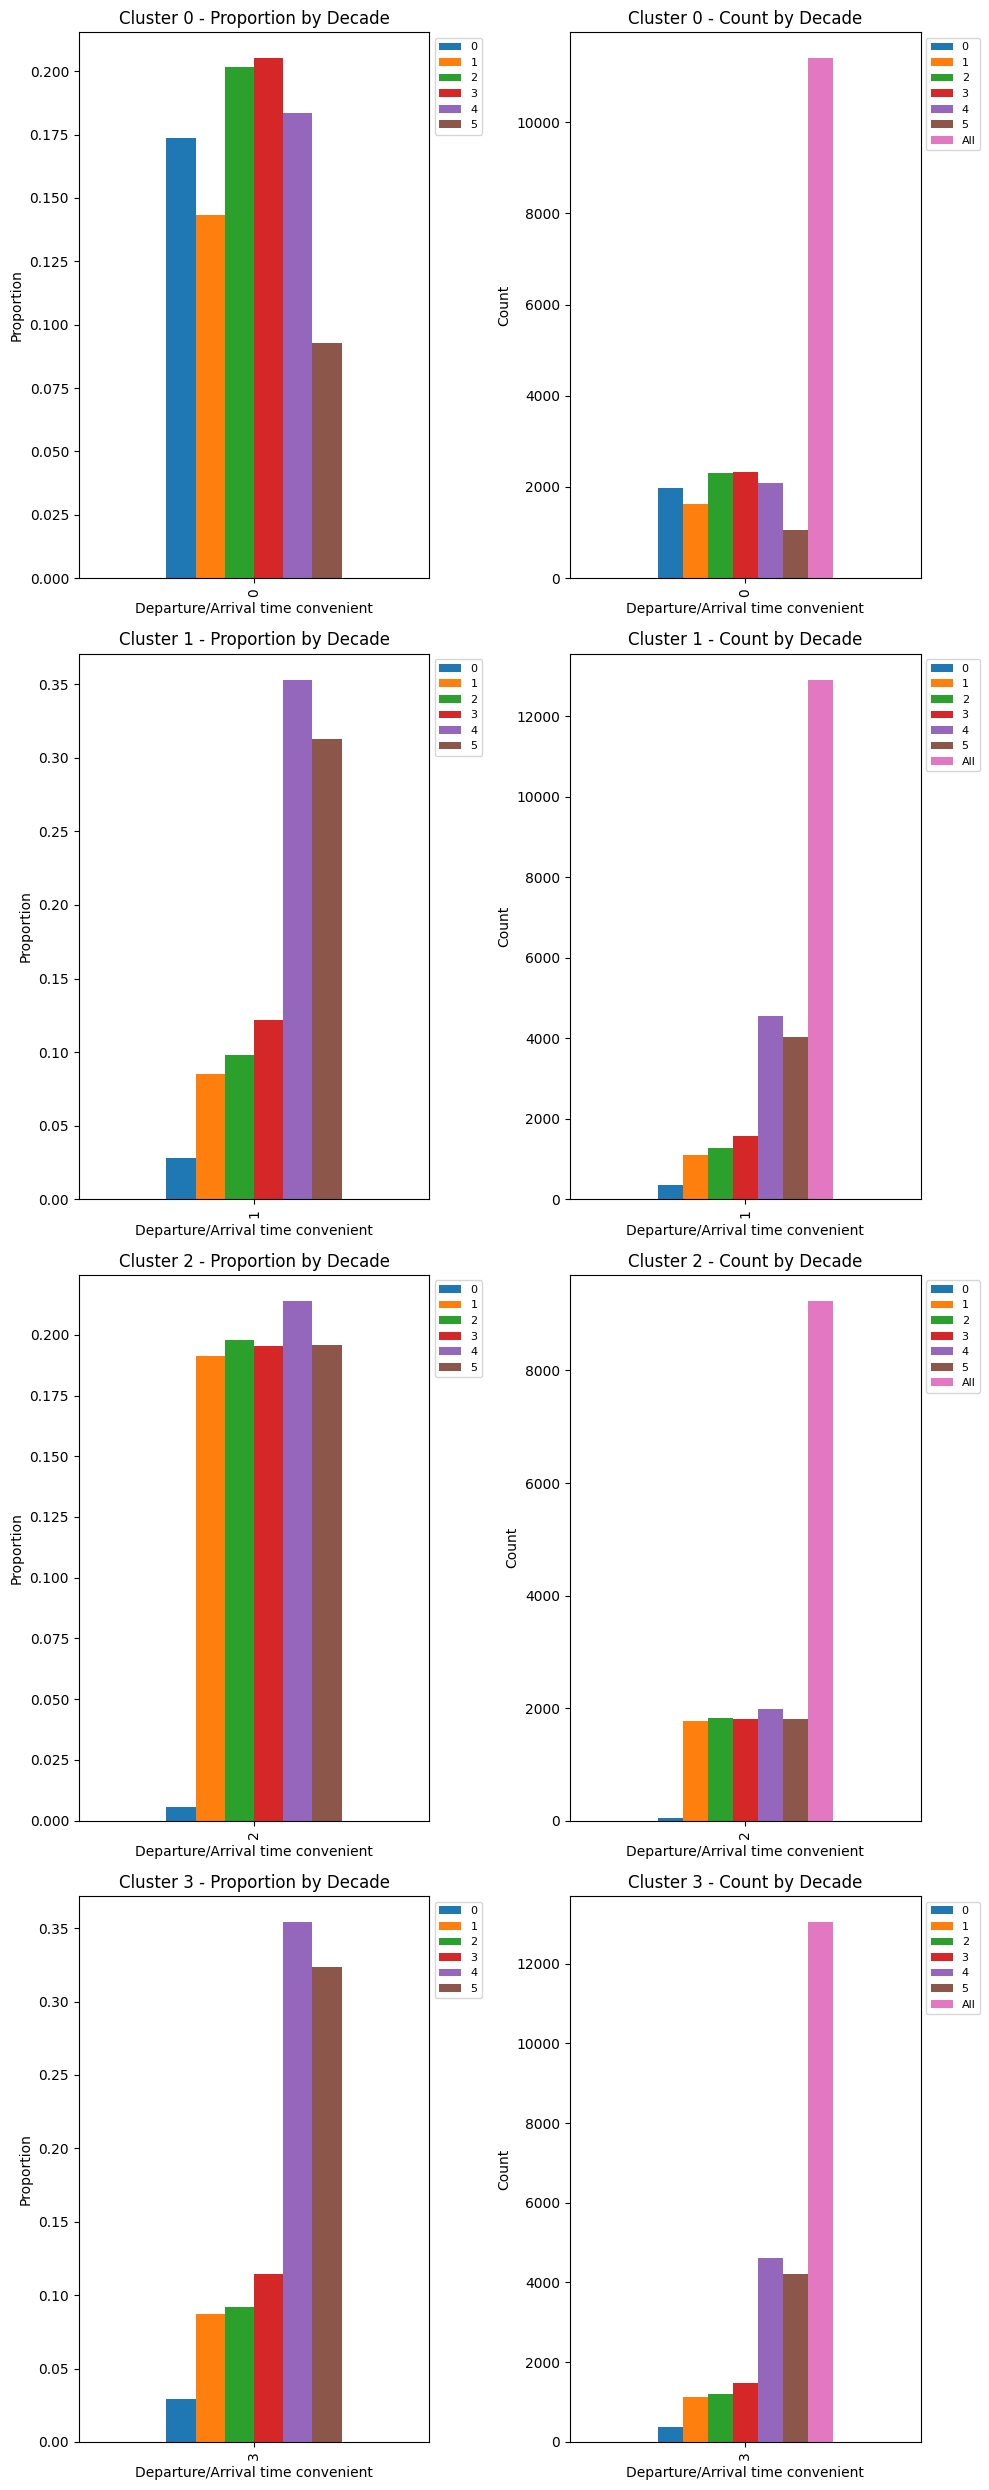

In [96]:
#各クラスターごとの年齢分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Departure/Arrival time convenient'], margins=True, normalize="index")
fig, axes = plt.subplots(4, 2, figsize=(10, 25))

for cluster in range(4):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], :]
    cluster_counts = cross_counts.loc[[cluster], :]

    # 左側のグラフ　　割合
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Departure/Arrival time convenient')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Decade')
    axes[cluster, 0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

    # 右側のグラフ　数値
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Departure/Arrival time convenient')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Decade')
    axes[cluster, 1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()

#### Ease of Online booking オンライン予約のしやすさ

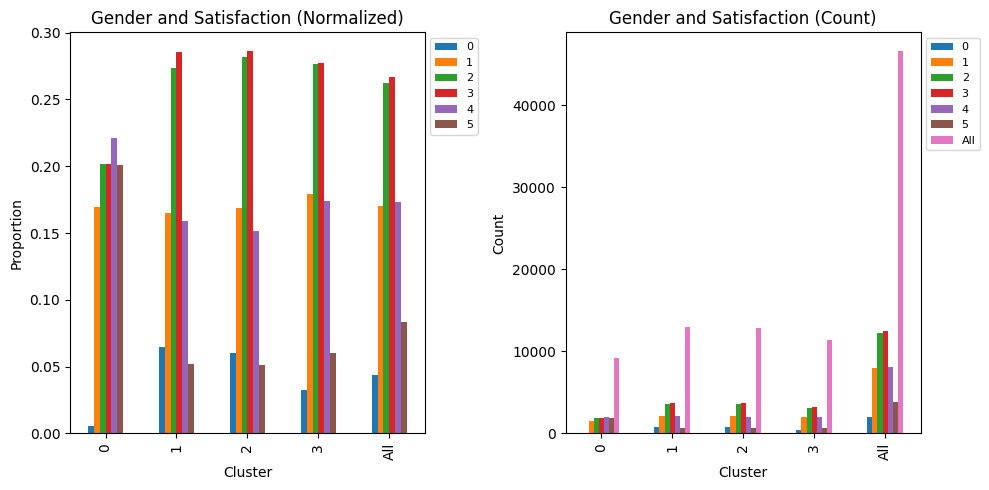

In [79]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Ease of Online booking'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Gender and Satisfaction (Normalized)')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Ease of Online booking'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender and Satisfaction (Count)')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


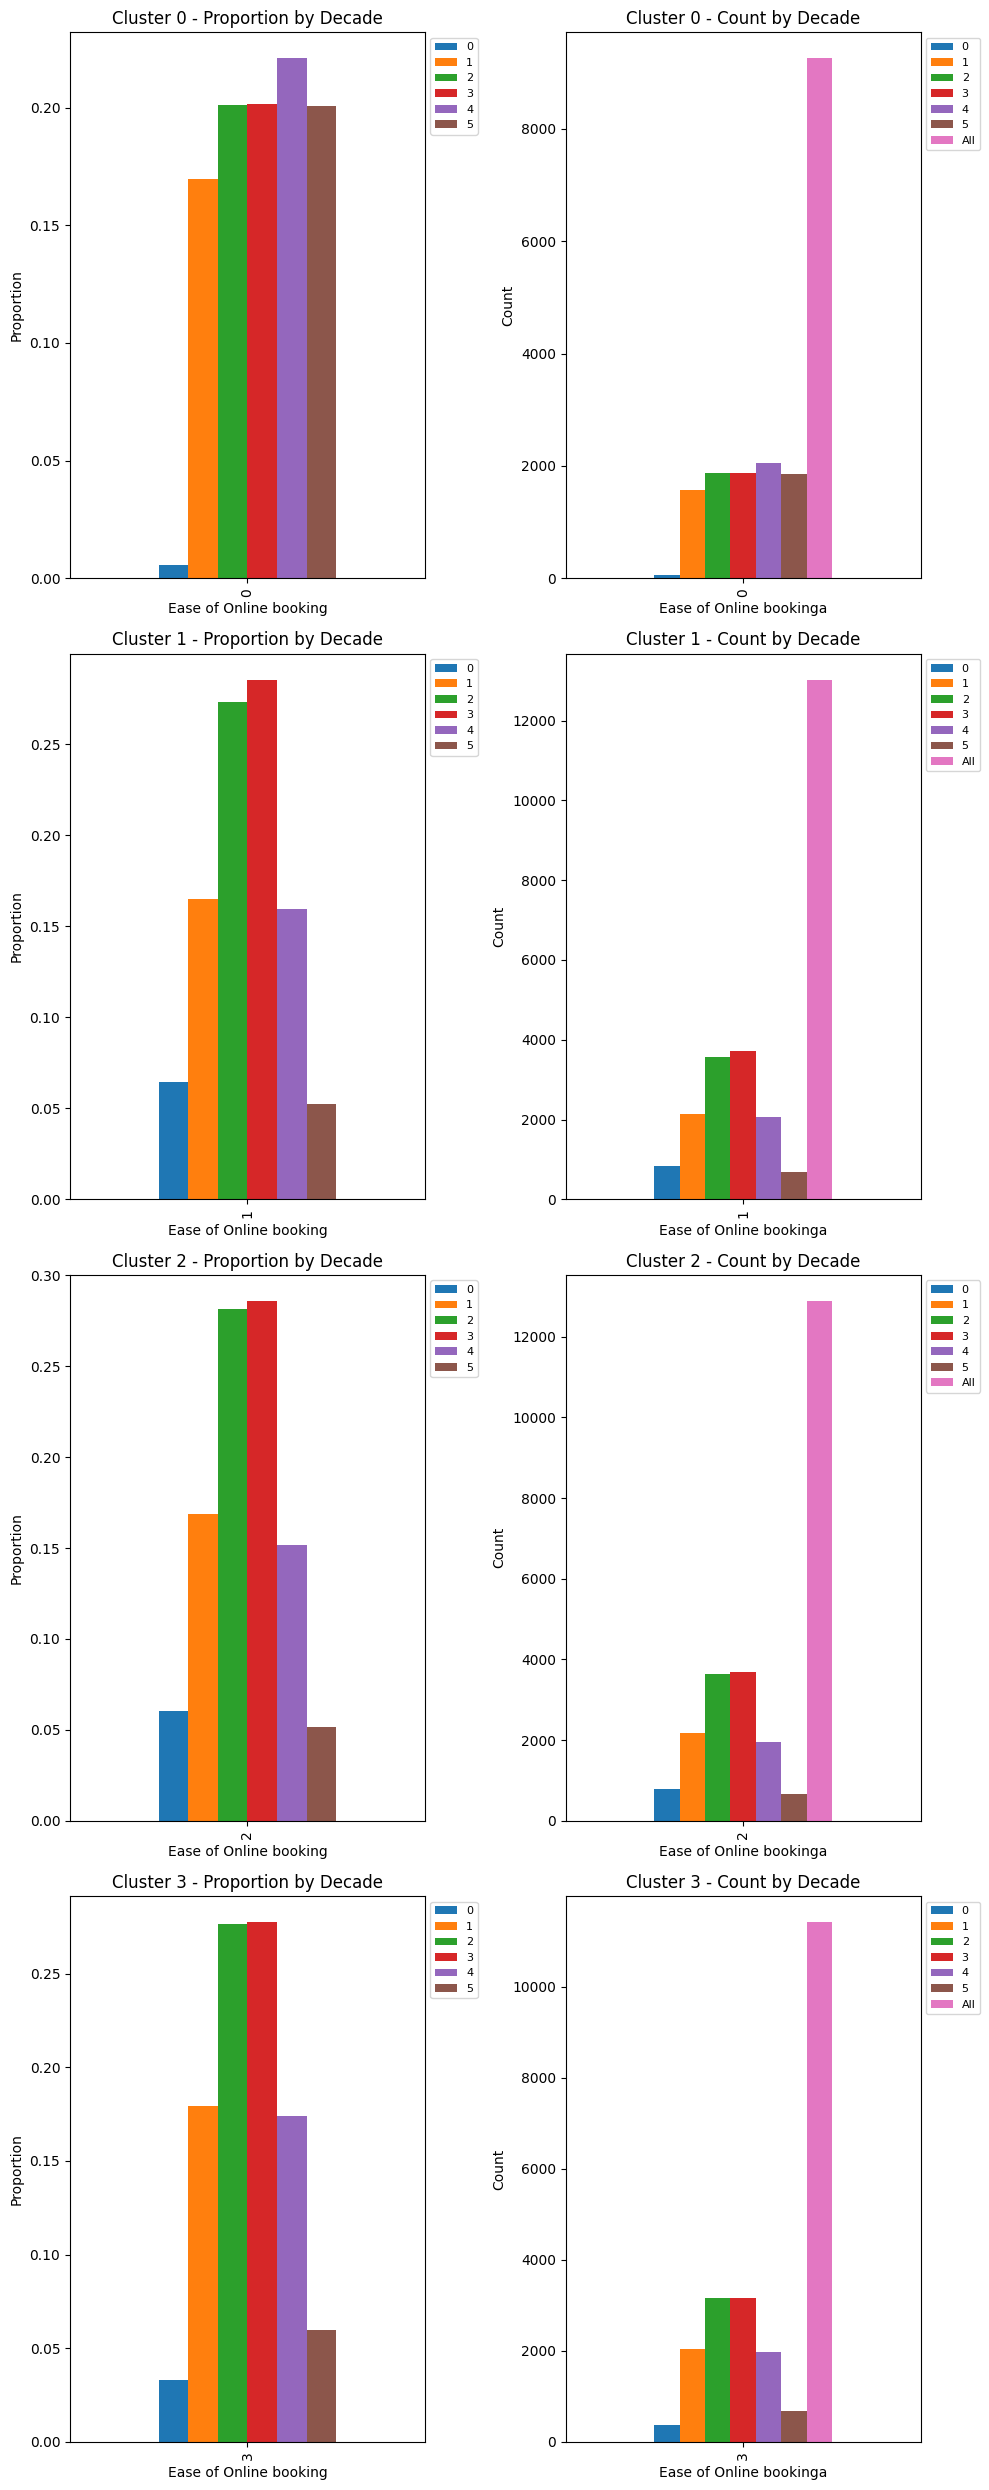

In [80]:
#各クラスターごとの年齢分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Ease of Online booking'], margins=True, normalize="index")
fig, axes = plt.subplots(4, 2, figsize=(10, 25))

for cluster in range(4):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], :]
    cluster_counts = cross_counts.loc[[cluster], :]

    # 左側のグラフ　　割合
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Ease of Online booking')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Decade')
    axes[cluster, 0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

    # 右側のグラフ　数値
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Ease of Online bookinga')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Decade')
    axes[cluster, 1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()

#### Gate location

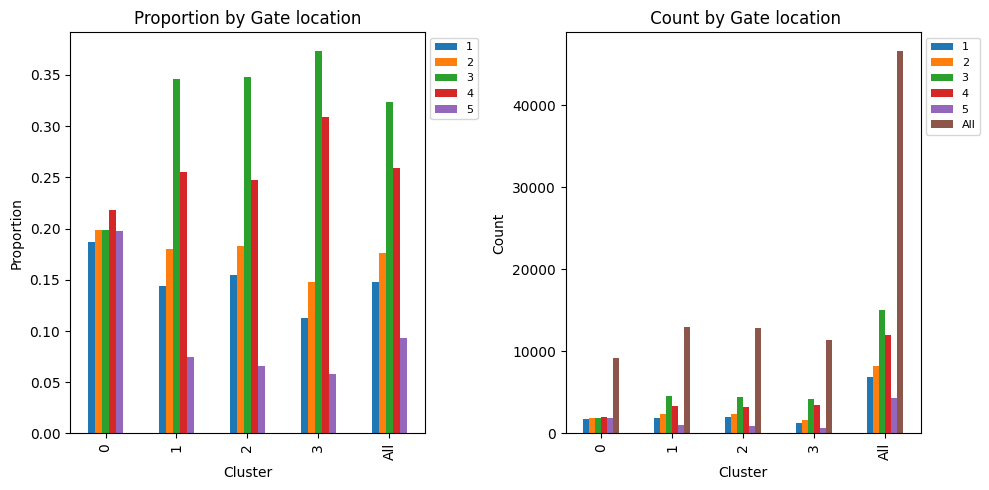

In [89]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Gate location'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Proportion by Gate location')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Gate location'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title(f' Count by Gate location')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


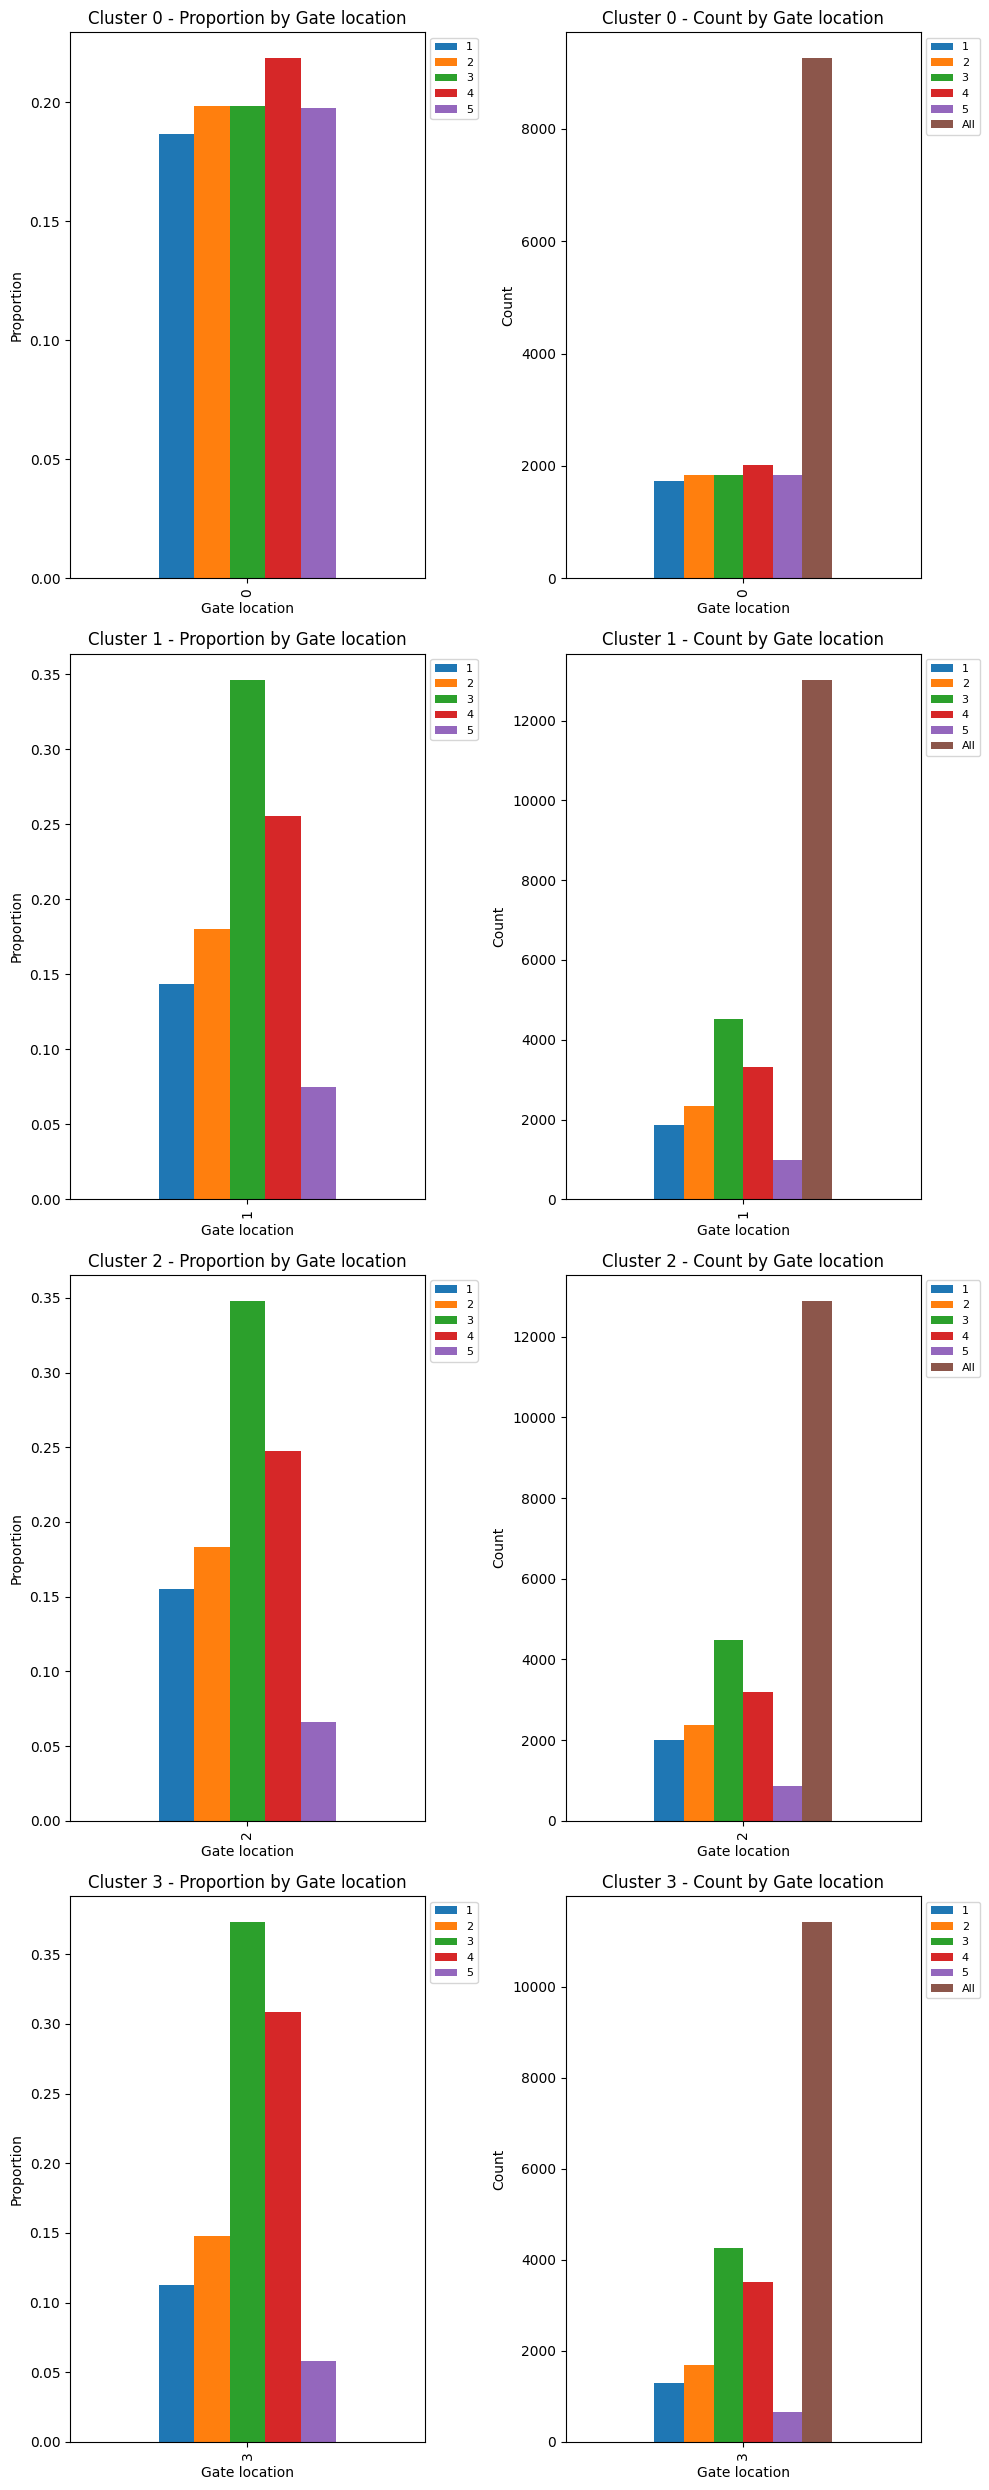

In [91]:
#各クラスターごとの年齢分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Gate location'], margins=True, normalize="index")
fig, axes = plt.subplots(4, 2, figsize=(10, 25))

for cluster in range(4):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], :]
    cluster_counts = cross_counts.loc[[cluster], :]

    # 左側のグラフ　　割合
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Gate location')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Gate location')
    axes[cluster, 0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

    # 右側のグラフ　数値
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Gate location')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Gate location')
    axes[cluster, 1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()

#### Food and drink

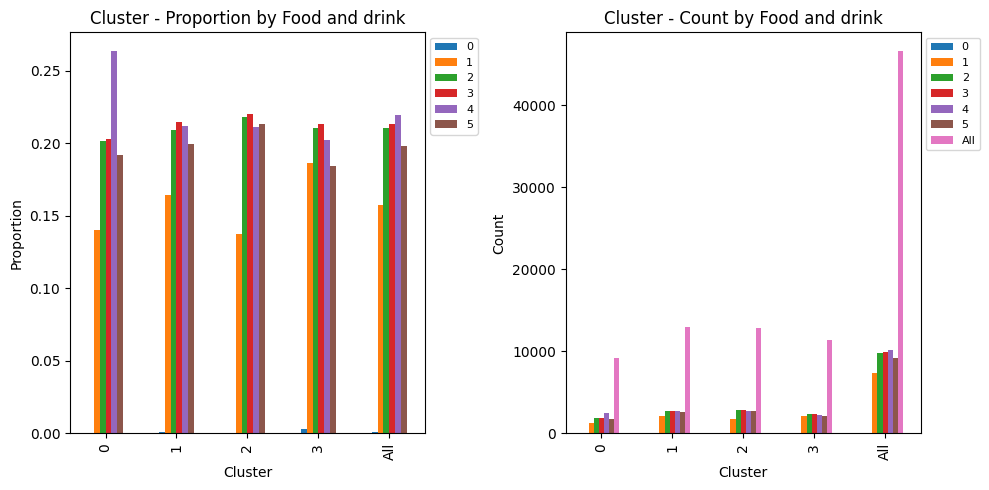

In [93]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Food and drink'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by Food and drink')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Food and drink'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by Food and drink')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


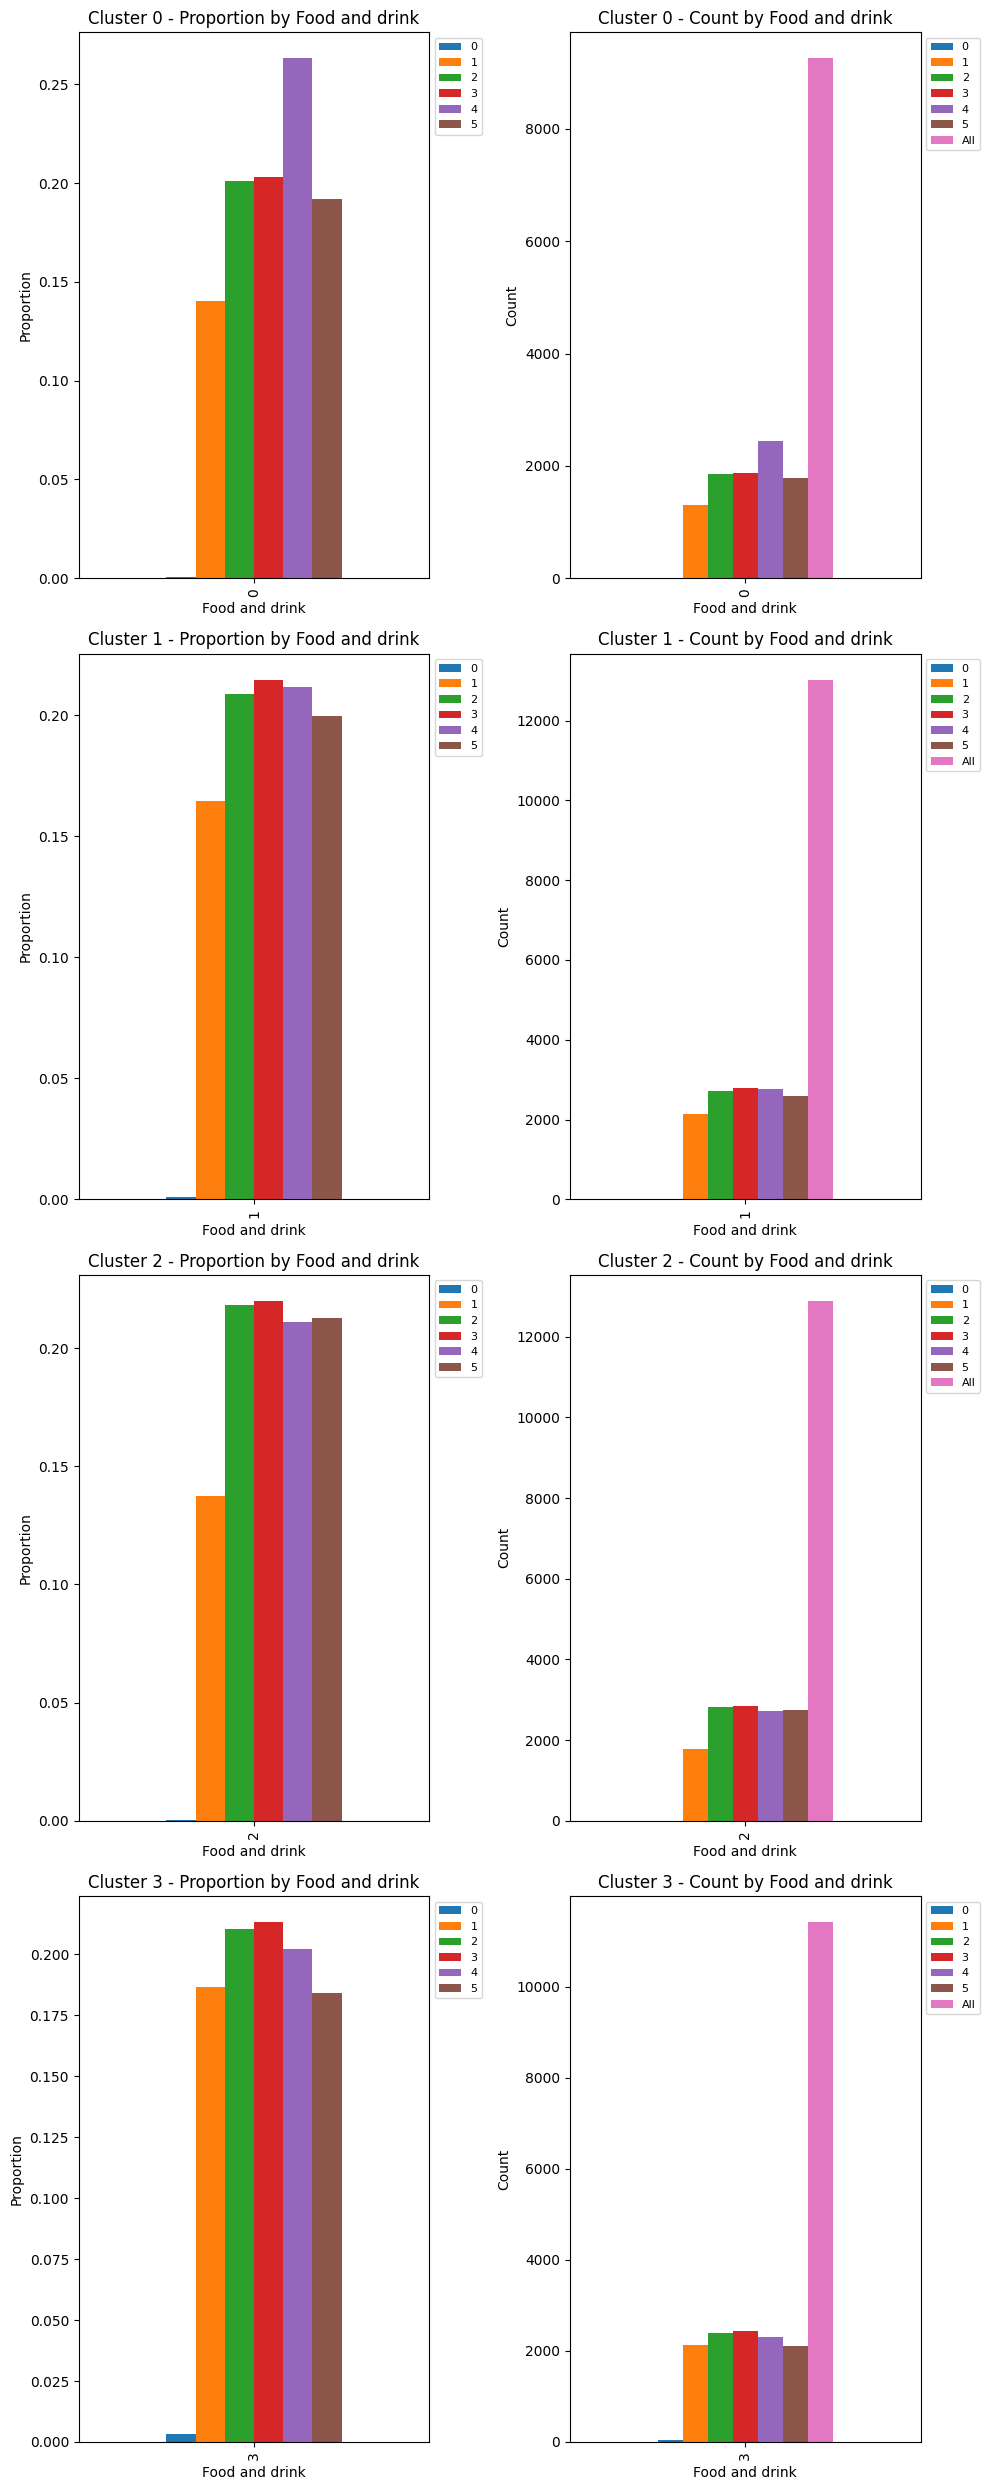

In [94]:
#各クラスターごとの年齢分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Food and drink'], margins=True, normalize="index")
fig, axes = plt.subplots(4, 2, figsize=(10, 25))

for cluster in range(4):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], :]
    cluster_counts = cross_counts.loc[[cluster], :]

    # 左側のグラフ　　割合
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Food and drink')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Food and drink')
    axes[cluster, 0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

    # 右側のグラフ　数値
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Food and drink')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Food and drink')
    axes[cluster, 1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()

#### Online boarding

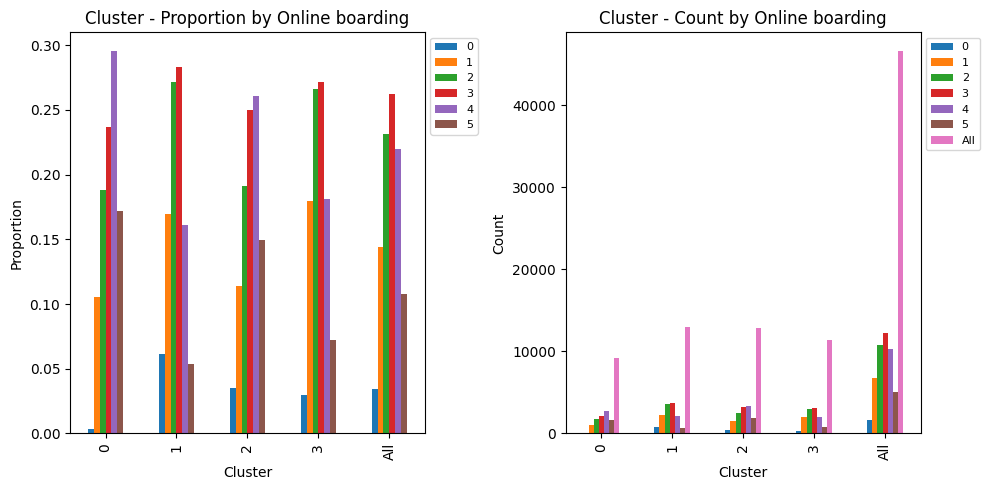

In [96]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Online boarding'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by Online boarding')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Online boarding'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by Online boarding')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


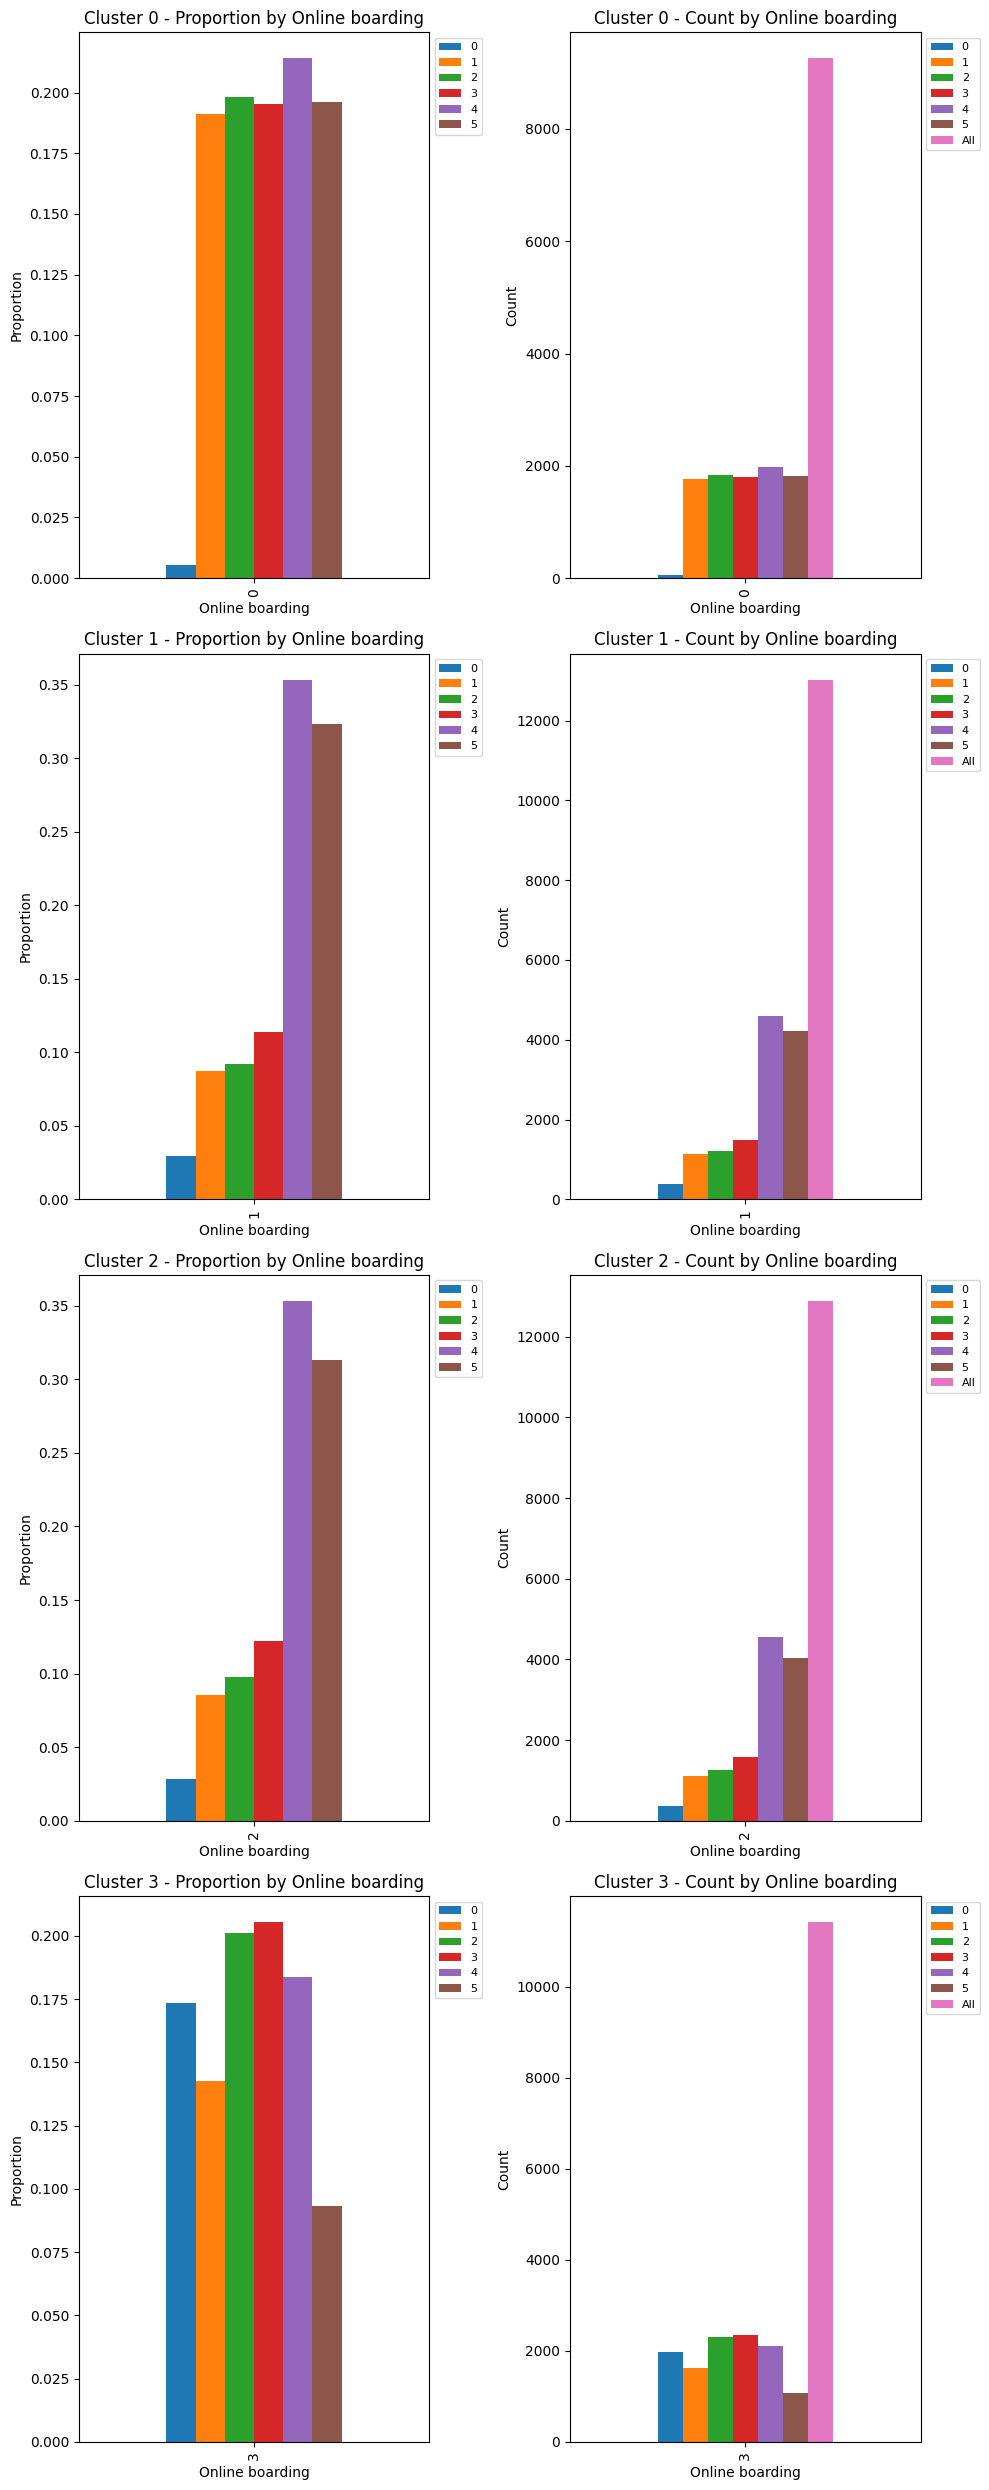

In [116]:
#各クラスターごとの年齢分布
fig, axes = plt.subplots(4, 2, figsize=(10, 25))

for cluster in range(4):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], :]
    cluster_counts = cross_counts.loc[[cluster], :]

    # 左側のグラフ　　割合
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Online boarding')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Online boarding')
    axes[cluster, 0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

    # 右側のグラフ　数値
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Online boarding')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Online boarding')
    axes[cluster, 1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


#### Seat comfort

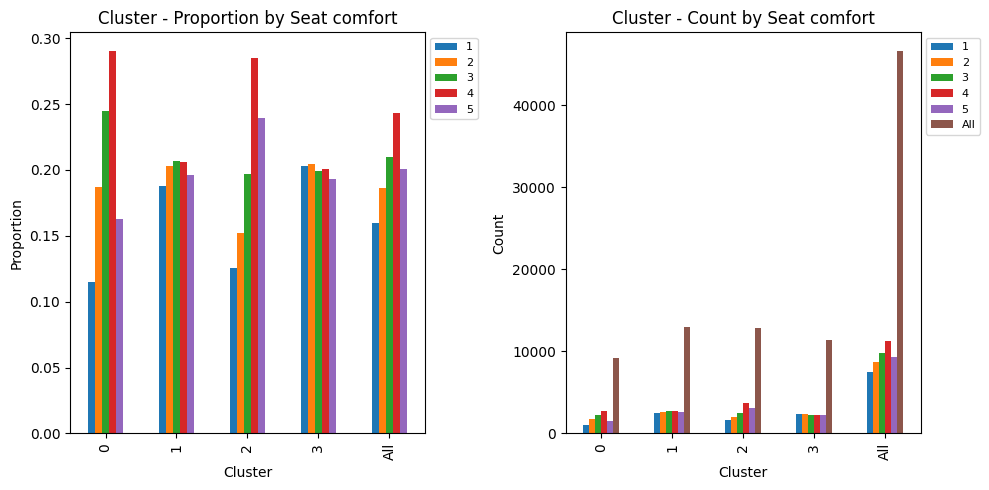

In [98]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Seat comfort'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by Seat comfort')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Seat comfort'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by Seat comfort')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


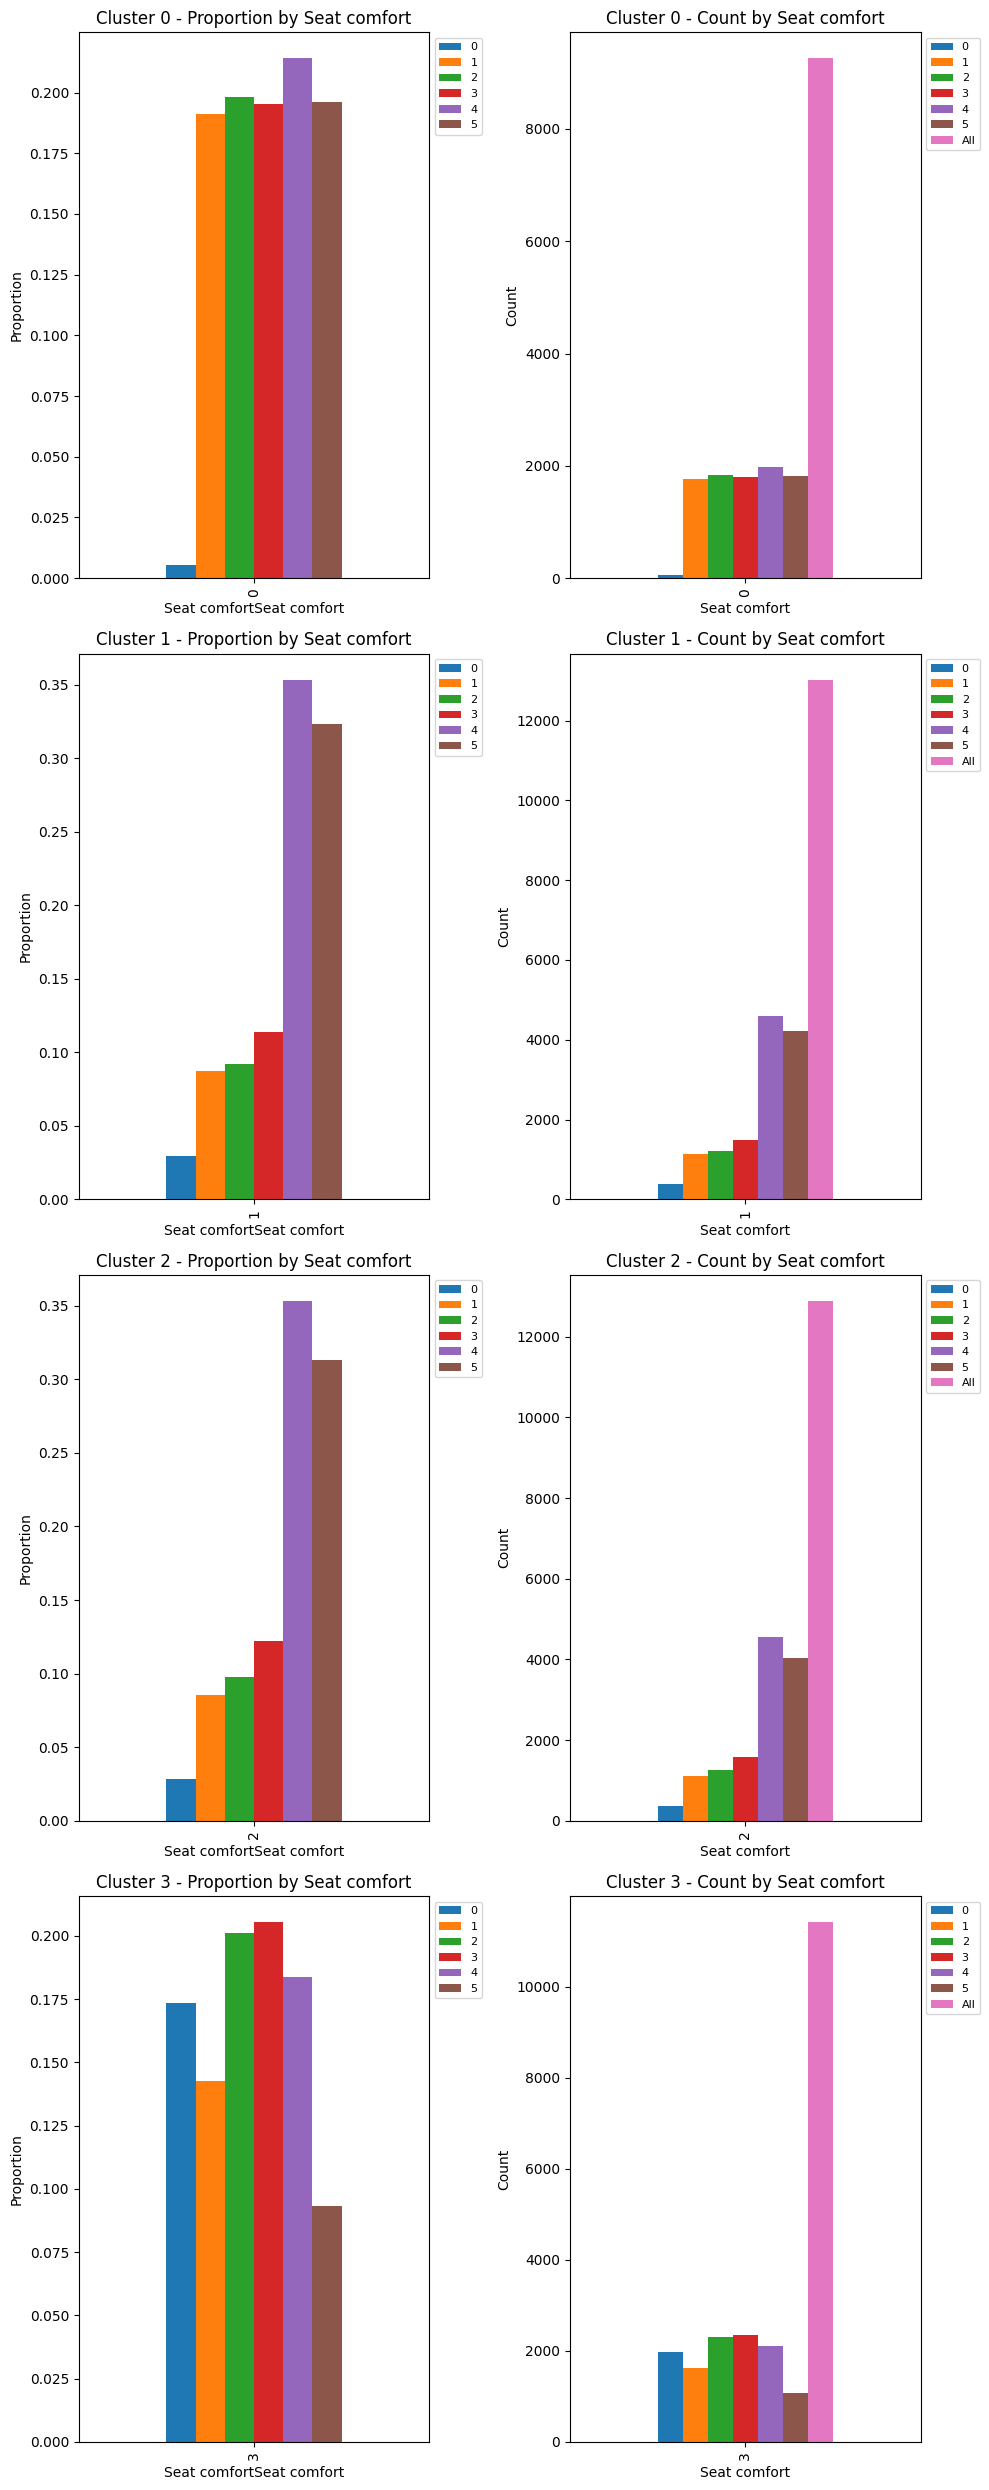

In [117]:
#各クラスターごとの年齢分布
fig, axes = plt.subplots(4, 2, figsize=(10, 25))

for cluster in range(4):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], :]
    cluster_counts = cross_counts.loc[[cluster], :]

    # 左側のグラフ　　割合
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Seat comfortSeat comfort')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Seat comfort')
    axes[cluster, 0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

    # 右側のグラフ　数値
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Seat comfort')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Seat comfort')
    axes[cluster, 1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


#### Inflight entertainment

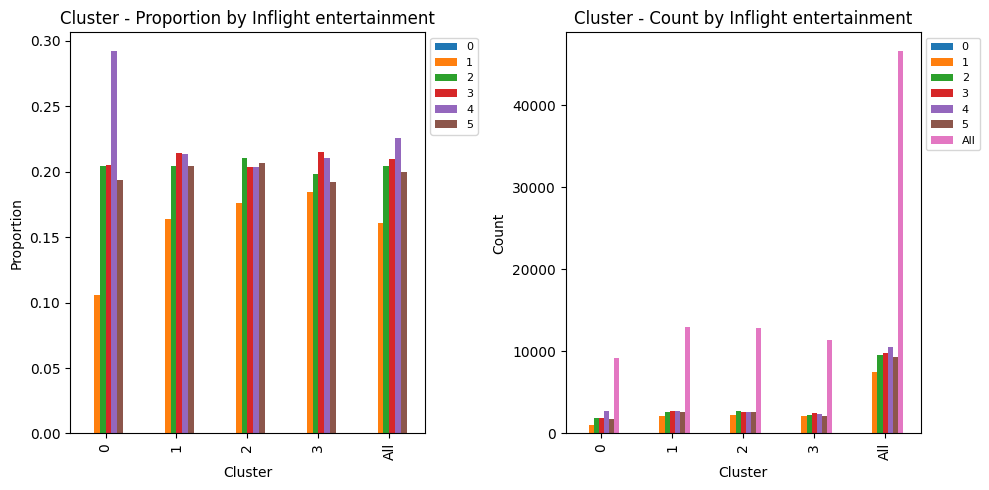

In [100]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Inflight entertainment'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by Inflight entertainment')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Inflight entertainment'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by Inflight entertainment')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


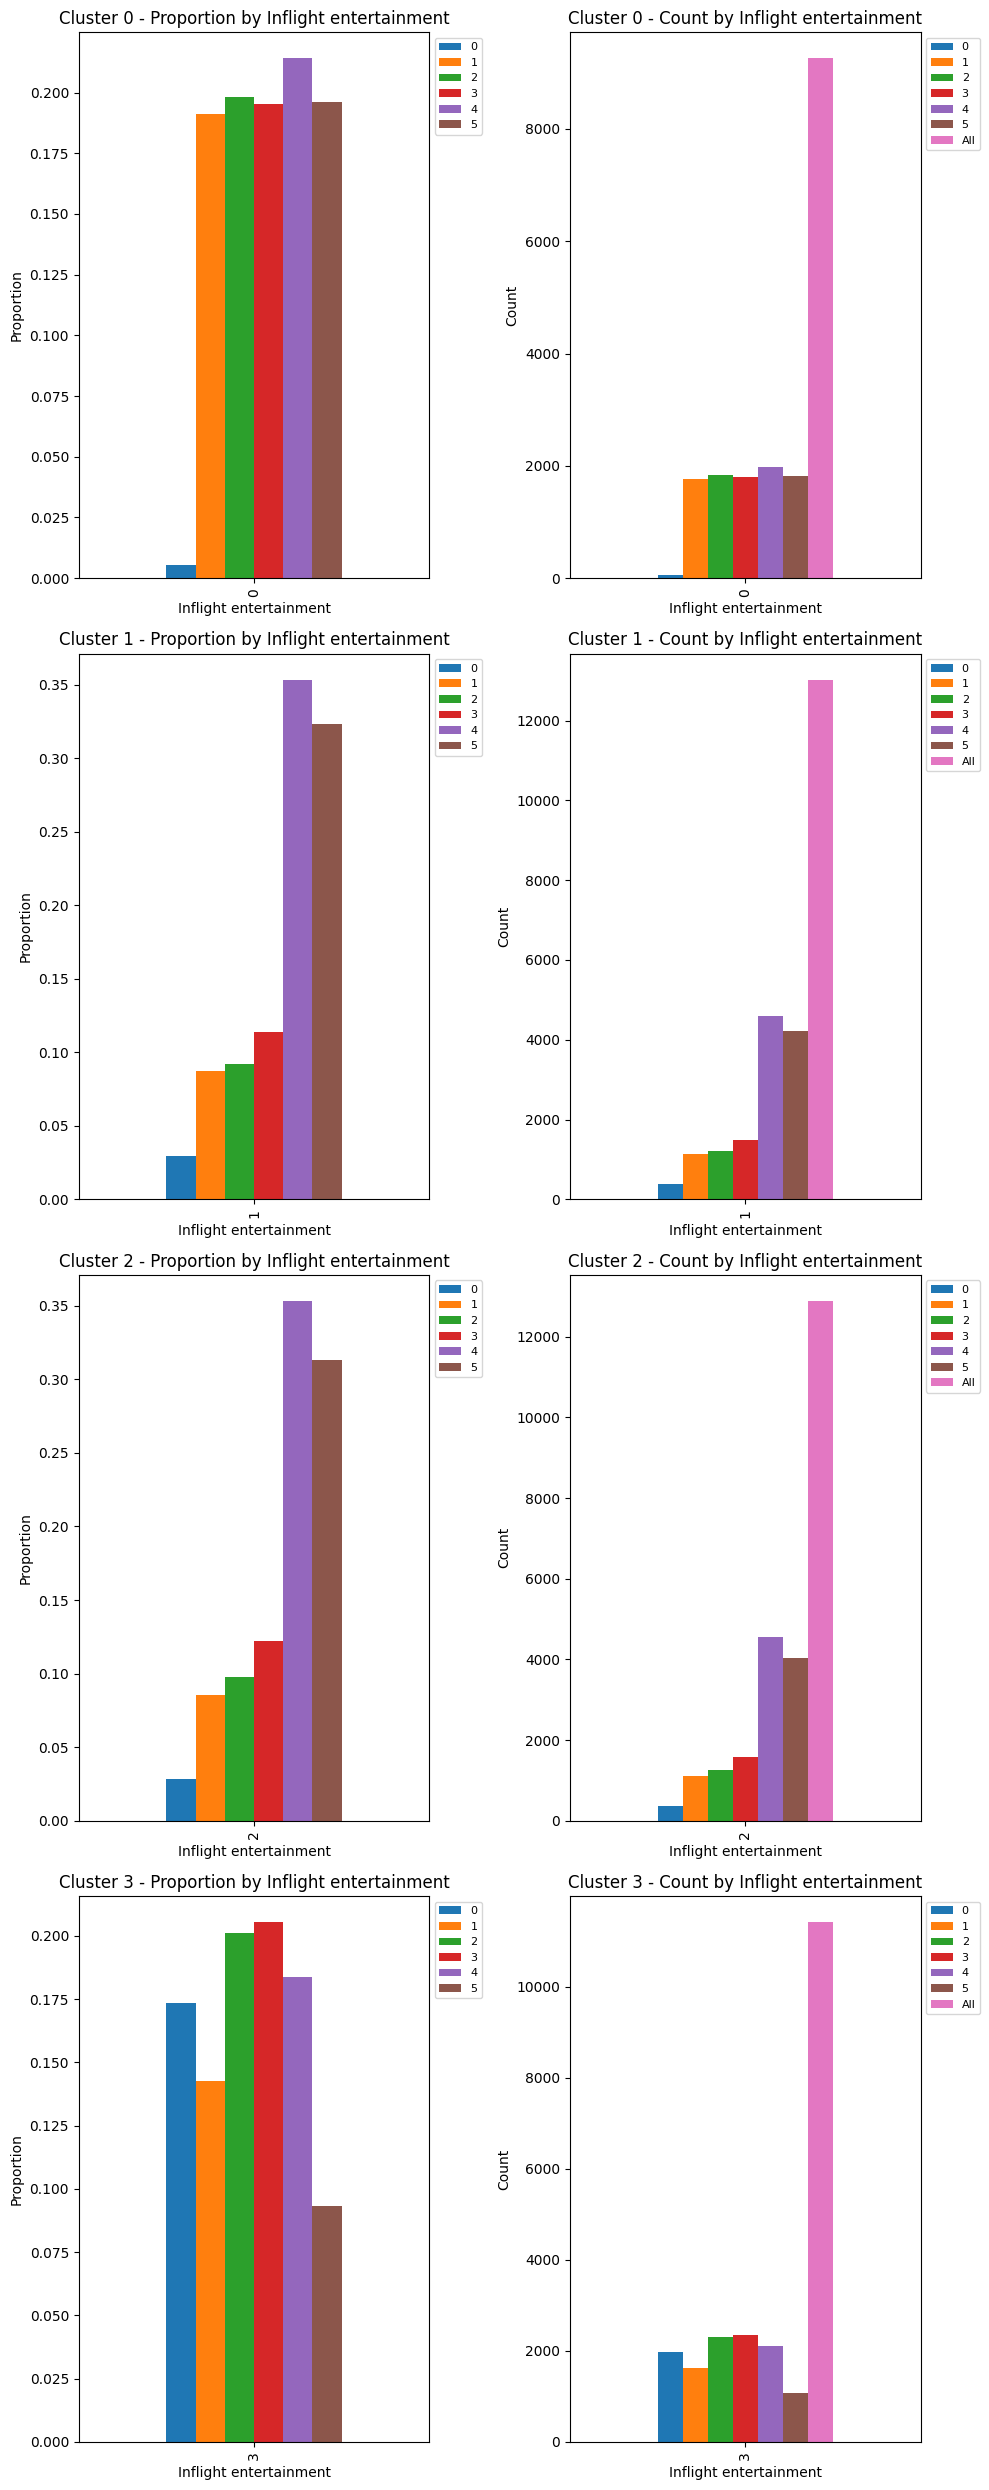

In [118]:
#各クラスターごとの年齢分布
fig, axes = plt.subplots(4, 2, figsize=(10, 25))

for cluster in range(4):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], :]
    cluster_counts = cross_counts.loc[[cluster], :]

    # 左側のグラフ　　割合
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Inflight entertainment')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Inflight entertainment')
    axes[cluster, 0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

    # 右側のグラフ　数値
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Inflight entertainment')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Inflight entertainment')
    axes[cluster, 1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


#### On-board service

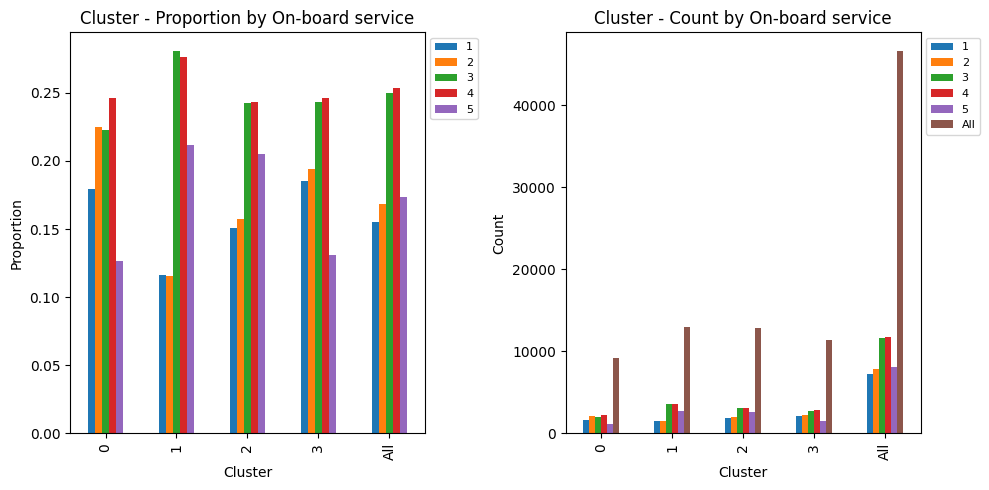

In [102]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['On-board service'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by On-board service')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['On-board service'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by On-board service')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


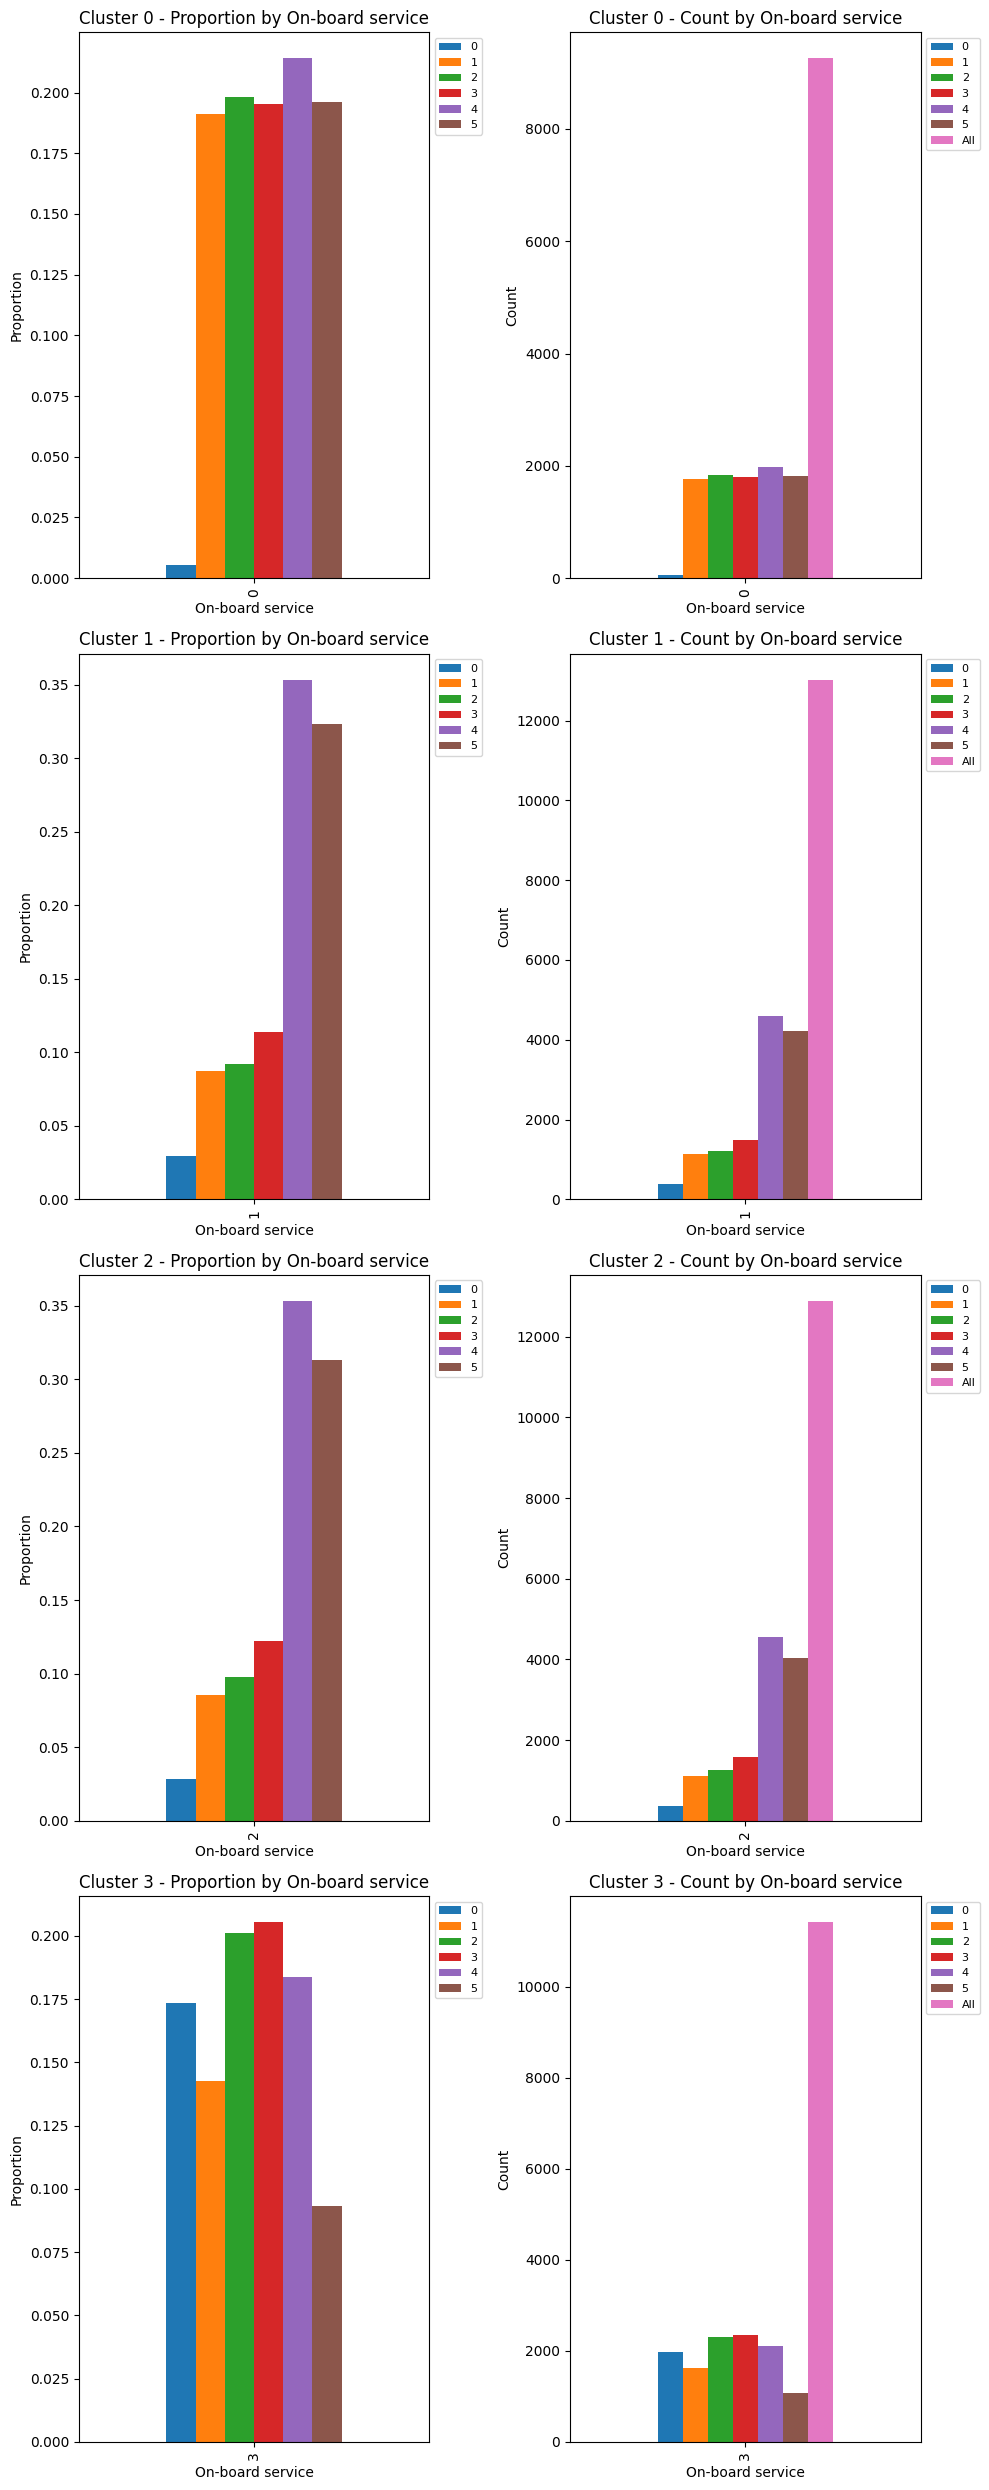

In [119]:
#各クラスターごとの年齢分布
fig, axes = plt.subplots(4, 2, figsize=(10, 25))

for cluster in range(4):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], :]
    cluster_counts = cross_counts.loc[[cluster], :]

    # 左側のグラフ　　割合
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('On-board service')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by On-board service')
    axes[cluster, 0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

    # 右側のグラフ　数値
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('On-board service')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by On-board service')
    axes[cluster, 1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


#### Leg room service

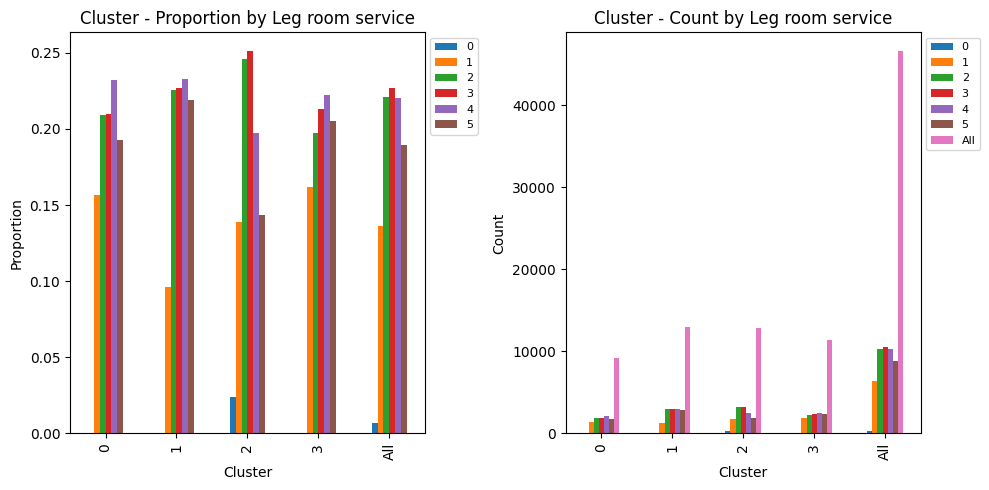

In [104]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Leg room service'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by Leg room service')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Leg room service'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by Leg room service')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


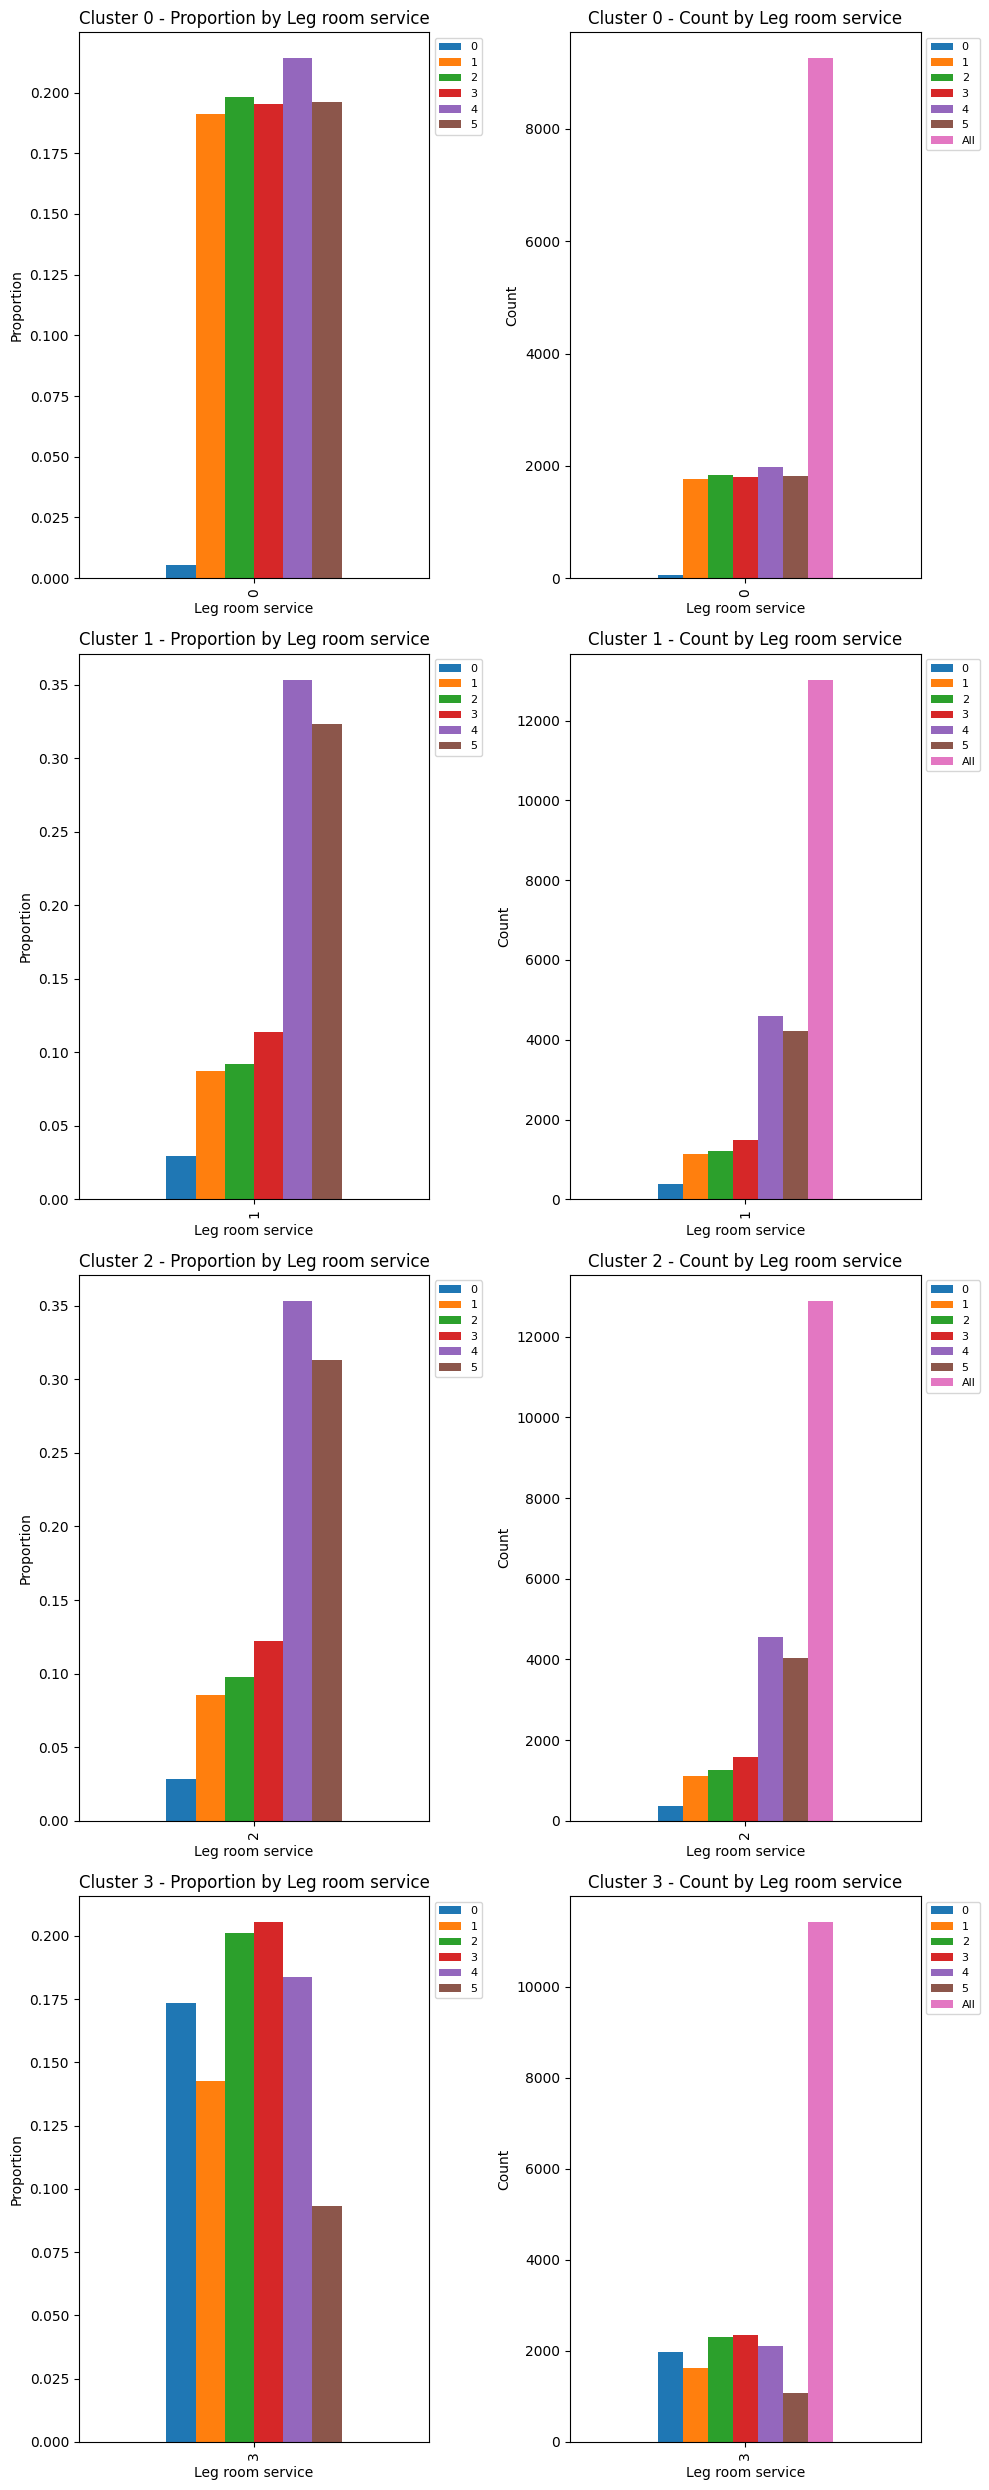

In [120]:
#各クラスターごとの年齢分布
fig, axes = plt.subplots(4, 2, figsize=(10, 25))

for cluster in range(4):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], :]
    cluster_counts = cross_counts.loc[[cluster], :]

    # 左側のグラフ　　割合
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Leg room service')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Leg room service')
    axes[cluster, 0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

    # 右側のグラフ　数値
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Leg room service')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Leg room service')
    axes[cluster, 1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


#### Baggage handling　オンライン搭乗

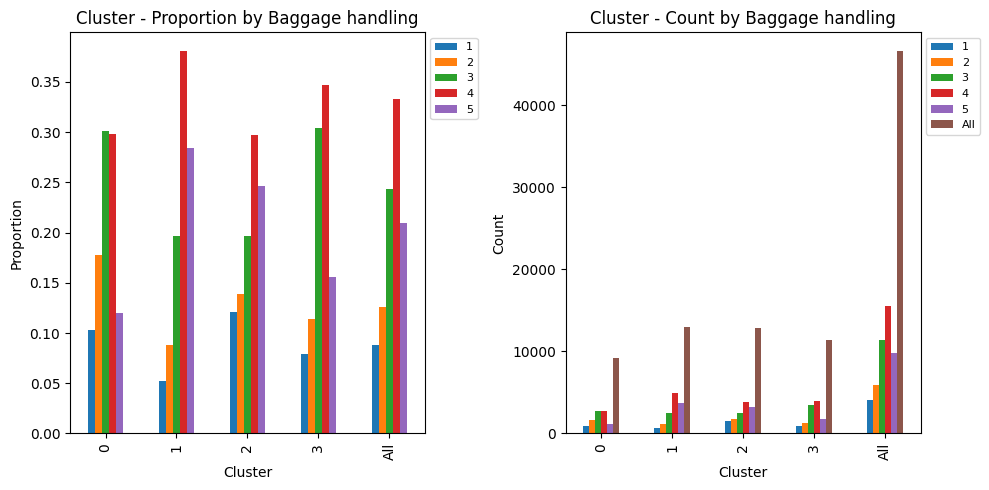

In [107]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Baggage handling'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by Baggage handling')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Baggage handling'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by Baggage handling')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


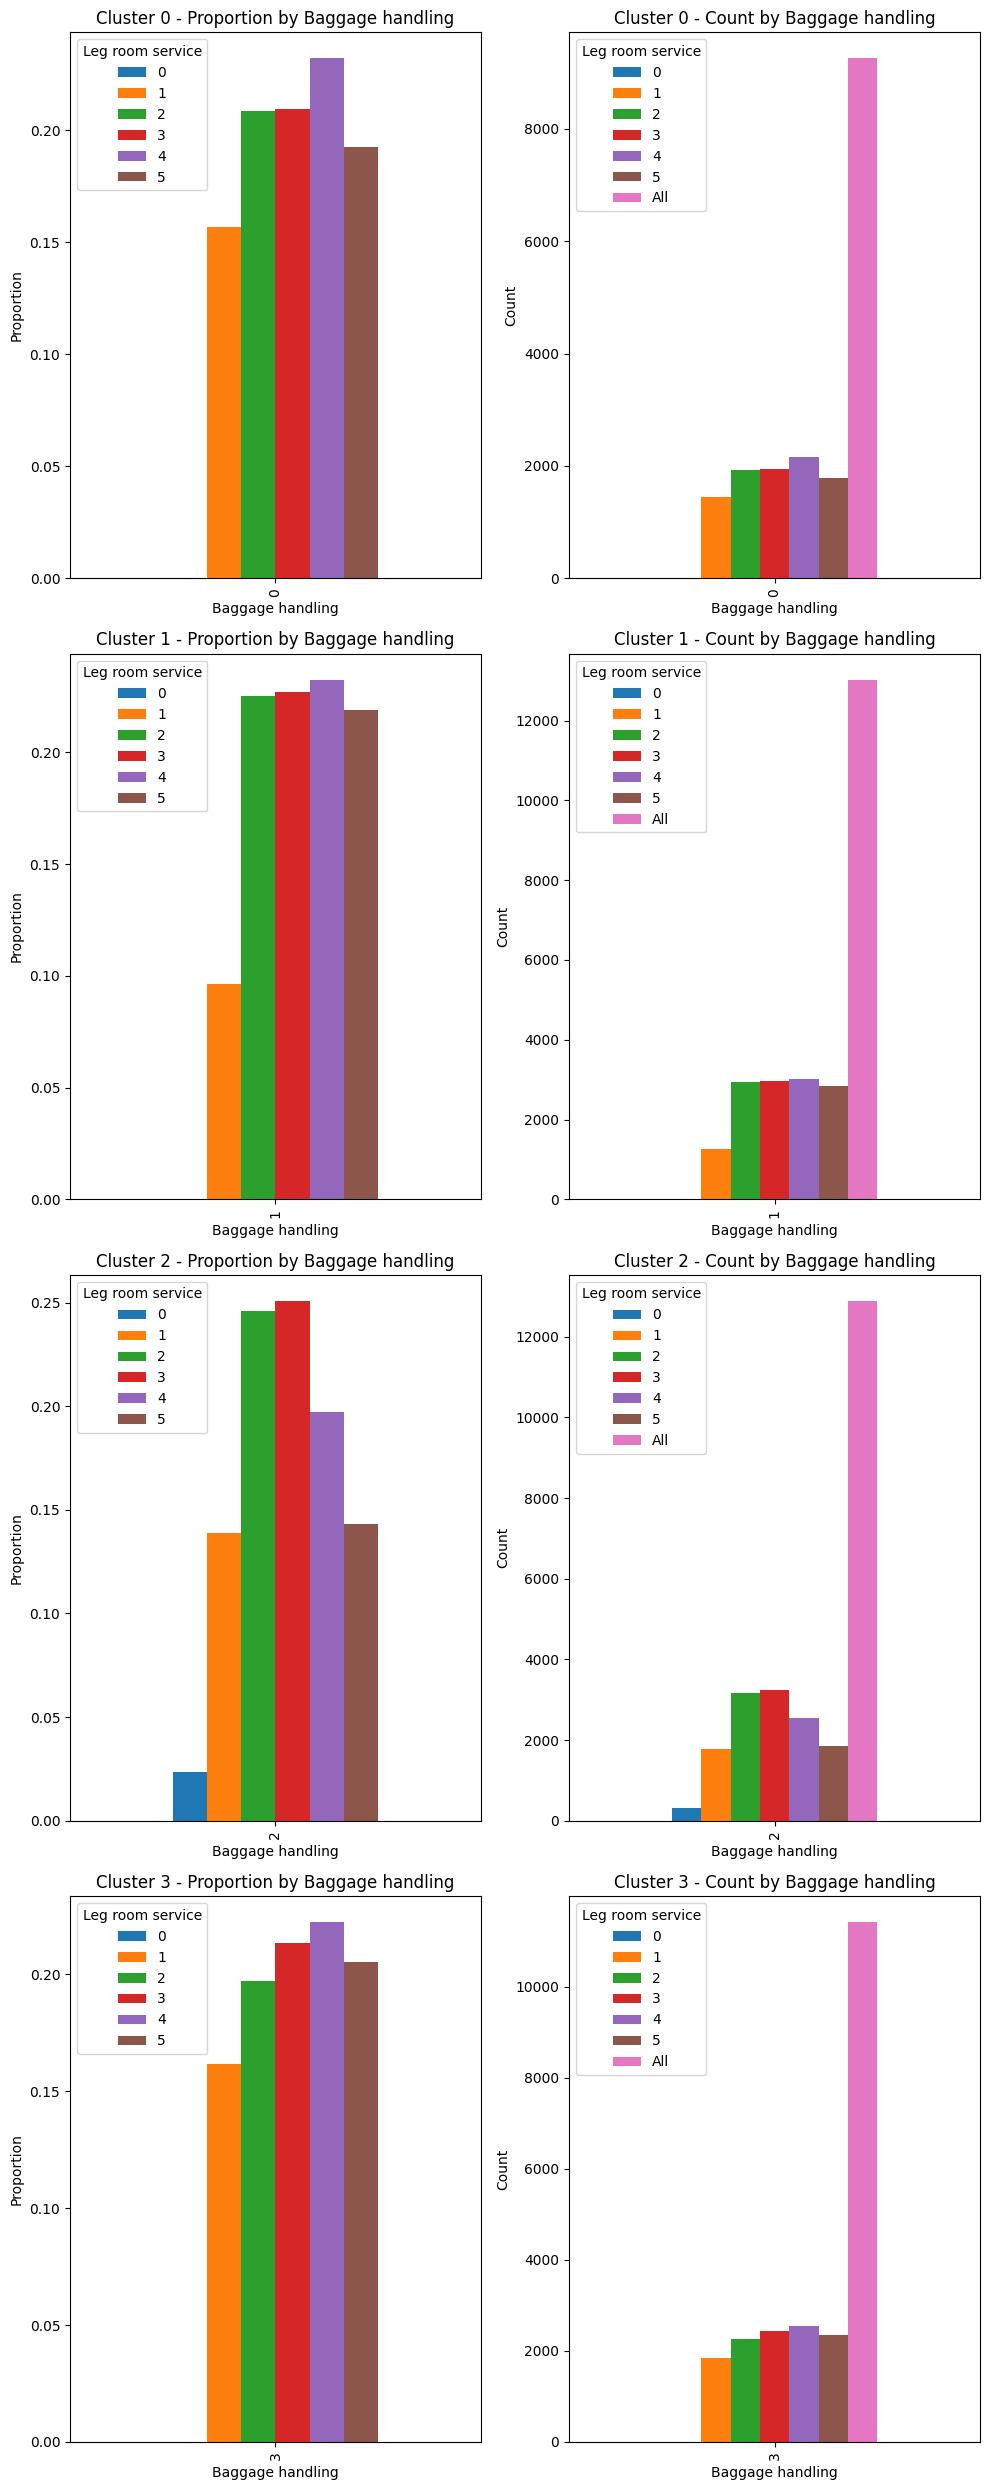

In [106]:
#各クラスターごとの年齢分布
fig, axes = plt.subplots(4, 2, figsize=(10, 25))

for cluster in range(4):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], :]
    cluster_counts = cross_counts.loc[[cluster], :]

    # 左側のグラフ　　割合
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Baggage handling')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Baggage handling')
    axes[cluster, 0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

    # 右側のグラフ　数値
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Baggage handling')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Baggage handling')
    axes[cluster, 1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


#### Checkin service

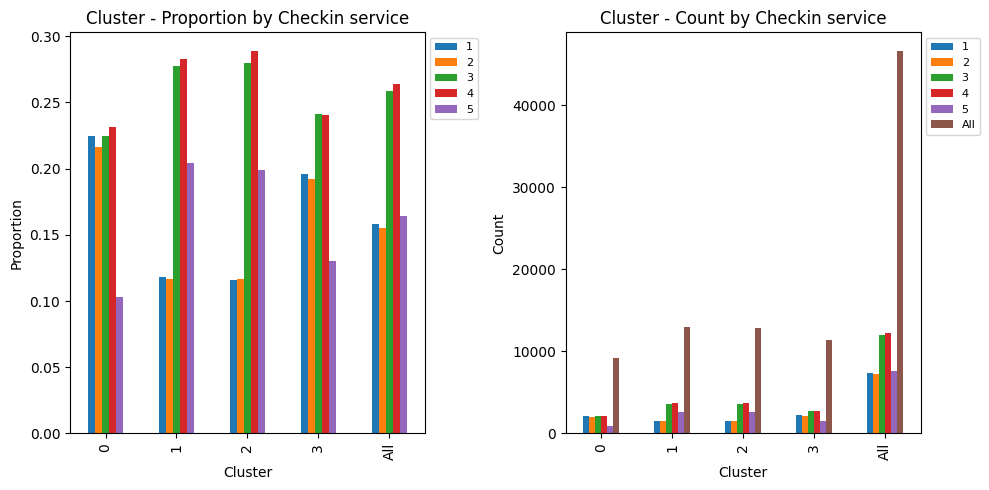

In [108]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Checkin service'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by Checkin service')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Checkin service'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by Checkin service')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


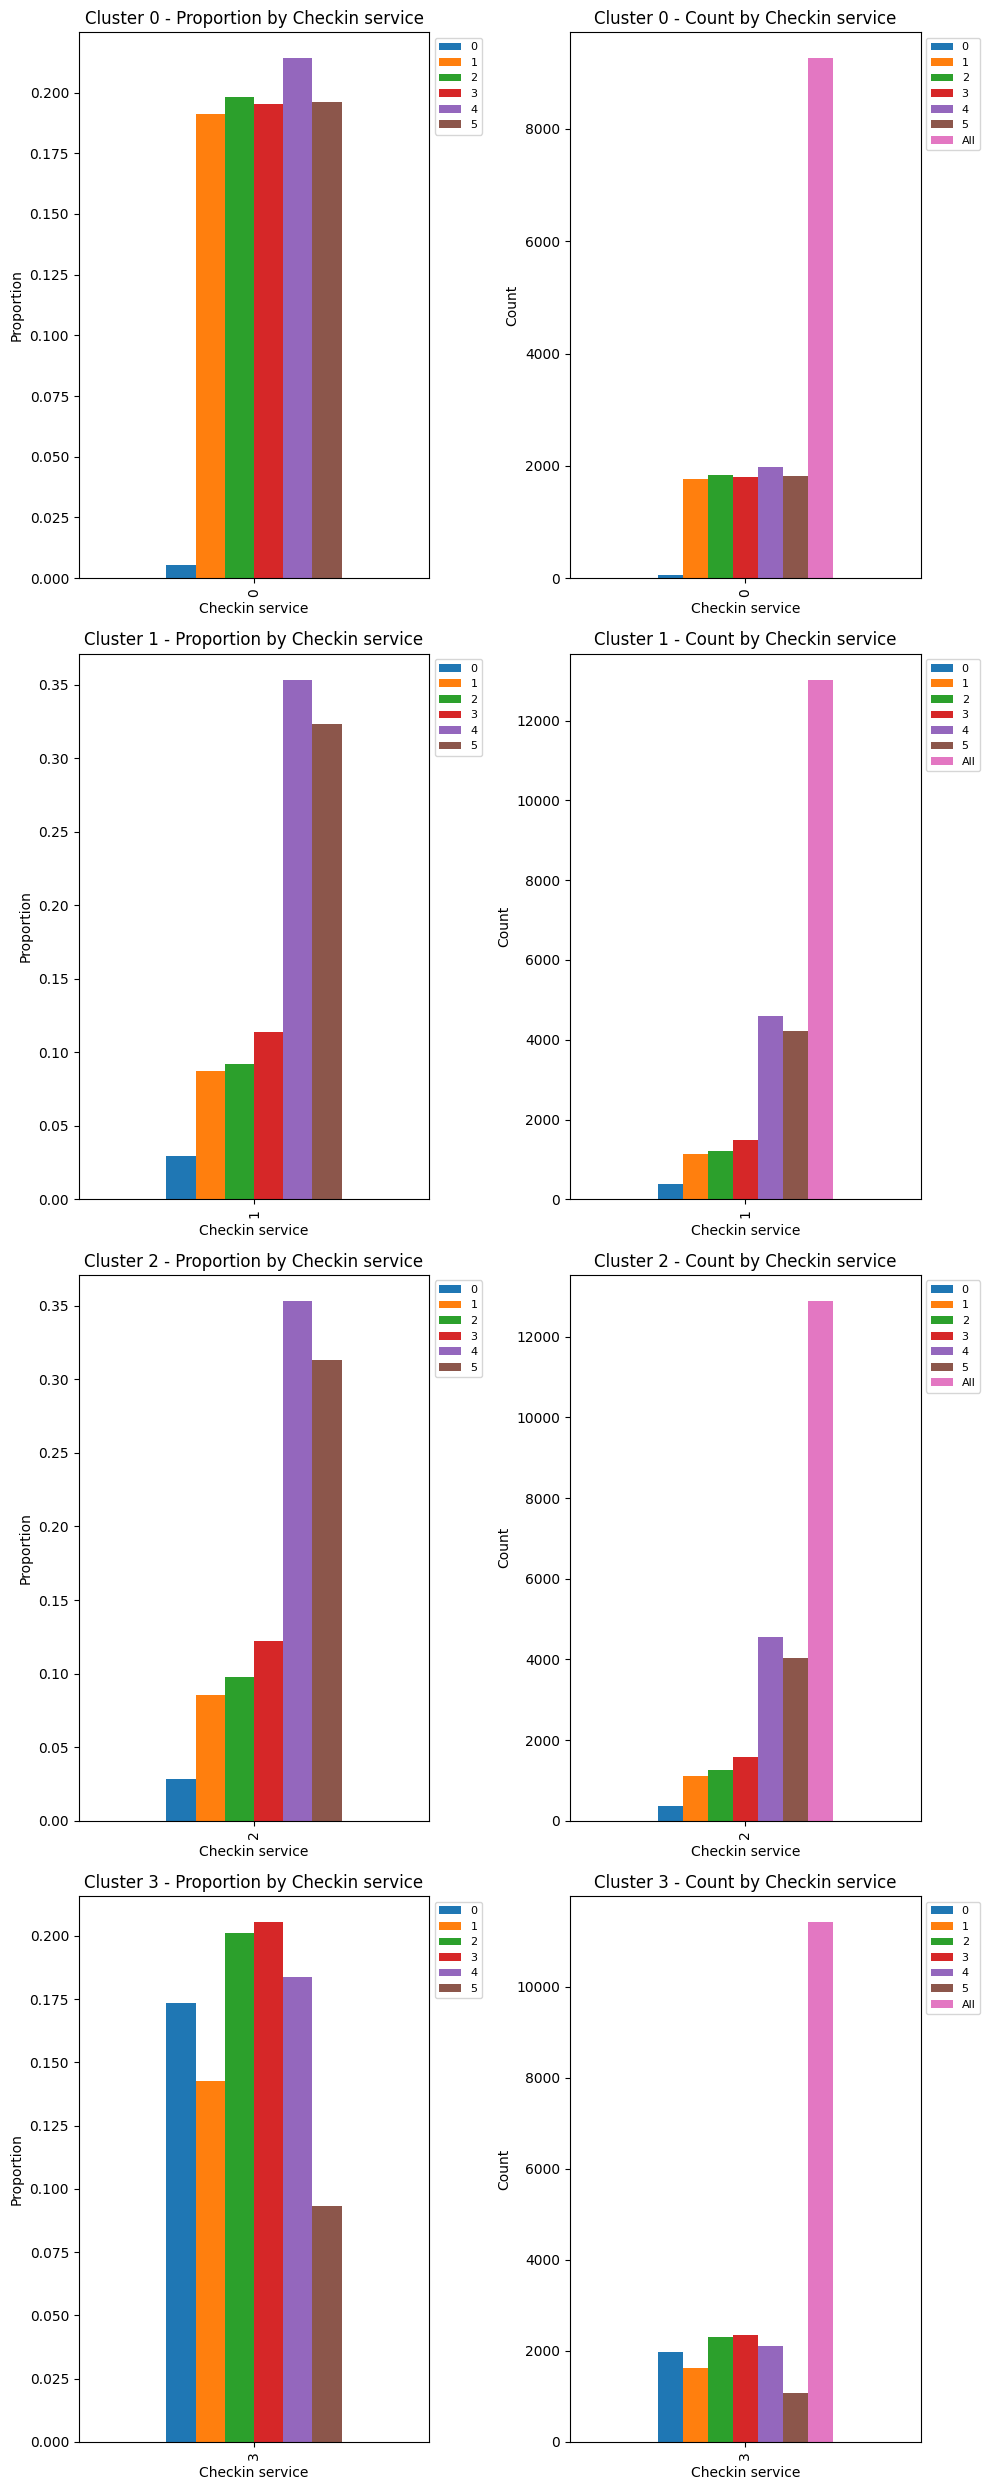

In [121]:
#各クラスターごとの年齢分布
fig, axes = plt.subplots(4, 2, figsize=(10, 25))

for cluster in range(4):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], :]
    cluster_counts = cross_counts.loc[[cluster], :]

    # 左側のグラフ　　割合
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Checkin service')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Checkin service')
    axes[cluster, 0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

    # 右側のグラフ　数値
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Checkin service')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Checkin service')
    axes[cluster, 1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


#### Inflight service

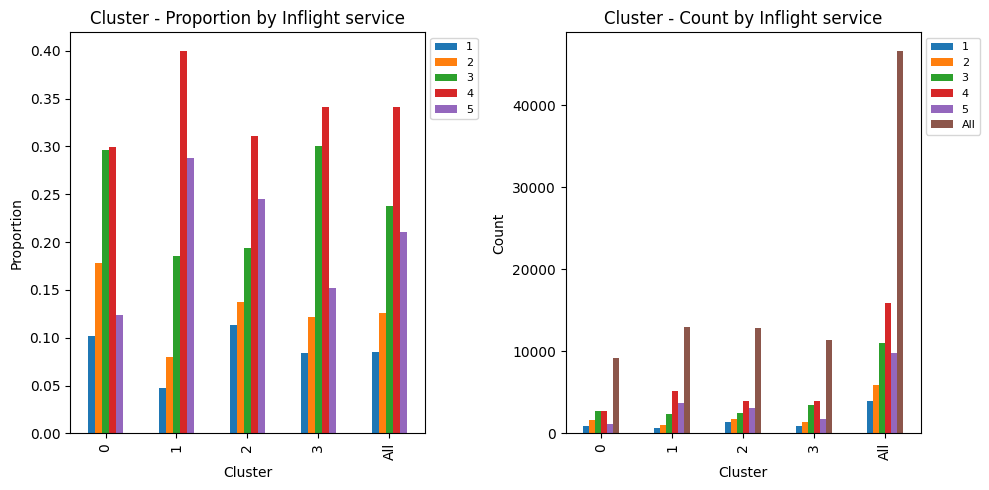

In [110]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Inflight service'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by Inflight service')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Inflight service'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by Inflight service')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


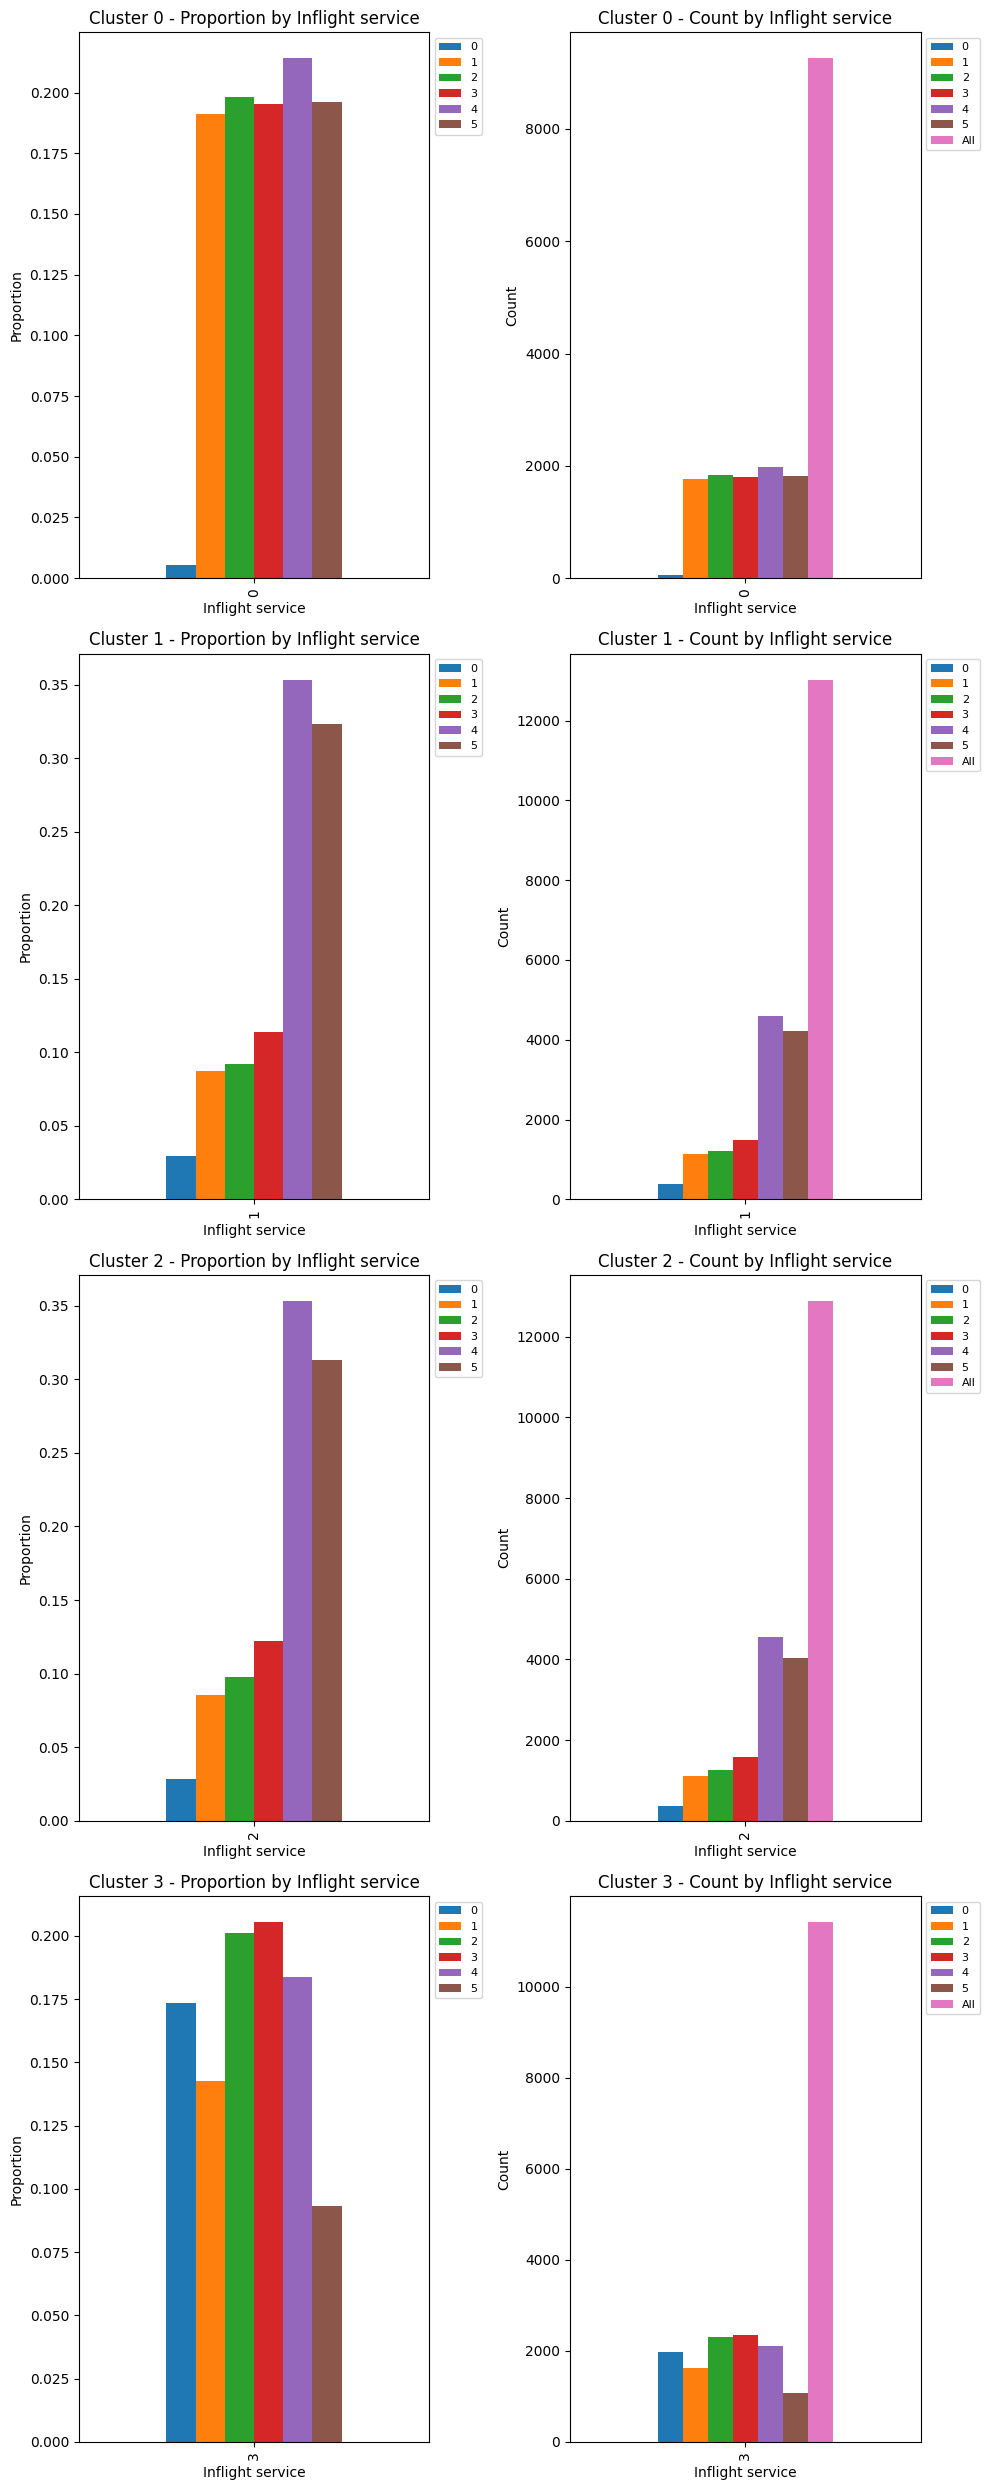

In [122]:
#各クラスターごとの年齢分布
fig, axes = plt.subplots(4, 2, figsize=(10, 25))

for cluster in range(4):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], :]
    cluster_counts = cross_counts.loc[[cluster], :]

    # 左側のグラフ　　割合
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Inflight service')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Inflight service')
    axes[cluster, 0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

    # 右側のグラフ　数値
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Inflight service')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Inflight service')
    axes[cluster, 1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


#### Cleanliness

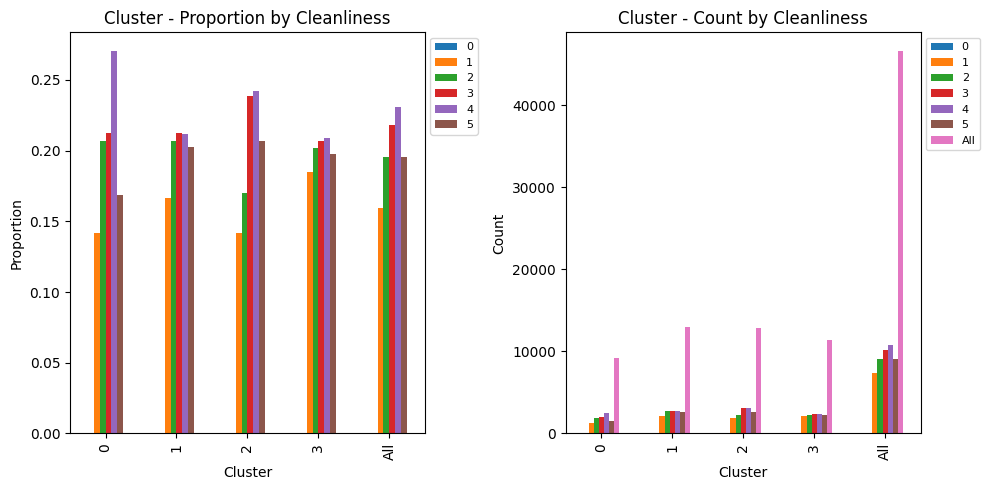

In [112]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Cleanliness'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by Cleanliness')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Cleanliness'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by Cleanliness')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


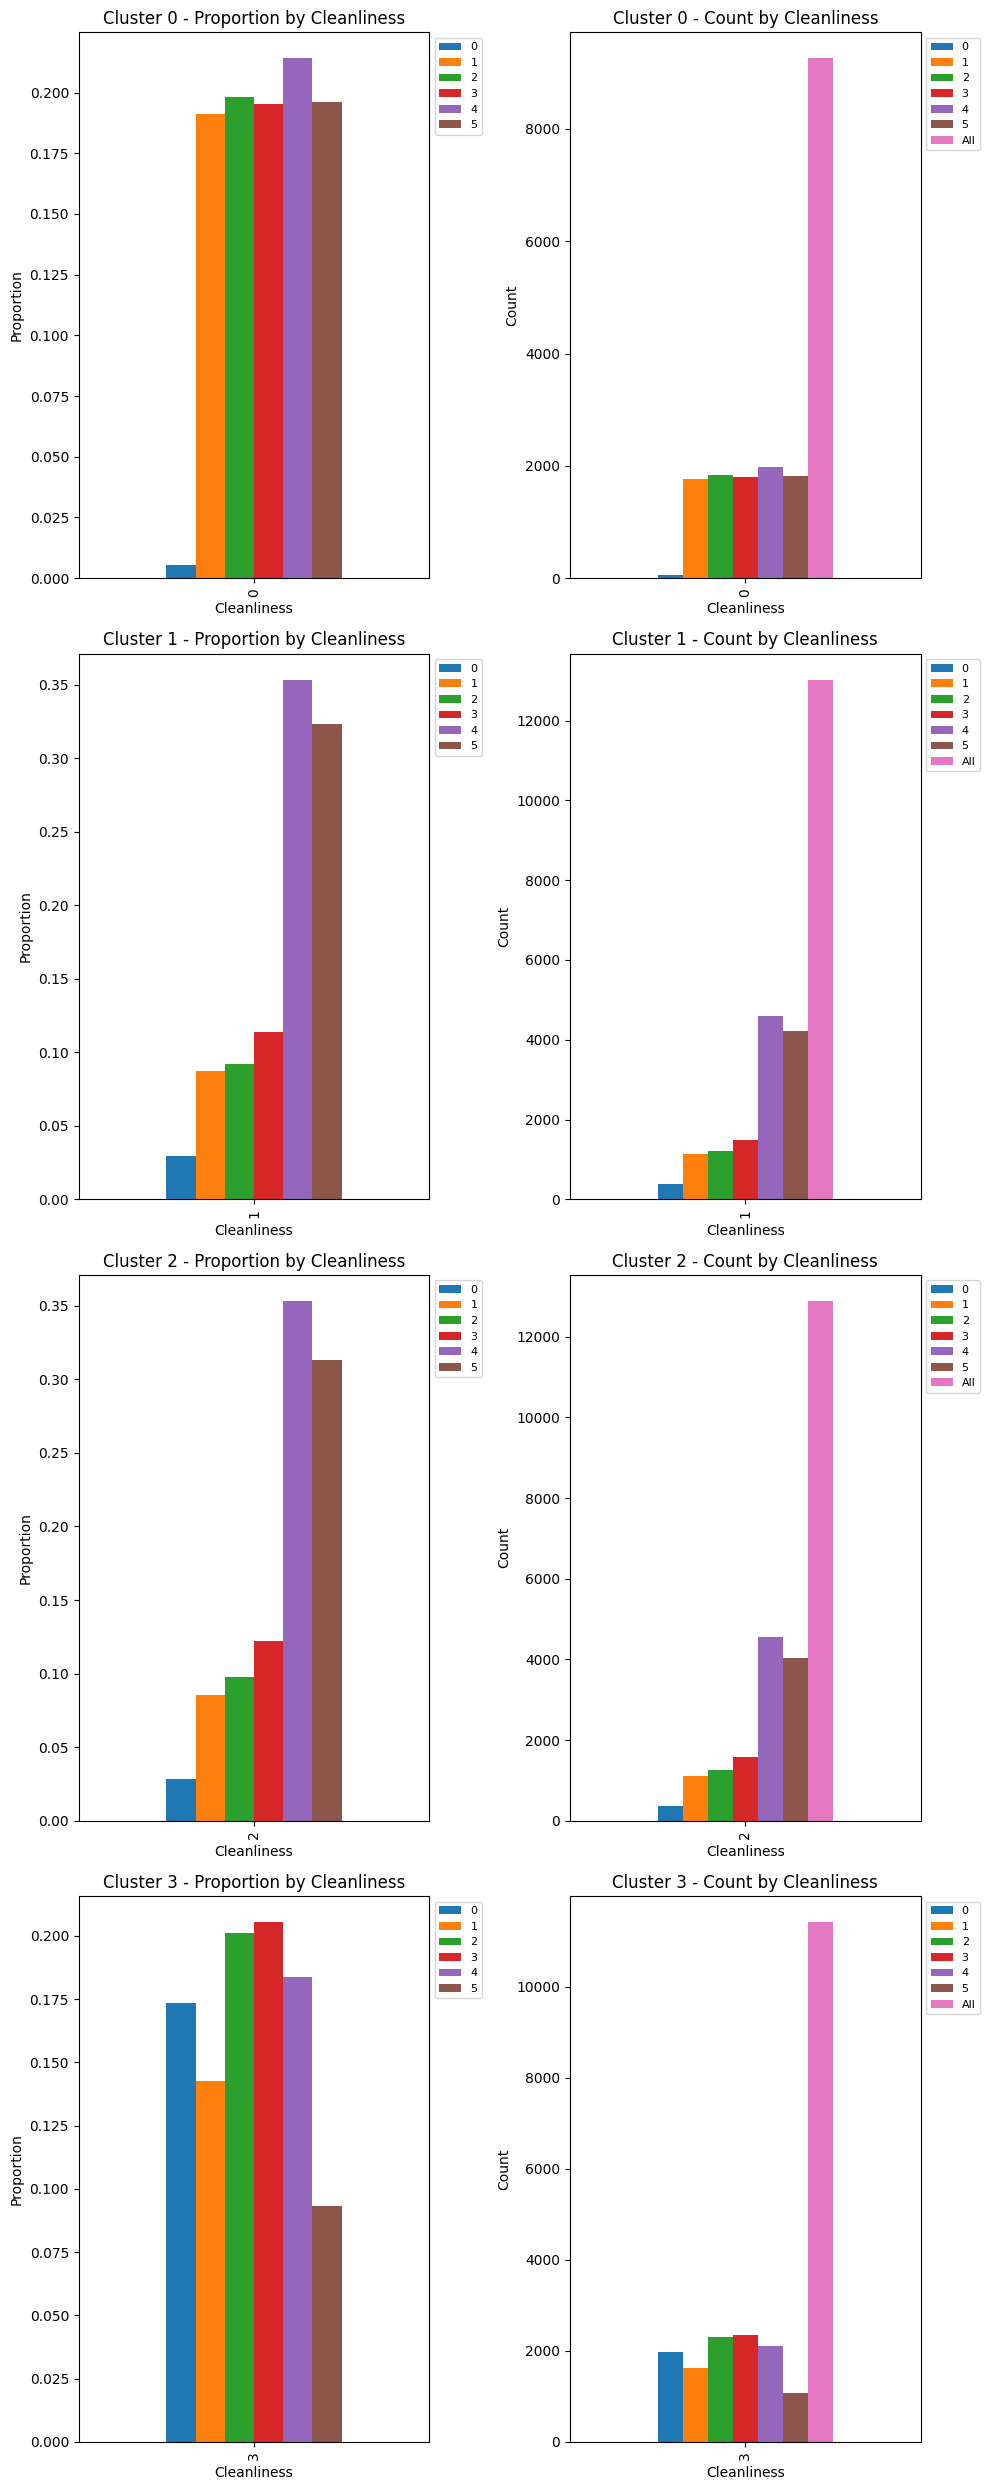

In [123]:
#各クラスターごとの年齢分布
fig, axes = plt.subplots(4, 2, figsize=(10, 25))

for cluster in range(4):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], :]
    cluster_counts = cross_counts.loc[[cluster], :]

    # 左側のグラフ　　割合
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Cleanliness')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Cleanliness')
    axes[cluster, 0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

    # 右側のグラフ　数値
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Cleanliness')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Cleanliness')
    axes[cluster, 1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


#### Departure/Arrival time convenient

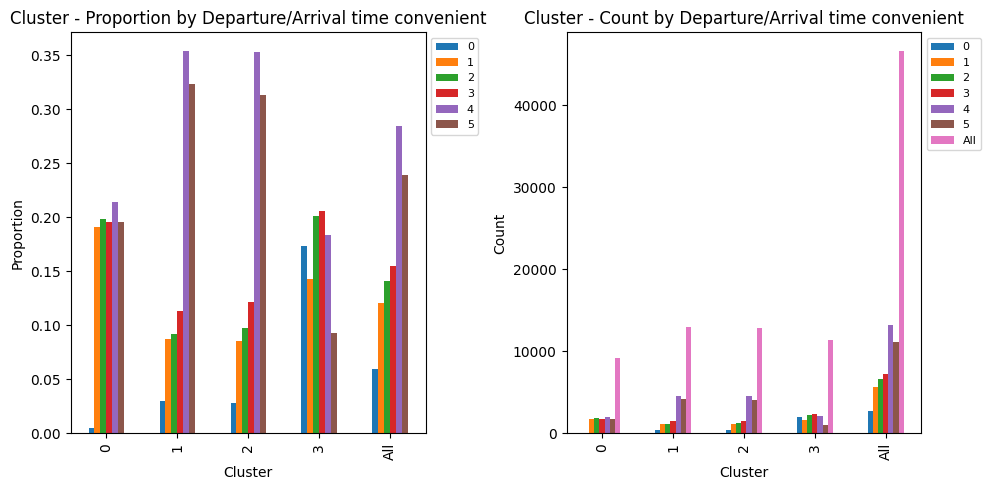

In [114]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Departure/Arrival time convenient'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by Departure/Arrival time convenient')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Departure/Arrival time convenient'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by Departure/Arrival time convenient')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


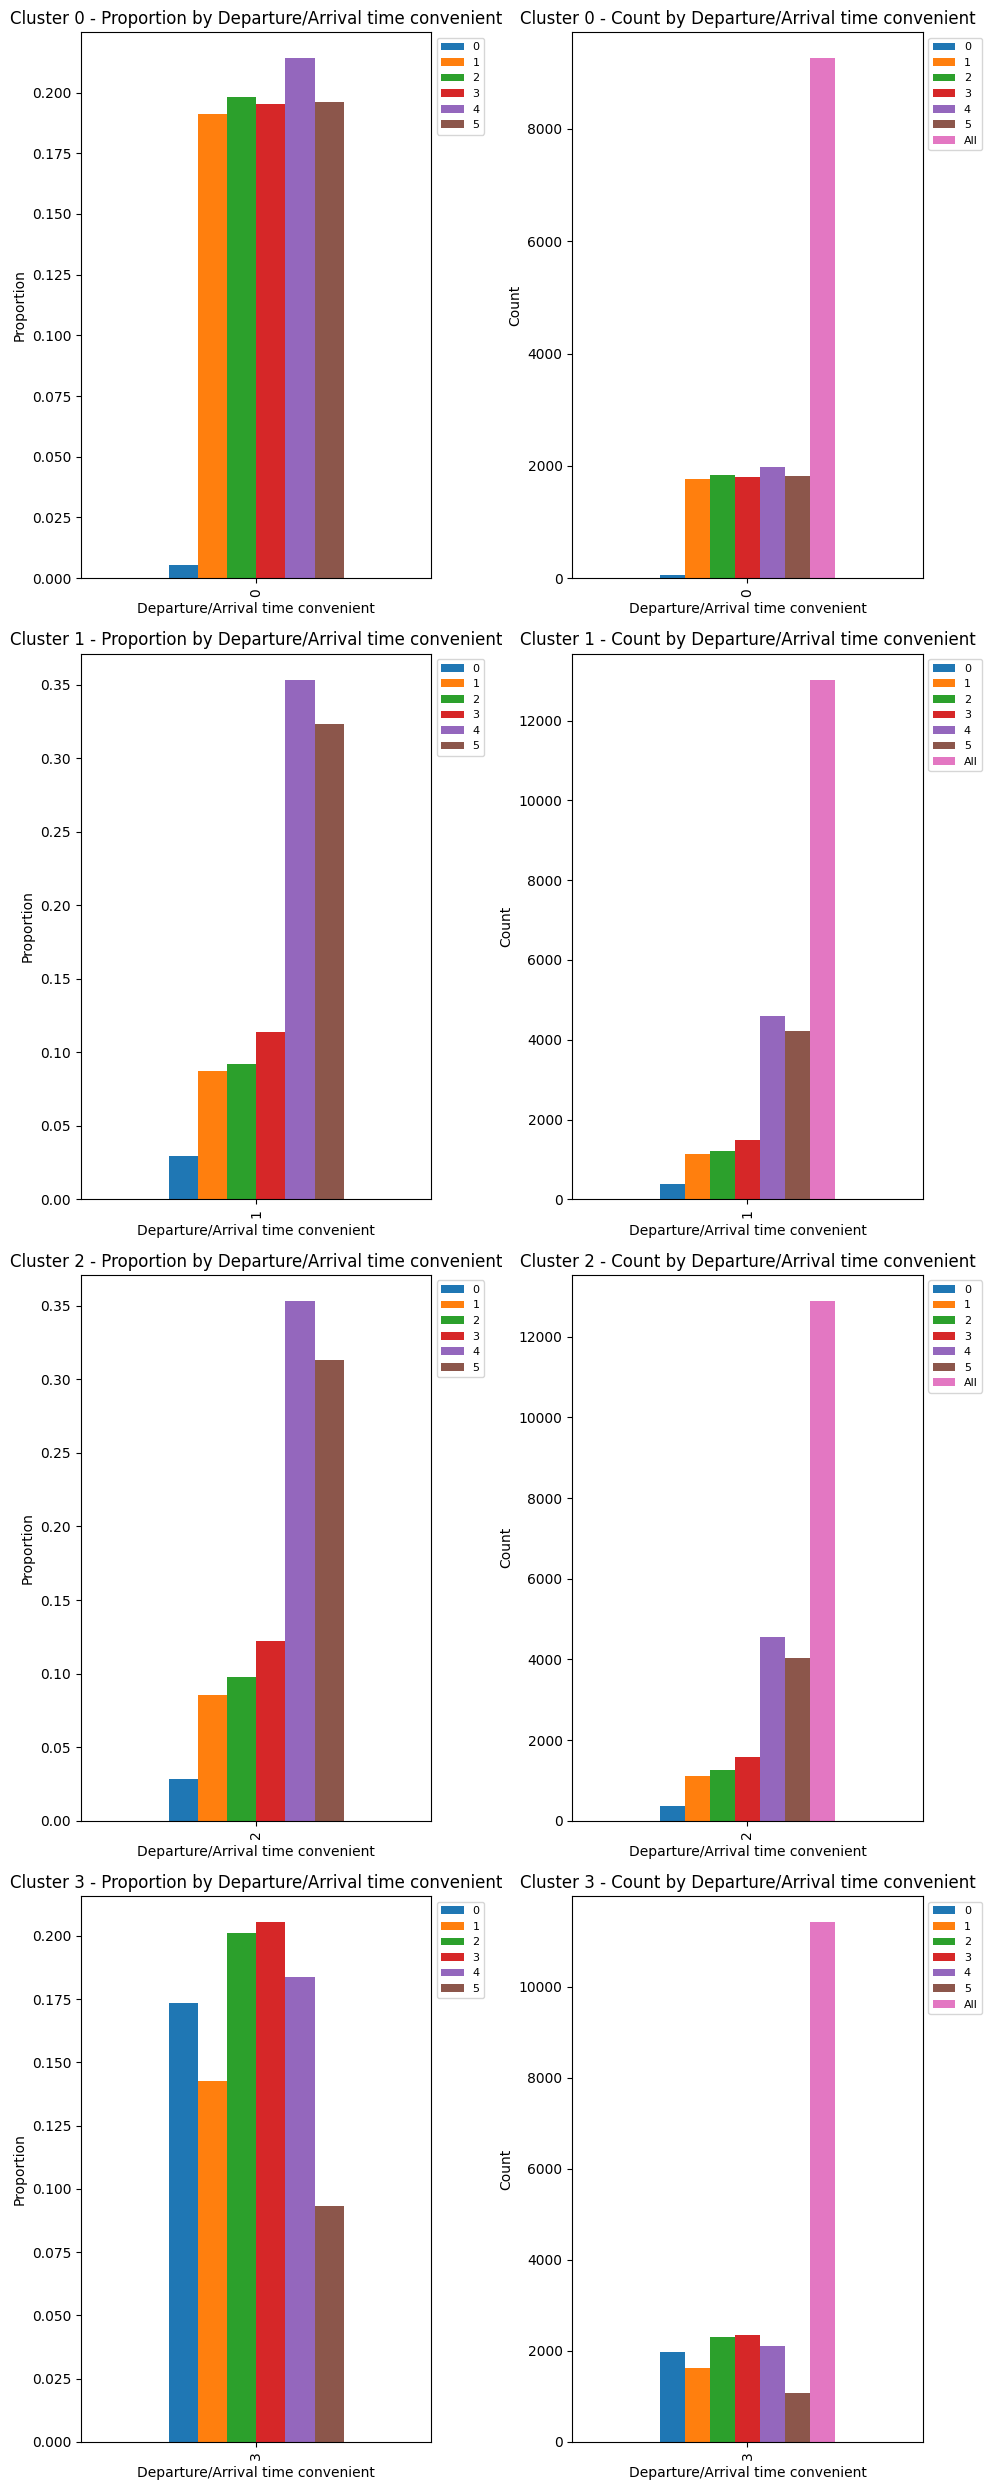

In [124]:
#各クラスターごとの年齢分布
fig, axes = plt.subplots(4, 2, figsize=(10, 25))

for cluster in range(4):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], :]
    cluster_counts = cross_counts.loc[[cluster], :]

    # 左側のグラフ　　割合
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Departure/Arrival time convenient')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Departure/Arrival time convenient')
    axes[cluster, 0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

    # 右側のグラフ　数値
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Departure/Arrival time convenient')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Departure/Arrival time convenient')
    axes[cluster, 1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})


plt.tight_layout()
plt.show()


#### Arrival Delay in Minutes

In [ ]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Arrival Delay in Minutes'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by Arrival Delay in Minutes')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Arrival Delay in Minutes'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by Arrival Delay in Minutes')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


In [ ]:
#各クラスターごとの年齢分布
fig, axes = plt.subplots(4, 2, figsize=(10, 25))

for cluster in range(4):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], :]
    cluster_counts = cross_counts.loc[[cluster], :]

    # 左側のグラフ　　割合
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Arrival Delay in Minutes')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Arrival Delay in Minutes')
    axes[cluster, 0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

    # 右側のグラフ　数値
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Arrival Delay in Minutes')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Arrival Delay in Minutes')
    axes[cluster, 1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


#### Customer Type_disloyal Customer

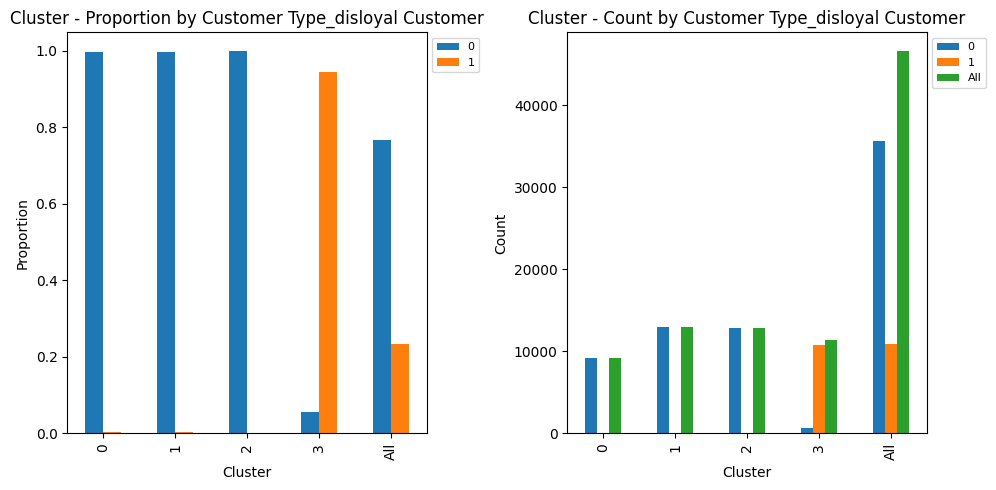

In [127]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Customer Type_disloyal Customer'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by Customer Type_disloyal Customer')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Customer Type_disloyal Customer'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by Customer Type_disloyal Customer')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


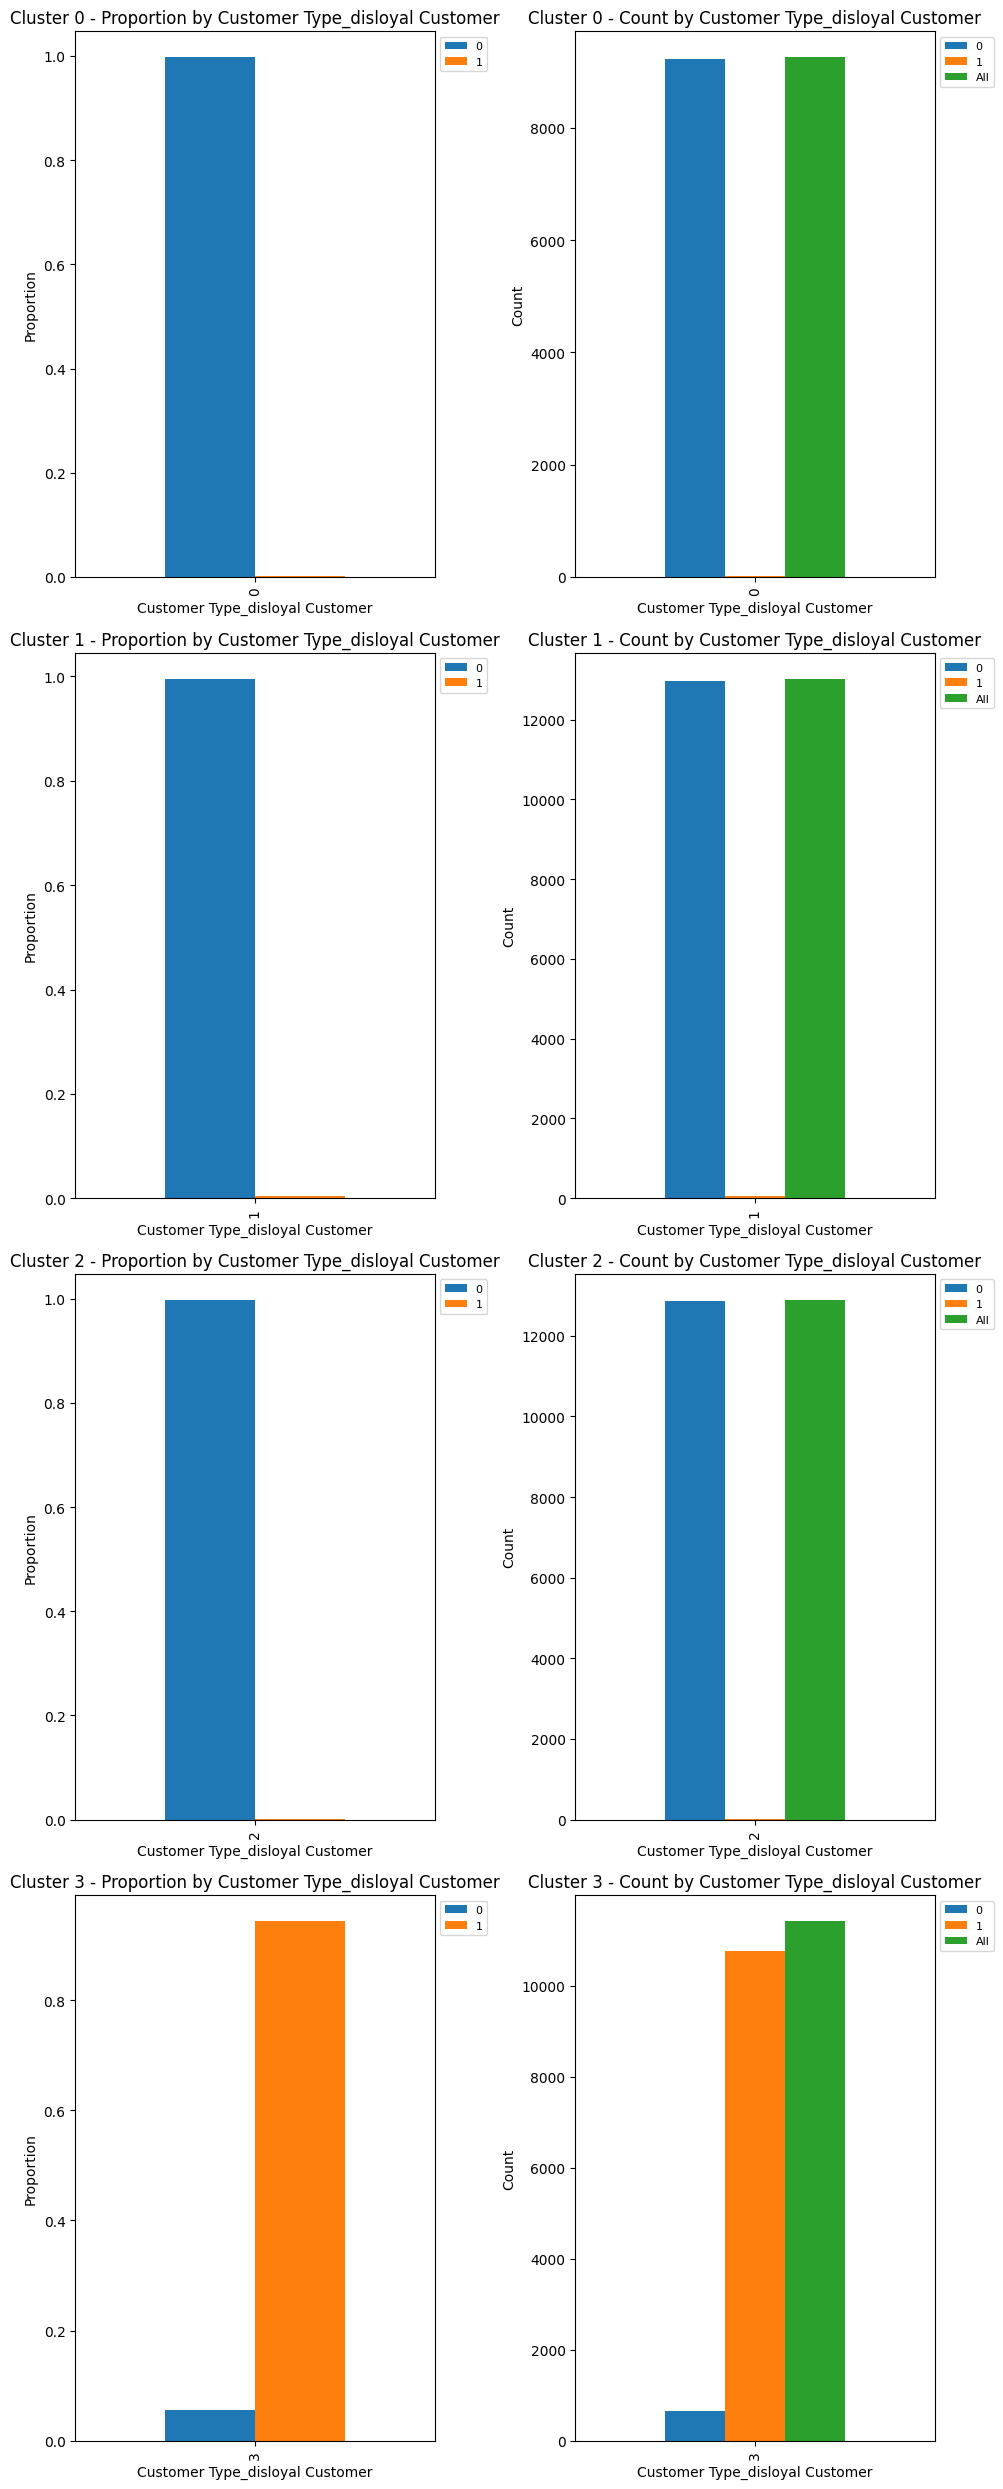

In [128]:
#各クラスターごとの年齢分布
fig, axes = plt.subplots(4, 2, figsize=(10, 25))

for cluster in range(4):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], :]
    cluster_counts = cross_counts.loc[[cluster], :]

    # 左側のグラフ　　割合
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Customer Type_disloyal Customer')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Customer Type_disloyal Customer')
    axes[cluster, 0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

    # 右側のグラフ　数値
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Customer Type_disloyal Customer')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Customer Type_disloyal Customer')
    axes[cluster, 1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


#### Type of Travel_Personal Travel

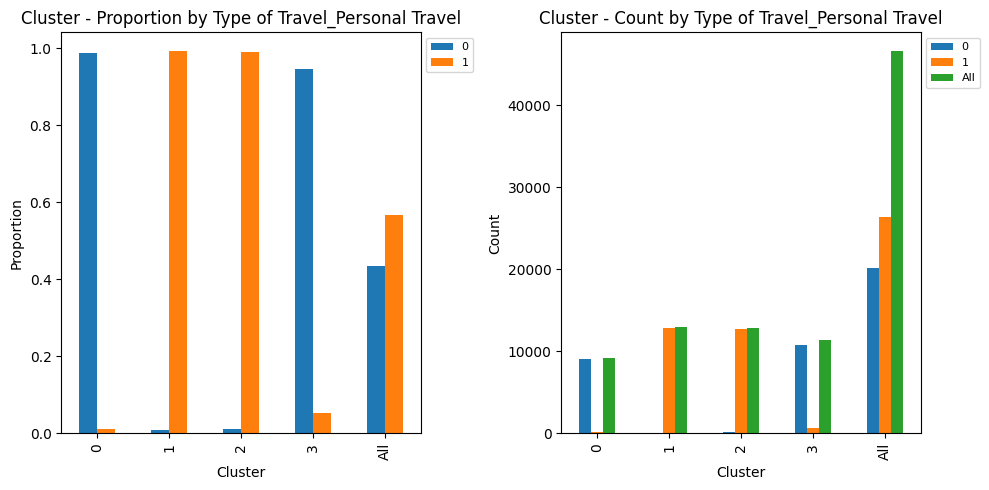

In [129]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Type of Travel_Personal Travel'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by Type of Travel_Personal Travel')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Type of Travel_Personal Travel'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by Type of Travel_Personal Travel')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


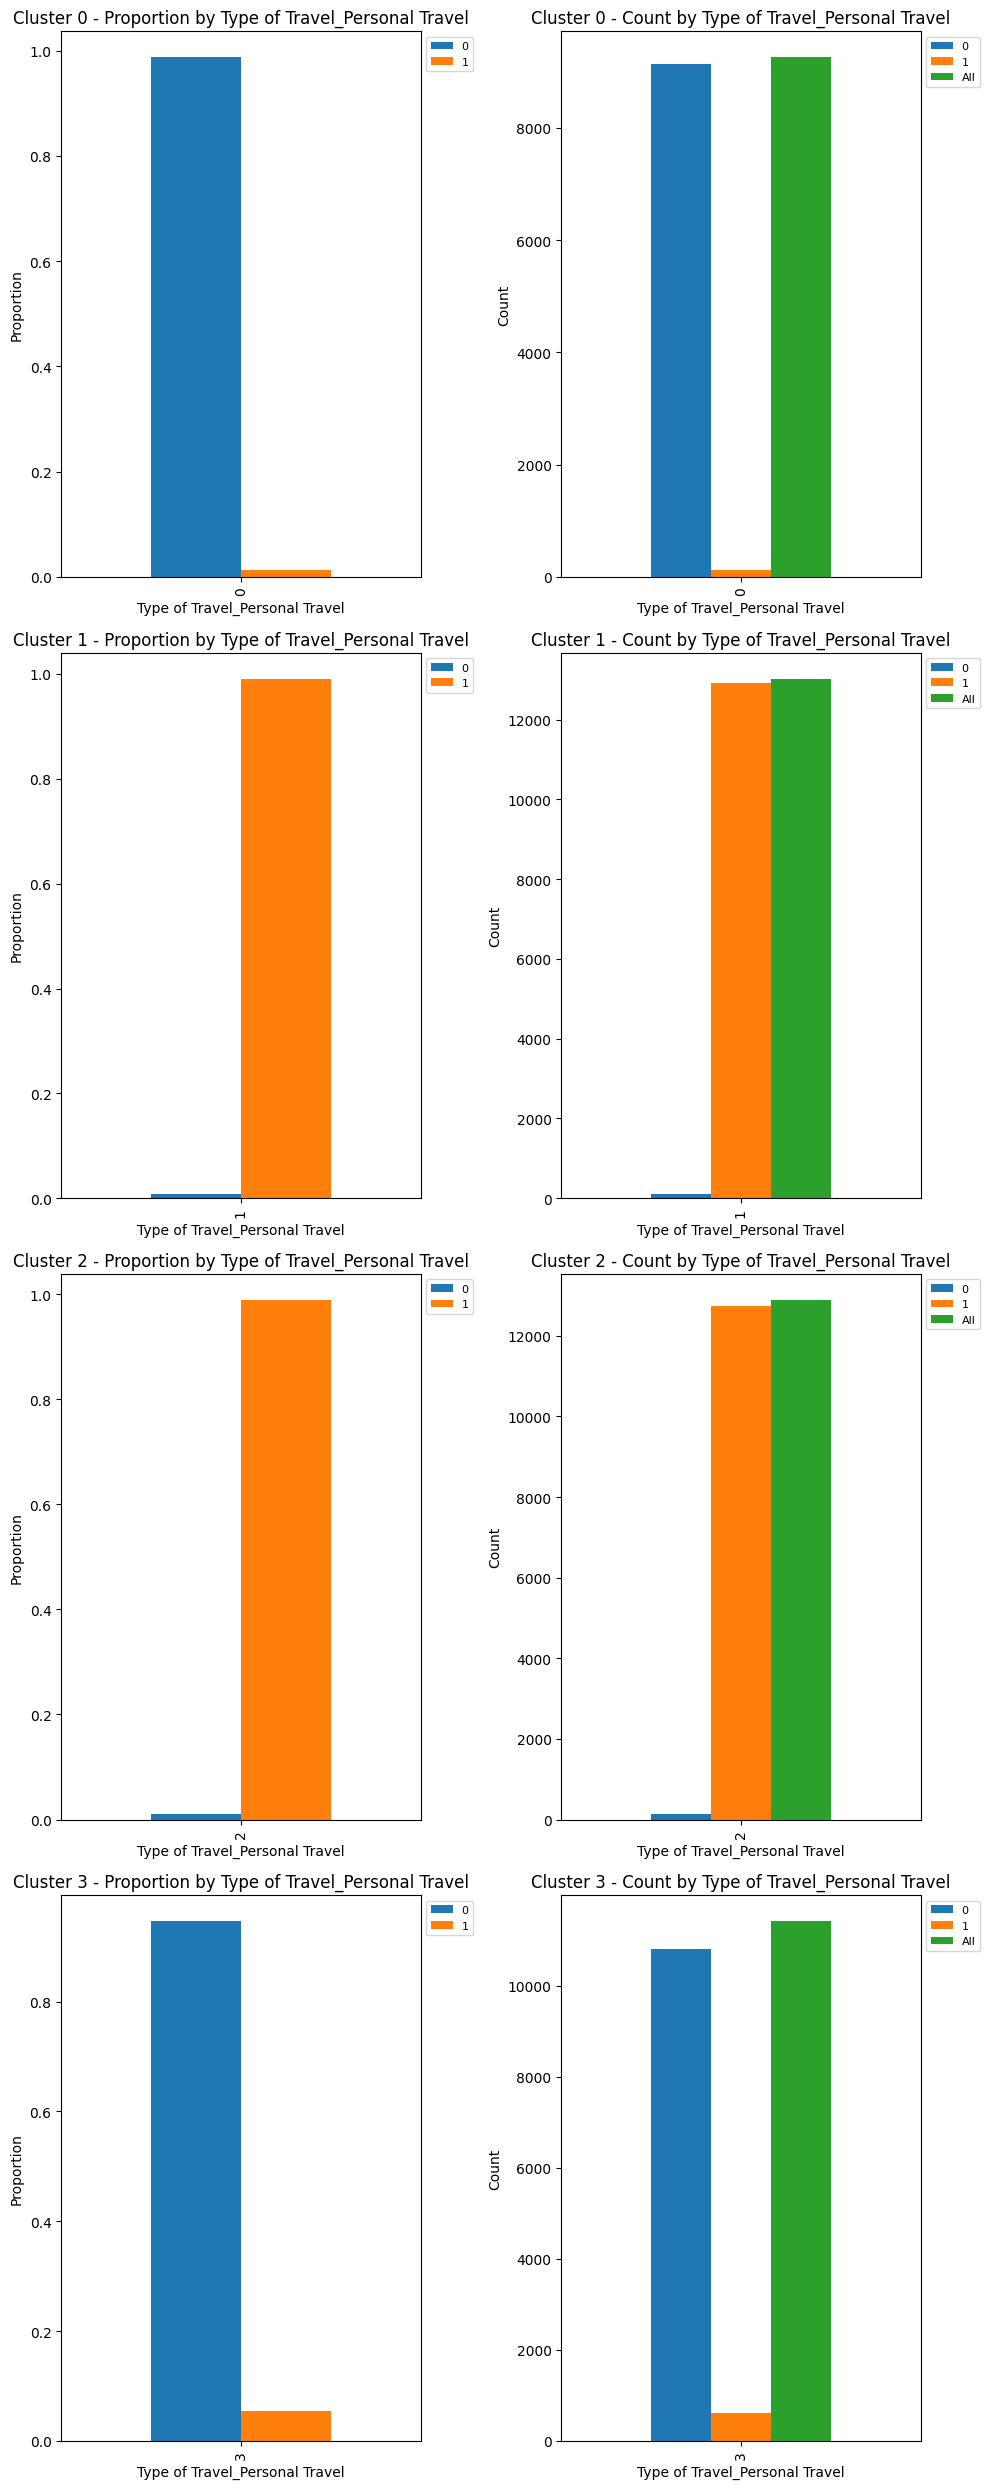

In [130]:
#各クラスターごとの年齢分布
fig, axes = plt.subplots(4, 2, figsize=(10, 25))

for cluster in range(4):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], :]
    cluster_counts = cross_counts.loc[[cluster], :]

    # 左側のグラフ　　割合
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Type of Travel_Personal Travel')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Type of Travel_Personal Travel')
    axes[cluster, 0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

    # 右側のグラフ　数値
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Type of Travel_Personal Travel')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Type of Travel_Personal Travel')
    axes[cluster, 1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()
